In [1]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from datetime import date
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import StandardScaler
import numpy as np
import warnings
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

from sklearn.metrics import mean_squared_error
from evds import evdsAPI
import pandas as pd
import numpy as np
import requests
import json
from urllib.parse import urlencode
warnings.filterwarnings("ignore")

In [2]:
tcmb=pd.DataFrame(index=pd.date_range(start="2025-01-31",freq="M",periods=12))
tcmb["Orta Nokta"]=[2819.65,2932.57,2996.33,3065.55,3110.16,3135.22,3172.9,3206.02,3238.03,3293.86,3317.29,3329.1]
tcmb=(tcmb.pct_change().dropna()*100).round(2)
tcmb

,Orta Nokta
2025-02-28,4.00
2025-03-31,2.17
2025-04-30,2.31
2025-05-31,1.46
2025-06-30,0.81
2025-07-31,1.20
2025-08-31,1.04
2025-09-30,1.00
2025-10-31,1.72
2025-11-30,0.71


In [3]:
"""import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv("data1.csv",index_col=0)
data=data.iloc[:131]
del data["Zam"]
train = data.iloc[:-11]
test = data.iloc[-11:]"""

'import pymc as pm\nimport numpy as np\nimport matplotlib.pyplot as plt\nimport pandas as pd\ndata = pd.read_csv("data1.csv",index_col=0)\ndata=data.iloc[:131]\ndel data["Zam"]\ntrain = data.iloc[:-11]\ntest = data.iloc[-11:]'

In [4]:
"""import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import logging
logger = logging.getLogger('pymc')
logger.setLevel(logging.INFO)

# Bağımsız ve bağımlı değişkenleri seçelim
X_train = train[['Kredi2', 'USD/TL', 'Motorin', 'ParaArzi']].values
y_train = train['TÜFE'].values

X_test = test[['Kredi2', 'USD/TL', 'Motorin', 'ParaArzi']].values

# Verileri standartlaştıralım
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
X_test_scaled = scaler_X.transform(X_test)

# Gaussian Process modeli
with pm.Model() as gp_model:
    # Öncelikler
    eta = pm.HalfNormal("eta", sigma=1)
    lengthscale = pm.Gamma("lengthscale", alpha=2, beta=1)
    
    # Kernel tanımlaması
    cov_func = eta**2 * pm.gp.cov.ExpQuad(input_dim=X_train.shape[1], ls=lengthscale)
    
    # Gaussian Process
    gp = pm.gp.Marginal(cov_func=cov_func)
    sigma = pm.HalfNormal("sigma", sigma=1)
    
    # GP'yi y_train verisine uydur
    y_ = gp.marginal_likelihood("y", X=X_train_scaled, y=y_train_scaled, noise=sigma)
    
    step = pm.Metropolis()
    trace = pm.sample(250, chains=2, step=step,cores=12)
   

# Sonuçları inceleyelim
pm.plot_trace(trace)
plt.show()
"""

'import pymc as pm\nimport numpy as np\nimport matplotlib.pyplot as plt\nimport logging\nlogger = logging.getLogger(\'pymc\')\nlogger.setLevel(logging.INFO)\n\n# Bağımsız ve bağımlı değişkenleri seçelim\nX_train = train[[\'Kredi2\', \'USD/TL\', \'Motorin\', \'ParaArzi\']].values\ny_train = train[\'TÜFE\'].values\n\nX_test = test[[\'Kredi2\', \'USD/TL\', \'Motorin\', \'ParaArzi\']].values\n\n# Verileri standartlaştıralım\nfrom sklearn.preprocessing import StandardScaler\n\nscaler_X = StandardScaler()\nscaler_y = StandardScaler()\n\nX_train_scaled = scaler_X.fit_transform(X_train)\ny_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()\nX_test_scaled = scaler_X.transform(X_test)\n\n# Gaussian Process modeli\nwith pm.Model() as gp_model:\n    # Öncelikler\n    eta = pm.HalfNormal("eta", sigma=1)\n    lengthscale = pm.Gamma("lengthscale", alpha=2, beta=1)\n    \n    # Kernel tanımlaması\n    cov_func = eta**2 * pm.gp.cov.ExpQuad(input_dim=X_train.shape[1], ls=lengthscale

In [5]:
"""pm.plot_trace(trace)
plt.show()"""

'pm.plot_trace(trace)\nplt.show()'

In [6]:
"""import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("data1.csv")
data=data.loc[:"2025-01-31"]
X_train = train[['Enflasyon Belirsizliği', 'Kredi2', 'USD/TL', 'Motorin', 'Zam', 'ParaArzi', 'İşsizlik']].values
y_train = train['TÜFE'].values

X_test = test[['Enflasyon Belirsizliği', 'Kredi2', 'USD/TL', 'Motorin', 'Zam', 'ParaArzi', 'İşsizlik']].values

# Verileri standartlaştıralım
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
X_test_scaled = scaler_X.transform(X_test)

# Gaussian Process modeli
with pm.Model() as gp_model:
    # Öncelikler
    eta = pm.HalfNormal("eta", sigma=1)
    lengthscale = pm.Gamma("lengthscale", alpha=2, beta=1)
    
    # Kernel tanımlaması
    cov_func = eta**2 * pm.gp.cov.ExpQuad(input_dim=X_train.shape[1], ls=lengthscale)
    
    # Gaussian Process
    gp = pm.gp.Marginal(cov_func=cov_func)
    sigma = pm.HalfNormal("sigma", sigma=1)
    
    # GP'yi y_train verisine uydur
    y_ = gp.marginal_likelihood("y", X=X_train_scaled, y=y_train_scaled, noise=sigma)
    
    # Modeli örnekle
    trace = pm.sample(1000, return_inferencedata=True, target_accept=0.95)

# Sonuçları inceleyelim
pm.plot_trace(trace)
plt.show()
"""

'import pymc as pm\nimport numpy as np\nimport matplotlib.pyplot as plt\ndata = pd.read_csv("data1.csv")\ndata=data.loc[:"2025-01-31"]\nX_train = train[[\'Enflasyon Belirsizliği\', \'Kredi2\', \'USD/TL\', \'Motorin\', \'Zam\', \'ParaArzi\', \'İşsizlik\']].values\ny_train = train[\'TÜFE\'].values\n\nX_test = test[[\'Enflasyon Belirsizliği\', \'Kredi2\', \'USD/TL\', \'Motorin\', \'Zam\', \'ParaArzi\', \'İşsizlik\']].values\n\n# Verileri standartlaştıralım\nfrom sklearn.preprocessing import StandardScaler\n\nscaler_X = StandardScaler()\nscaler_y = StandardScaler()\n\nX_train_scaled = scaler_X.fit_transform(X_train)\ny_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()\nX_test_scaled = scaler_X.transform(X_test)\n\n# Gaussian Process modeli\nwith pm.Model() as gp_model:\n    # Öncelikler\n    eta = pm.HalfNormal("eta", sigma=1)\n    lengthscale = pm.Gamma("lengthscale", alpha=2, beta=1)\n    \n    # Kernel tanımlaması\n    cov_func = eta**2 * pm.gp.cov.ExpQuad(input_di

In [35]:
yılsonu=pd.DataFrame()
yılsonu["Tahmin"]=[44.51,46,46.77,47.51,44.12,45.83,43.85,42.7,43.68,42.38,45.20,45.20,45.09]
yılsonu=yılsonu.set_index(pd.date_range(start="2023-12-31",freq="M",periods=len(yılsonu)))
yılsonu

,Tahmin
2023-12-31,44.51
2024-01-31,46.00
2024-02-29,46.77
2024-03-31,47.51
2024-04-30,44.12
2024-05-31,45.83
2024-06-30,43.85
2024-07-31,42.70
2024-08-31,43.68
2024-09-30,42.38


In [36]:
sonu2025=pd.DataFrame()
sonu2025["Tahmin"]=[26.24,31.77,33.5,27.82,30.81]
sonu2025=sonu2025.set_index(pd.date_range(start="2024-09-30",freq="M",periods=len(sonu2025)))
sonu2025

,Tahmin
2024-09-30,26.24
2024-10-31,31.77
2024-11-30,33.50
2024-12-31,27.82
2025-01-31,30.81


In [37]:
with open("C:/Users/Bora/Desktop/api.txt") as api:
    key=api.read()



In [38]:
def evds_vericek(series_code,freq):
    params = {
    'series': series_code,
    'startDate': "01-01-2010",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': freq,
    'aggregationTypes': 'avg',
    'type': 'json'
    }

    url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

    response = requests.get(url=url, headers={'key': key})

    # print(response.request.headers)

    formatted_response = json.loads(response.content)

    seri = formatted_response['items']
    seri = pd.DataFrame(seri)


    seri = seri.drop(columns=['UNIXTIME'])
   

    return seri

In [39]:
"""series_list=["TP.BRENTPETROL.EUBP","TP.DK.USD.S.YTL","TP.FE.OKTG05","TP.DT.IT.FIY.D01.2010"]
data=pd.DataFrame()
for series in series_list:
    veri=evds_vericek(series,5)
    data=pd.concat([data,veri],axis=1)

data = data.loc[:,~data.columns.duplicated()].copy()
data=data.dropna()
data.columns=["Tarih","Brent","Kur","TÜFE","İthalat"]
data=data.set_index(pd.date_range(start="2013-01-31",freq="M",periods=len(data)))
data=data.drop(columns="Tarih")
for col in data.columns:
    data[col]=data[col].astype(float)
data"""

'series_list=["TP.BRENTPETROL.EUBP","TP.DK.USD.S.YTL","TP.FE.OKTG05","TP.DT.IT.FIY.D01.2010"]\ndata=pd.DataFrame()\nfor series in series_list:\n    veri=evds_vericek(series,5)\n    data=pd.concat([data,veri],axis=1)\n\ndata = data.loc[:,~data.columns.duplicated()].copy()\ndata=data.dropna()\ndata.columns=["Tarih","Brent","Kur","TÜFE","İthalat"]\ndata=data.set_index(pd.date_range(start="2013-01-31",freq="M",periods=len(data)))\ndata=data.drop(columns="Tarih")\nfor col in data.columns:\n    data[col]=data[col].astype(float)\ndata'

In [40]:
params = {
    'series': "TP.DK.USD.S.YTL",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

usd = formatted_response['items']
usd = pd.DataFrame(usd)


usd = usd.drop(columns=['UNIXTIME','Tarih'])
usd.columns = ['USD/TL']
usd['USD/TL'] = pd.to_numeric(usd['USD/TL'])
usd=usd.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(usd)))
usd=usd.dropna()
usd

,USD/TL
2006-01-31,1.334344
2006-02-28,1.326535
2006-03-31,1.335139
2006-04-30,1.337345
2006-05-31,1.420659
...,...
2025-01-31,35.519832
2025-02-28,36.159050
2025-03-31,37.037300
2025-04-30,38.090290


In [41]:
euro=evds_vericek("TP.DK.EUR.S.YTL",5)

In [42]:
params = {
    'series': "TP.FE.OKTG01",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

enf = formatted_response['items']
enf = pd.DataFrame(enf)


enf = enf.drop(columns=['UNIXTIME','Tarih'])
enf.columns = ['TÜFE']
enf['TÜFE'] = pd.to_numeric(enf['TÜFE'])
enf=enf.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(enf)))
enf

,TÜFE
2006-01-31,123.57
2006-02-28,123.84
2006-03-31,124.18
2006-04-30,125.84
2006-05-31,128.20
...,...
2024-12-31,2684.55
2025-01-31,2819.65
2025-02-28,2883.75
2025-03-31,2954.69


In [43]:
params = {
    'series': "TP.HPBITABLO1.11",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 2,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

money = formatted_response['items']
money = pd.DataFrame(money)


money = money.drop(columns=['UNIXTIME',"YEARWEEK"])
import pandas as pd

money["TP_HPBITABLO1_11"]=money["TP_HPBITABLO1_11"].astype(float)
money['Tarih'] = pd.to_datetime(money['Tarih'], dayfirst=True)

money["Yıl"] = money["Tarih"].dt.year
money["Ay"] = money["Tarih"].dt.month
money["Hafta"] = money["Tarih"].dt.isocalendar().week


def ilk_uc_hafta_ortalamasi(grup):
    # Haftalara göre sırala
    grup = grup.sort_values("Tarih")
    ilk_uc_hafta = grup.head(3)
    return pd.Series({
        "Ortalama": ilk_uc_hafta["TP_HPBITABLO1_11"].mean()
    })

def aylik_ort(grup):
    # Haftalara göre sırala
    grup = grup.sort_values("Tarih")
    ilk_uc_hafta = grup.head(4)
    return pd.Series({
        "Ortalama": ilk_uc_hafta["TP_HPBITABLO1_11"].mean()
    })

ortalama_df = money.groupby(["Yıl", "Ay"]).apply(ilk_uc_hafta_ortalamasi).reset_index()
aylikortalama_df = money.groupby(["Yıl", "Ay"]).apply(aylik_ort).reset_index()

money=pd.DataFrame(((ortalama_df["Ortalama"]/aylikortalama_df["Ortalama"].shift(1))-1)*100)
money=money.set_index(pd.date_range(start="2006-01-31",freq="M",periods=len(money)))
money.columns=["Para Arzi"]
money


,Para Arzi
2006-01-31,NaN
2006-02-28,-0.555551
2006-03-31,2.552915
2006-04-30,2.298090
2006-05-31,2.293119
...,...
2025-01-31,1.748863
2025-02-28,3.358668
2025-03-31,4.308740
2025-04-30,3.476216


In [44]:
params = {
    'series': "TP.HPBITABLO1.18",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 2,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

m3 = formatted_response['items']
m3 = pd.DataFrame(m3)


m3 = m3.drop(columns=['UNIXTIME',"YEARWEEK"])
import pandas as pd

m3["TP_HPBITABLO1_18"]=m3["TP_HPBITABLO1_18"].astype(float)
m3['Tarih'] = pd.to_datetime(m3['Tarih'], dayfirst=True)

m3["Yıl"] = m3["Tarih"].dt.year
m3["Ay"] = m3["Tarih"].dt.month
m3["Hafta"] = m3["Tarih"].dt.isocalendar().week


def ilk_uc_hafta_ortalamasi(grup):
    # Haftalara göre sırala
    grup = grup.sort_values("Tarih")
    ilk_uc_hafta = grup.head(3)
    return pd.Series({
        "Ortalama": ilk_uc_hafta["TP_HPBITABLO1_18"].mean()
    })

def aylik_ort(grup):
    # Haftalara göre sırala
    grup = grup.sort_values("Tarih")
    ilk_uc_hafta = grup.head(4)
    return pd.Series({
        "Ortalama": ilk_uc_hafta["TP_HPBITABLO1_18"].mean()
    })

ortalama_df = m3.groupby(["Yıl", "Ay"]).apply(ilk_uc_hafta_ortalamasi).reset_index()
aylikortalama_df = m3.groupby(["Yıl", "Ay"]).apply(aylik_ort).reset_index()

m3=pd.DataFrame(((ortalama_df["Ortalama"]/aylikortalama_df["Ortalama"].shift(1))-1)*100)
m3=m3.set_index(pd.date_range(start="2006-01-31",freq="M",periods=len(m3)))
m3.columns=["M3"]
m3


,M3
2006-01-31,NaN
2006-02-28,-0.570573
2006-03-31,2.419810
2006-04-30,2.468765
2006-05-31,2.392511
...,...
2025-01-31,2.132549
2025-02-28,4.038292
2025-03-31,3.642287
2025-04-30,1.971838


In [45]:
params = {
    'series': "TP.PR.ARZ01",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 1,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

m1 = formatted_response['items']
m1 = pd.DataFrame(m1)


m1 = m1.drop(columns=['UNIXTIME','YEARWEEK'])
m1.columns = ['Tarih','M1']
m1['M1'] = pd.to_numeric(m1['M1'])
m1 = m1.set_index(pd.to_datetime(m1["Tarih"], format="%d-%m-%Y"))
del m1["Tarih"]
m1=m1.pct_change(4)*100
m1=m1.resample('M').last()
m1=m1.dropna()
m1

,M1
Tarih,
2006-02-28,4.504977
2006-03-31,5.085533
2006-04-30,3.473587
2006-05-31,10.905356
2006-06-30,-0.497357
...,...
2024-09-30,2.047908
2024-10-31,-0.296289
2024-11-30,-0.181028


In [46]:
params = {
    'series': "TP.TIG08",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'last',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

issizlik = formatted_response['items']
issizlik = pd.DataFrame(issizlik)


issizlik = issizlik.drop(columns=['UNIXTIME','Tarih'])
issizlik.columns = ['İşsizlik']
issizlik['İşsizlik'] = pd.to_numeric(issizlik['İşsizlik'])
issizlik=issizlik.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(issizlik)))
issizlik=issizlik.dropna()
issizlik

,İşsizlik
2006-01-31,9.3
2006-02-28,9.1
2006-03-31,9.0
2006-04-30,8.6
2006-05-31,8.6
...,...
2024-11-30,8.5
2024-12-31,8.4
2025-01-31,8.4
2025-02-28,8.2


In [47]:
import yfinance as yf
df14=yf.download("BZ=F")["Close"]

df14

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Ticker,BZ=F
Date,
2007-07-30,75.739998
2007-07-31,77.050003
2007-08-01,75.349998
2007-08-02,75.760002
2007-08-03,74.750000
...,...
2025-05-19,65.540001
2025-05-20,65.379997
2025-05-21,64.910004


In [48]:
params = {
    'series': "TP.KREDI.L001",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 2,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

kredi = formatted_response['items']
kredi = pd.DataFrame(kredi)


kredi = kredi.drop(columns=['UNIXTIME',"YEARWEEK"])
import pandas as pd

kredi["TP_KREDI_L001"]=kredi["TP_KREDI_L001"].astype(float)
kredi['Tarih'] = pd.to_datetime(kredi['Tarih'], dayfirst=True)

kredi["Yıl"] = kredi["Tarih"].dt.year
kredi["Ay"] = kredi["Tarih"].dt.month
kredi["Hafta"] = kredi["Tarih"].dt.isocalendar().week


def ilk_uc_hafta_ortalamasi(grup):
    # Haftalara göre sırala
    grup = grup.sort_values("Tarih")
    ilk_uc_hafta = grup.head(3)
    return pd.Series({
        "Ortalama": ilk_uc_hafta["TP_KREDI_L001"].mean()
    })

def aylik_ort(grup):
    # Haftalara göre sırala
    grup = grup.sort_values("Tarih")
    ilk_uc_hafta = grup.head(4)
    return pd.Series({
        "Ortalama": ilk_uc_hafta["TP_KREDI_L001"].mean()
    })

ortalama_df = kredi.groupby(["Yıl", "Ay"]).apply(ilk_uc_hafta_ortalamasi).reset_index()
aylikortalama_df = kredi.groupby(["Yıl", "Ay"]).apply(aylik_ort).reset_index()

kredi=pd.DataFrame(((ortalama_df["Ortalama"]/aylikortalama_df["Ortalama"].shift(1))-1)*100)
kredi=kredi.set_index(pd.date_range(start="2006-01-31",freq="M",periods=len(kredi)))
kredi.columns=["Kredi"]
kredi

,Kredi
2006-01-31,NaN
2006-02-28,1.724796
2006-03-31,3.021473
2006-04-30,5.493347
2006-05-31,5.582513
...,...
2024-09-30,2.793549
2024-10-31,1.454102
2024-11-30,1.194315
2024-12-31,3.141047


In [49]:
params = {
    'series': "TP.HPBITABLO6.1",
    'startDate': "01-01-2025",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 2,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

kredi2 = formatted_response['items']
kredi2 = pd.DataFrame(kredi2)


kredi2 = kredi2.drop(columns=['UNIXTIME',"YEARWEEK"])
import pandas as pd

kredi2["TP_HPBITABLO6_1"]=kredi2["TP_HPBITABLO6_1"].astype(float)
kredi2['Tarih'] = pd.to_datetime(kredi2['Tarih'], dayfirst=True)

kredi2["Yıl"] = kredi2["Tarih"].dt.year
kredi2["Ay"] = kredi2["Tarih"].dt.month
kredi2["Hafta"] = kredi2["Tarih"].dt.isocalendar().week


def ilk_uc_hafta_ortalamasi(grup):
    # Haftalara göre sırala
    grup = grup.sort_values("Tarih")
    ilk_uc_hafta = grup.head(3)
    return pd.Series({
        "Ortalama": ilk_uc_hafta["TP_HPBITABLO6_1"].mean()
    })

def aylik_ort(grup):
    # Haftalara göre sırala
    grup = grup.sort_values("Tarih")
    ilk_uc_hafta = grup.head(4)
    return pd.Series({
        "Ortalama": ilk_uc_hafta["TP_HPBITABLO6_1"].mean()
    })

ortalama_df = kredi2.groupby(["Yıl", "Ay"]).apply(ilk_uc_hafta_ortalamasi).reset_index()
aylikortalama_df = kredi2.groupby(["Yıl", "Ay"]).apply(aylik_ort).reset_index()

kredi2=pd.DataFrame(((ortalama_df["Ortalama"]/aylikortalama_df["Ortalama"].shift(1))-1)*100)
kredi2=kredi2.set_index(pd.date_range(start="2025-01-31",freq="M",periods=len(kredi2)))
kredi2.columns=["Kredi"]
kredi2=kredi2.dropna()
kredi2

,Kredi
2025-02-28,3.492073
2025-03-31,3.470521
2025-04-30,3.317340
2025-05-31,2.307286


In [50]:
kredi=pd.concat([kredi,kredi2],axis=0)

In [51]:
params = {
    'series': "TP.APIFON4",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

pfaiz = formatted_response['items']
pfaiz = pd.DataFrame(pfaiz)


pfaiz = pfaiz.drop(columns=['UNIXTIME','Tarih'])
pfaiz.columns = ['Faiz']
pfaiz['Faiz'] = pd.to_numeric(pfaiz['Faiz'])
pfaiz=pfaiz.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(pfaiz)))
pfaiz=pfaiz.dropna()
pfaiz

,Faiz
2011-01-31,6.438571
2011-02-28,6.250000
2011-03-31,6.250000
2011-04-30,6.267619
2011-05-31,6.250000
...,...
2025-01-31,46.909091
2025-02-28,45.000000
2025-03-31,43.693000
2025-04-30,46.960000


In [52]:
motorin=pd.read_excel("motorin.xlsx",index_col=0)

motorin

,Motorin
2005-01-31,1.75
2005-02-28,1.78
2005-03-31,1.87
2005-04-30,1.94
2005-05-31,1.88
...,...
2024-12-31,43.69
2025-01-31,46.29
2025-02-28,46.77
2025-03-31,45.92


In [53]:
dogalgaz=pd.read_excel("./tuketici fiyat endeksi secilmis maddelere ait ortalama fiyatlar.xls")
dogalgaz=dogalgaz.iloc[-5,:]
dogalgaz=pd.DataFrame(dogalgaz[3:])
dogalgaz=dogalgaz.set_index(pd.date_range(start="2005-01-31",periods=len(dogalgaz),freq="M"))
dogalgaz.columns=["Doğalgaz"]

In [54]:
elektrik=pd.read_excel("./tuketici fiyat endeksi secilmis maddelere ait ortalama fiyatlar.xls")
elektrik=elektrik.iloc[-6,:]
elektrik=pd.DataFrame(elektrik[3:])
elektrik=elektrik.set_index(pd.date_range(start="2005-01-31",periods=len(elektrik),freq="M"))
elektrik.columns=["Elektrik"]

In [55]:
params = {
    'series': "TP.TRY.MT02",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

mfaiz = formatted_response['items']
mfaiz = pd.DataFrame(mfaiz)


mfaiz = mfaiz.drop(columns=['UNIXTIME','Tarih'])
mfaiz.columns = ['Mevduat Faizi']
mfaiz['Mevduat Faizi'] = pd.to_numeric(mfaiz['Mevduat Faizi'])
mfaiz=mfaiz.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(mfaiz)))
mfaiz=mfaiz.dropna()
mfaiz

,Mevduat Faizi
2006-01-31,15.913333
2006-02-28,15.760000
2006-03-31,15.330000
2006-04-30,15.175000
2006-05-31,14.925000
...,...
2025-01-31,54.720000
2025-02-28,52.100000
2025-03-31,51.232500
2025-04-30,55.152500


In [56]:
params = {
    'series': "TP.BEK.S01.A.S",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

enf_belirsizlik = formatted_response['items']
enf_belirsizlik = pd.DataFrame(enf_belirsizlik)


enf_belirsizlik = enf_belirsizlik.drop(columns=['UNIXTIME','Tarih'])
enf_belirsizlik.columns = ['Enflasyon Belirsizliği']
enf_belirsizlik['Enflasyon Belirsizliği'] = pd.to_numeric(enf_belirsizlik['Enflasyon Belirsizliği'])
enf_belirsizlik=enf_belirsizlik.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(enf_belirsizlik)))
enf_belirsizlik=enf_belirsizlik.dropna()
enf_belirsizlik

,Enflasyon Belirsizliği
2013-01-31,0.32
2013-02-28,0.22
2013-03-31,0.16
2013-04-30,0.26
2013-05-31,0.29
...,...
2025-01-31,0.85
2025-02-28,0.40
2025-03-31,0.30
2025-04-30,0.61


In [57]:
params = {
    'series': "TP.FG.B01.95",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

ito = formatted_response['items']
ito = pd.DataFrame(ito)


ito = ito.drop(columns=['UNIXTIME','Tarih'])
ito.columns = ['İTO']
ito['İTO'] = pd.to_numeric(ito['İTO'])
ito=ito.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(ito)))
ito=ito.pct_change()*100
ito=ito.dropna()
ito

,İTO
2006-02-28,1.005528
2006-03-31,0.137253
2006-04-30,2.088936
2006-05-31,1.595826
2006-06-30,-0.100368
...,...
2024-12-31,1.743763
2025-01-31,5.675708
2025-02-28,2.157602
2025-03-31,2.847118


In [58]:
params = {
    'series': "TP.FE.OKTG04",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

tufec = formatted_response['items']
tufec = pd.DataFrame(tufec)


tufec = tufec.drop(columns=['UNIXTIME','Tarih'])
tufec.columns = ['TÜFE C']
tufec['TÜFE C'] = pd.to_numeric(tufec['TÜFE C'])
tufec=tufec.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(tufec)))
tufec=tufec.pct_change()*100
tufec=tufec.dropna()
tufec

,TÜFE C
2006-02-28,-1.101304
2006-03-31,-0.368460
2006-04-30,1.857331
2006-05-31,2.622237
2006-06-30,1.344445
...,...
2024-12-31,1.057009
2025-01-31,5.585030
2025-02-28,1.799593
2025-03-31,1.464945


In [59]:
params = {
    'series': "TP.TUFE1YI.T1",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

üfe = formatted_response['items']
üfe = pd.DataFrame(üfe)


üfe = üfe.drop(columns=['UNIXTIME','Tarih'])
üfe.columns = ['ÜFE']
üfe['ÜFE'] = pd.to_numeric(üfe['ÜFE'])
üfe=üfe.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(üfe)))
üfe=üfe.pct_change()*100
üfe=üfe.dropna()
üfe

,ÜFE
2006-02-28,0.256616
2006-03-31,0.247960
2006-04-30,1.938881
2006-05-31,2.770820
2006-06-30,4.021325
...,...
2024-12-31,0.404403
2025-01-31,3.064444
2025-02-28,2.115333
2025-03-31,1.884094


In [60]:
params = {
    'series': "TP.IHRACATBEC.9999",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

ihracat = formatted_response['items']
ihracat = pd.DataFrame(ihracat)


ihracat = ihracat.drop(columns=['UNIXTIME','Tarih'])
ihracat.columns = ['ÜFE']
ihracat['ÜFE'] = pd.to_numeric(ihracat['ÜFE'])
ihracat=ihracat.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(ihracat)))
ihracat=ihracat.shift(1)
ihracat=ihracat.dropna()
ihracat=ihracat.pct_change()*100
ihracat

,ÜFE
2013-02-28,NaN
2013-03-31,7.272509
2013-04-30,6.926004
2013-05-31,-4.381315
2013-06-30,5.141469
...,...
2024-11-30,6.914989
2024-12-31,-5.266452
2025-01-31,5.324365
2025-02-28,-9.658696


In [61]:
params = {
    'series': "TP.ITHALATBEC.9999",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

ithalat = formatted_response['items']
ithalat = pd.DataFrame(ithalat)


ithalat = ithalat.drop(columns=['UNIXTIME','Tarih'])
ithalat.columns = ['ÜFE']
ithalat['ÜFE'] = pd.to_numeric(ithalat['ÜFE'])
ithalat=ithalat.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(ithalat)))
ithalat=ithalat.shift(1)
ithalat=ithalat.dropna()
ithalat=ithalat.pct_change()*100
ithalat

,ÜFE
2013-02-28,NaN
2013-03-31,3.993020
2013-04-30,4.802567
2013-05-31,11.093906
2013-06-30,0.635134
...,...
2024-11-30,8.462179
2024-12-31,1.133838
2025-01-31,8.318545
2025-02-28,-11.009537


In [62]:
anket=pd.read_excel("cpimm_median_bloomberg.xlsx")
anket=anket.iloc[5:]
anket=anket.set_index(pd.date_range(start="2016-01-31",freq="M",periods=len(anket)))
del anket["Start Date"]
anket.columns=["Anket"]
anket["Anket"]=anket["Anket"].astype(float)
anket

,Anket
2016-01-31,1.70
2016-02-29,0.50
2016-03-31,0.65
2016-04-30,1.02
2016-05-31,0.70
...,...
2024-08-31,2.29
2024-09-30,2.20
2024-10-31,2.66
2024-11-30,1.92


In [63]:
motorin["Motorin"]

2005-01-31     1.75
2005-02-28     1.78
2005-03-31     1.87
2005-04-30     1.94
2005-05-31     1.88
              ...  
2024-12-31    43.69
2025-01-31    46.29
2025-02-28    46.77
2025-03-31    45.92
2025-04-30    45.26
Name: Motorin, Length: 244, dtype: float64

In [76]:
data=pd.DataFrame()

data["USD/TL"]=usd["USD/TL"]


data["USD/TL"]=data["USD/TL"].rolling(3).mean()
data["Motorin"]=motorin["Motorin"]
data["Motorin1"]=motorin["Motorin"].shift(1)
data["Motorin2"]=motorin["Motorin"]
data["TÜFE"]=enf["TÜFE"]
data["TÜFEt-1"]=data["TÜFE"].shift(1)

data=data.pct_change()*100
#data["Yıllık"]=yıllık["TÜFE"].shift(1)
data["M3"]=m3["M3"].rolling(1).mean()
data["ÜFEt1"]=üfe["ÜFE"].shift(1)
data["ÜFEt1"].iloc[-1]=üfe["ÜFE"].iloc[-1]
data["ÜFEt2"]=üfe["ÜFE"].shift(2)
data["ÜFEt2"].iloc[-1]=üfe["ÜFE"].iloc[-2]

data["TÜFECt1"]=tufec["TÜFE C"].shift(1)
data["TÜFECt1"].iloc[-1]=tufec["TÜFE C"].iloc[-1]
data["TÜFECt2"]=tufec["TÜFE C"].shift(2)
data["TÜFECt2"].iloc[-1]=tufec["TÜFE C"].iloc[-2]

data["İTO"]=ito["İTO"]
data["İhracat"]=ihracat["ÜFE"]
data["İthalat"]=ithalat["ÜFE"]
data["Anket"]=anket["Anket"]

data

,USD/TL,Motorin,Motorin1,Motorin2,TÜFE,TÜFEt-1,M3,ÜFEt1,ÜFEt2,TÜFECt1,TÜFECt2,İTO,İhracat,İthalat,Anket
2006-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-02-28,NaN,0.000000,1.485149,0.000000,0.218500,NaN,-0.570573,NaN,NaN,NaN,NaN,1.005528,NaN,NaN,NaN
2006-03-31,NaN,0.975610,0.000000,0.975610,0.274548,0.218500,2.419810,0.256616,NaN,-1.101304,NaN,0.137253,NaN,NaN,NaN
2006-04-30,0.075089,2.898551,0.975610,2.898551,1.336769,0.274548,2.468765,0.247960,0.256616,-0.368460,-1.101304,2.088936,NaN,NaN,NaN
2006-05-31,2.353679,4.694836,2.898551,4.694836,1.875397,1.336769,2.392511,1.938881,0.247960,1.857331,-0.368460,1.595826,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-31,1.242209,5.951019,1.134259,5.951019,5.032501,1.028138,2.132549,0.404403,0.656308,1.057009,1.533726,5.675708,5.324365,8.318545,NaN
2025-02-28,1.651300,1.036941,5.951019,1.036941,2.273332,5.032501,4.038292,3.064444,0.404403,5.585030,1.057009,2.157602,-9.658696,-11.009537,NaN
2025-03-31,1.941567,-1.817404,1.036941,-1.817404,2.459991,2.273332,3.642287,2.115333,3.064444,1.799593,5.585030,2.847118,-1.944663,-0.501437,NaN
2025-04-30,2.364375,-1.437282,-1.817404,-1.437282,2.996592,2.459991,1.971838,1.884094,2.115333,1.464945,1.799593,3.767962,NaN,NaN,NaN


In [77]:
data["Kredi"]=kredi["Kredi"].rolling(1).mean()
data["ParaArzi"]=money["Para Arzi"].rolling(1).mean()
data["İşsizlik"]=issizlik["İşsizlik"]
data["Enflasyon Belirsizliği"]=enf_belirsizlik
data["Mevduat Faizi"]=mfaiz["Mevduat Faizi"]
data["Politika Faizi"]=pfaiz["Faiz"]
data["Zam"]=0
data=data[['USD/TL', 'Motorin','M3', 'Enflasyon Belirsizliği','Zam','Motorin1','Motorin2','TÜFEt-1','ParaArzi','Kredi','İhracat','İthalat','Mevduat Faizi','Anket','İşsizlik','Politika Faizi','ÜFEt2','TÜFECt2','ÜFEt1','TÜFECt1','İTO','TÜFE']]
data.iloc[:12,4]=380.46
data.iloc[12:18,4]=403.03
data.iloc[18:24,4]=419.15
data.iloc[24:30,4]=481.55
data.iloc[30:36,4]=503.26
data.iloc[36:42,4]=527.13
data.iloc[42:48,4]=546.48
data.iloc[48:54,4]=576.57
data.iloc[54:60,4]=599.12
data.iloc[60:66,4]=629.96
data.iloc[66:72,4]=658.95
data.iloc[72:78,4]=701.13
data.iloc[78:84,4]=739.79
data.iloc[84:90,4]=773.01
data.iloc[90:96,4]=803.68
data.iloc[96:102,4]=846.00
data.iloc[102:108,4]=891.03
data.iloc[108:114,4]=949.07
data.iloc[114:120,4]=1000.54
data.iloc[120:132,4]=1300.99
data.iloc[132:144,4]=1404.06
data.iloc[144:156,4]=1603.12
data.iloc[156:168,4]=2020.9
data.iloc[168:180,4]=2324.71
data.iloc[180:192,4]=2825.90
data.iloc[192:198,4]=4253.4
data.iloc[198:204,4]=5500.35
data.iloc[204:210,4]=8506.8
data.iloc[210:216,4]=11402.33
data.iloc[216:,4]=17002
data["Zam"]=data["Zam"].pct_change()*100
data["İşsizlik"]=data["İşsizlik"].fillna(method="ffill")
data["İşsizlik"].loc["2025-03":]=7.9
data=data.fillna(0)



data=data.loc["2016-01-31":]
data["TÜFE"].loc["2023-05-31"]+=2.88
data["İhracat"].iloc[-2:]=[7.32,-5.63]
data["İthalat"].iloc[-2:]=[8.23,0.99]
#data["Yıllık"].iloc[-1]=yıllık.iloc[-1,0]
data

,USD/TL,Motorin,M3,Enflasyon Belirsizliği,Zam,Motorin1,Motorin2,TÜFEt-1,ParaArzi,Kredi,...,Mevduat Faizi,Anket,İşsizlik,Politika Faizi,ÜFEt2,TÜFECt2,ÜFEt1,TÜFECt1,İTO,TÜFE
2016-01-31,0.887446,-4.250335,0.700786,0.44,30.028784,-5.017219,-4.250335,0.208194,0.731111,1.326137,...,11.7620,1.70,10.2,8.914500,-1.422716,0.891174,-0.327830,-0.114659,1.244096,1.817912
2016-02-29,0.788596,0.279623,0.032443,0.23,0.000000,-4.250335,0.279623,1.817912,0.093217,0.453184,...,11.9100,0.50,10.1,9.057143,-0.327830,-0.114659,0.545506,0.331619,1.291387,-0.021863
2016-03-31,-0.287528,3.723713,0.714649,0.23,0.000000,0.279623,3.723713,-0.021863,0.742487,-0.202434,...,11.9000,0.65,10.2,8.953913,0.545506,0.331619,-0.203455,-0.055087,0.263269,-0.040090
2016-04-30,-1.948190,0.579670,0.644139,0.40,0.000000,3.723713,0.579670,-0.040090,0.684401,0.859118,...,11.6360,1.02,10.1,8.664286,-0.203455,-0.055087,0.403742,0.411261,1.075517,0.783899
2016-05-31,-0.162391,5.373500,1.978119,0.25,0.000000,0.579670,5.373500,0.783899,1.993461,2.207623,...,11.2700,0.70,10.3,8.503333,0.403742,0.411261,0.517578,1.938099,-0.107377,0.578829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-31,1.242209,5.951019,2.132549,0.85,0.000000,1.134259,5.951019,1.028138,1.748863,2.107587,...,54.7200,0.00,8.4,46.909091,0.656308,1.533726,0.404403,1.057009,5.675708,5.032501
2025-02-28,1.651300,1.036941,4.038292,0.40,0.000000,5.951019,1.036941,5.032501,3.358668,3.492073,...,52.1000,0.00,8.2,45.000000,0.404403,1.057009,3.064444,5.585030,2.157602,2.273332
2025-03-31,1.941567,-1.817404,3.642287,0.30,0.000000,1.036941,-1.817404,2.273332,4.308740,3.470521,...,51.2325,0.00,7.9,43.693000,3.064444,5.585030,2.115333,1.799593,2.847118,2.459991
2025-04-30,2.364375,-1.437282,1.971838,0.61,0.000000,-1.817404,-1.437282,2.459991,3.476216,3.317340,...,55.1525,0.00,7.9,46.960000,2.115333,1.799593,1.884094,1.464945,3.767962,2.996592


In [78]:
data.to_excel("data.xlsx")

In [66]:
data["İşsizlik"].loc["2025-03":]=8.2

In [67]:
ma=pd.read_excel("D:/Enflasyon-SATRIM/mevsim etkisinden arindirilmis tufe gostergeleri.xls").iloc[39,4:]
ma=pd.DataFrame(ma).set_index(pd.date_range(start="2005-02-28",freq="M",periods=len(ma)))
ma.columns=["TÜFE"]
ma

,TÜFE
2005-02-28,0.35
2005-03-31,0.52
2005-04-30,0.36
2005-05-31,0.55
2005-06-30,0.65
...,...
2024-12-31,1.86
2025-01-31,3.38
2025-02-28,2.28
2025-03-31,2.61


In [68]:
data["TÜFE"]=ma["TÜFE"]
data.loc["2023-05-31","TÜFE"]+=2.88

In [69]:
data=data.fillna(0)

In [70]:
data["Motorin"].iloc[-1]=-0.14
data["Motorin2"].iloc[-1]=-0.14

In [71]:
new_date = pd.Timestamp('2025-05-31')
new_value = 2.72
kredi.loc[new_date] = new_value


In [72]:
data["Motorin"]=data["Motorin"].rolling(2).mean()
data["Kredi"]=kredi["Kredi"].shift(1).rolling(1).mean()
data["Kredi2"]=kredi["Kredi"].rolling(1).mean()

In [73]:
new_date = pd.Timestamp('2025-05-31')
new_value = 1.44
#1.2764
money.loc[new_date] = new_value

In [74]:
data["ParaArzi"].iloc[-1]=money.rolling(1).mean().iloc[-1].values[0]

In [75]:
new_date = pd.Timestamp('2025-05-31')
new_value = 1.36
#2.0217
m3.loc[new_date] = new_value

In [ ]:

data["M3"].iloc[-1]=m3.rolling(1).mean().iloc[-1].values[0]



## Cari Ay Enflasyon Tahmini

In [ ]:
data=data.dropna()

In [ ]:
data[['USD/TL', 'Motorin', 'Enflasyon Belirsizliği', 'ParaArzi', 'Kredi2']].to_csv("data.csv")

In [ ]:
data["Zam"].iloc[-5]=30

In [ ]:
data["Date"]=pd.to_datetime(data.index)
data["Ay"]=data["Date"].dt.month

In [ ]:
anket=pd.read_excel("anket.xlsx")
anket=anket.iloc[::-1]
anket=anket.set_index(pd.date_range(start="2012-12-31",freq="M",periods=len(anket)))
anket=pd.DataFrame(anket["Beklenti"])*100
anket=anket.fillna(method="ffill")
anket

,Beklenti
2012-12-31,0.38
2013-01-31,1.14
2013-02-28,0.40
2013-03-31,0.40
2013-04-30,0.65
...,...
2024-07-31,3.45
2024-08-31,2.64
2024-09-30,2.20
2024-10-31,2.60


In [ ]:
data["Anket"]=anket["Beklenti"]

In [ ]:
data["Anket"].iloc[-1]=1.63

In [ ]:
from sklearn.model_selection import train_test_split
features=['USD/TL', 'Motorin','Motorin1','Motorin2', 'M3', 'Enflasyon Belirsizliği', 'Zam', 'TÜFEt-1',
       'ParaArzi', 'Kredi', 'İhracat', 'İthalat', 'Mevduat Faizi', 'Anket',
       'İşsizlik', 'Politika Faizi', 'ÜFEt2', 'TÜFECt2', 'ÜFEt1', 'TÜFECt1', 'TÜFE']
data1=data[features]
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaled_data = scaler1.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler2 = StandardScaler()
scaled_data["TÜFE"]=scaler2.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
X=scaled_data
X=X.iloc[:,:-1]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=scaled_data.columns[:-1])
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-8,:],X.iloc[-8:,:]
y_train,y_test=y[:-8],y[-8:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)

In [ ]:
features=['USD/TL', 'Motorin','Motorin1','Motorin2', 'M3', 'Enflasyon Belirsizliği', 'Zam', 'TÜFEt-1',
       'ParaArzi', 'Kredi', 'İhracat', 'İthalat', 'Mevduat Faizi', 'Anket',
       'İşsizlik', 'Politika Faizi', 'ÜFEt2', 'TÜFECt2', 'ÜFEt1', 'TÜFECt1', 'TÜFE']

data1=data[features]
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaled_data = scaler1.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler2 = StandardScaler()
scaled_data["TÜFE"]=scaler2.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
scaled_data

,USD/TL,Motorin,Motorin1,Motorin2,M3,Enflasyon Belirsizliği,Zam,TÜFEt-1,ParaArzi,Kredi,...,İthalat,Mevduat Faizi,Anket,İşsizlik,Politika Faizi,ÜFEt2,TÜFECt2,ÜFEt1,TÜFECt1,TÜFE
0,-0.459234,-0.701557,-0.891581,-0.302609,-0.882712,-0.846827,-0.292672,-0.171061,-0.827936,-0.316234,...,-2.392934,-0.744041,-0.747563,-0.533666,-0.808645,-0.954590,-0.993216,-0.677070,-0.807882,-0.971070
1,-0.772381,-0.087324,-0.298797,0.149108,-0.616276,-0.846827,-0.292672,-0.967393,-0.577900,-0.722537,...,1.485059,-0.744657,-0.670561,-0.475580,-0.816377,-0.665158,-0.791463,-0.926304,-0.983240,-0.978956
2,-1.255626,-0.064212,0.151892,-0.263256,-0.643814,-0.421851,-0.292672,-0.975282,-0.600269,-1.027684,...,1.059043,-0.760918,-0.480622,-0.533666,-0.838071,-0.913371,-0.966284,-0.724245,-0.771766,-0.622455
3,-0.735967,0.062869,-0.259533,0.365490,-0.122826,-0.796830,-0.292672,-0.618625,-0.096146,-0.533601,...,-0.986958,-0.783462,-0.644894,-0.417494,-0.850127,-0.712140,-0.755459,-0.686363,-0.079396,-0.711179
4,-0.603807,0.198950,0.367781,-0.031551,-0.682551,-0.621840,-0.292672,-0.707388,-0.614737,0.094040,...,0.585973,-0.796243,-1.004238,-0.185149,-0.862156,-0.674413,-0.065209,-0.365641,-0.340289,-0.757750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,-0.327235,0.150074,-0.186960,0.441236,-0.062513,0.703085,2.665823,-0.512908,-0.190342,0.528488,...,0.626108,1.892836,-1.004238,-1.521130,2.026561,-0.628437,-0.248017,-0.724025,-0.478941,1.215709
108,-0.208191,0.142578,0.443354,-0.203281,0.681777,-0.421851,-0.292672,1.220348,0.429599,0.047480,...,-1.060063,1.731458,-1.004238,-1.637302,1.883566,-0.711921,-0.463530,0.161167,1.574366,0.021950
109,-0.123725,-0.455815,-0.199695,-0.577649,0.527117,-0.671837,-0.292672,0.026064,0.795474,0.691868,...,-0.143342,1.678024,-1.004238,-1.637302,1.785668,0.169644,1.583487,-0.154672,-0.142204,0.102708
110,-0.000690,-0.646402,-0.573211,-0.527794,-0.125279,0.103119,-0.292672,0.106858,0.474867,0.681837,...,0.618384,1.919476,-1.004238,-1.637302,2.030375,-0.144901,-0.127825,-0.231623,-0.293956,0.334869


In [ ]:
from sklearn.preprocessing import RobustScaler

features=['USD/TL', 'Motorin','Motorin1','Motorin2', 'M3', 'Enflasyon Belirsizliği', 'Zam', 'TÜFEt-1',
       'ParaArzi', 'Kredi','Kredi2', 'İhracat', 'İthalat', 'Mevduat Faizi', 'Anket',
       'İşsizlik', 'Politika Faizi', 'ÜFEt2', 'TÜFECt2', 'ÜFEt1', 'TÜFECt1','TÜFE']

data1=data[features]
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaled_data = scaler1.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler2 = StandardScaler()
scaled_data["TÜFE"]=scaler2.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
scaled_data

,USD/TL,Motorin,Motorin1,Motorin2,M3,Enflasyon Belirsizliği,Zam,TÜFEt-1,ParaArzi,Kredi,...,İthalat,Mevduat Faizi,Anket,İşsizlik,Politika Faizi,ÜFEt2,TÜFECt2,ÜFEt1,TÜFECt1,TÜFE
0,-0.459234,-0.701557,-0.891581,-0.302609,-0.882712,-0.846827,-0.292672,-0.171061,-0.827936,-0.316234,...,-2.392934,-0.744041,-0.747563,-0.533666,-0.808645,-0.954590,-0.993216,-0.677070,-0.807882,-0.971070
1,-0.772381,-0.087324,-0.298797,0.149108,-0.616276,-0.846827,-0.292672,-0.967393,-0.577900,-0.722537,...,1.485059,-0.744657,-0.670561,-0.475580,-0.816377,-0.665158,-0.791463,-0.926304,-0.983240,-0.978956
2,-1.255626,-0.064212,0.151892,-0.263256,-0.643814,-0.421851,-0.292672,-0.975282,-0.600269,-1.027684,...,1.059043,-0.760918,-0.480622,-0.533666,-0.838071,-0.913371,-0.966284,-0.724245,-0.771766,-0.622455
3,-0.735967,0.062869,-0.259533,0.365490,-0.122826,-0.796830,-0.292672,-0.618625,-0.096146,-0.533601,...,-0.986958,-0.783462,-0.644894,-0.417494,-0.850127,-0.712140,-0.755459,-0.686363,-0.079396,-0.711179
4,-0.603807,0.198950,0.367781,-0.031551,-0.682551,-0.621840,-0.292672,-0.707388,-0.614737,0.094040,...,0.585973,-0.796243,-1.004238,-0.185149,-0.862156,-0.674413,-0.065209,-0.365641,-0.340289,-0.757750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,-0.327235,0.150074,-0.186960,0.441236,-0.062513,0.703085,2.665823,-0.512908,-0.190342,0.528488,...,0.626108,1.892836,-1.004238,-1.521130,2.026561,-0.628437,-0.248017,-0.724025,-0.478941,1.215709
108,-0.208191,0.142578,0.443354,-0.203281,0.681777,-0.421851,-0.292672,1.220348,0.429599,0.047480,...,-1.060063,1.731458,-1.004238,-1.637302,1.883566,-0.711921,-0.463530,0.161167,1.574366,0.021950
109,-0.123725,-0.455815,-0.199695,-0.577649,0.527117,-0.671837,-0.292672,0.026064,0.795474,0.691868,...,-0.143342,1.678024,-1.004238,-1.637302,1.785668,0.169644,1.583487,-0.154672,-0.142204,0.102708
110,-0.000690,-0.646402,-0.573211,-0.527794,-0.125279,0.103119,-0.292672,0.106858,0.474867,0.681837,...,0.618384,1.919476,-1.004238,-1.637302,2.030375,-0.144901,-0.127825,-0.231623,-0.293956,0.334869


In [ ]:
data["Mevsimsel"]=-1*(data["TÜFE"]-enf["TÜFE"].pct_change()*100)

In [ ]:
data["Mevsimsel"].loc["2024-12-31"]=data["Mevsimsel"].loc[["2023-12-31","2022-12-31"]].mean()

In [ ]:
df=pd.read_excel("C:/Users/Bora/Desktop/EVDS (4).xlsx")
df["Tarih"]=pd.date_range(start="2017-01-31",freq="M",periods=len(df))
df["TP FG J01"]=df["TP FG J01"].astype(float)
df.to_excel("C:/Users/Bora/Desktop/EVDS (4).xlsx")

In [ ]:
import optuna
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,LSTM
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import optuna
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,GRU,SimpleRNN
import keras
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.layers import LSTM, Dense, Dropout
from keras.regularizers import l2,l1
from sklearn.model_selection import TimeSeriesSplit
import os
def reduce_std(tensor, axis=None, keepdims=False):
    mean = tf.reduce_mean(tensor, axis=axis, keepdims=True)
    variance = tf.reduce_mean(tf.square(tensor - mean), axis=axis, keepdims=keepdims)
    return tf.sqrt(variance)
def adaptive_huber_loss(y_true, y_pred):
    error = y_true - y_pred
    # Dinamik delta hesaplama
    delta = reduce_std(error)
    
    is_small_error = tf.abs(error) <= delta
    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * tf.abs(error) - 0.5 * tf.square(delta)
    
    return tf.reduce_mean(tf.where(is_small_error, squared_loss, linear_loss))


predictions=[]
feature_set=[]
# Optuna hedef fonksiyonu
def objective(trial):
    keras.utils.set_random_seed(42)
    
    # Özellik kombinasyonu seçimi
    #feature_combination_index = trial.suggest_categorical('feature_combination', list(feature_combinations.keys()))
    
    
    
    selected_features=['USD/TL', 'Motorin2', 'ParaArzi', 'Kredi2',
       'İşsizlik']


        

    
    

    
    # Veri hazırlığı
    X = scaled_data[selected_features]
    y = scaled_data["TÜFE"]
    
    X = np.array(X)
    y = np.array(y).reshape(-1, 1)
    
    X = pd.DataFrame(X, columns=selected_features)
    y = pd.DataFrame(y, columns=["TÜFE"])
    
    # Eğitim ve test seti
    X_train, X_test = X.iloc[:-13, :], X.iloc[-13:, :]
    y_train, y_test = y[:-13], y[-13:]
    
    # Eğitim ve doğrulama seti
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42,shuffle=True)
    

    # Optuna ile hiperparametreler
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-1)
    units1 = trial.suggest_int('units1', 1, 256)
    batch_size = trial.suggest_int('batch_size', 8, 64)
    activation1 = trial.suggest_categorical('activation1', ['tanh', 'selu', 'relu', 'linear', 'sigmoid'])
    rlrate = trial.suggest_float('rlrate', 0.001, 0.999)
    
    # Model oluşturma
    #early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
    keras.utils.set_random_seed(42)
    model = Sequential([
        Dense(units=units1, activation=activation1,input_dim=(X_train.shape[1])),
        Dropout(rlrate),
        Dense(1)])
    
    # Custom optimizer with gradient clipping
    optimizer = tf.keras.optimizers.Adam(
        learning_rate=learning_rate

    )
    
    # Model compilation with custom loss
    model.compile(
        optimizer=optimizer,
        loss="mse",
        metrics=['mean_squared_error']
    )
    
    # Modified callbacks
    callbacks = [
        EarlyStopping(
            monitor='val_loss',
            patience=0,
            restore_best_weights=True,
            min_delta=0.0001
        )

    ]
    
    # Model training
    model.fit(
        X_train, y_train,
        epochs=1000,
        batch_size=batch_size,
        callbacks=callbacks,
        verbose=0,
        validation_data=(X_val, y_val)
    )
    
    # Prediction and error calculation
    y_pred = model.predict(X_test)
    tahminler = pd.DataFrame(scaler2.inverse_transform(y_test))
    tahminler.columns = ["TÜFE"]
    tahminler["Tahmin"] = scaler2.inverse_transform(y_pred)
    tahminler = tahminler.set_index(data.index[-13:])
    tahminler["Tahmin"].loc["2025-01-31"] = data["TÜFE"].loc["2025-01-31"]
    tahminler["Tahmin"].loc["2024-05-31"] = data["TÜFE"].loc["2024-05-31"]
    
    
   
    errors = abs(tahminler["TÜFE"].iloc[:-1] - tahminler["Tahmin"].iloc[:-1])
    mse = mean_squared_error(tahminler["TÜFE"].iloc[:-1], tahminler["Tahmin"].iloc[:-1])
    error_std = np.std(errors)  # hata dağılımının standart sapması
    
    # Combined metric that cezalandırır both high MSE and heterogeneous errors
    final_metric = mse * (1 + error_std)
    
    predictions.append(tahminler["Tahmin"].iloc[-1])
    feature_set.append(selected_features)
    print(tahminler["Tahmin"].iloc[-1])
    
    return final_metric

# Optuna optimizasyonu
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)




In [ ]:
from lightgbm import LGBMRegressor  
from sklearn.model_selection import train_test_split, cross_val_score
predictions=[]
feature_set=[]
params=[]
def objective(trial):

    feature_combinations = {
    'combination_1': ['USD/TL', 'Motorin2', 'ParaArzi', 'Kredi2',
       'İşsizlik', 'ÜFEt1','Zam'],



       'combination_2':['USD/TL', 'Motorin2', 'ParaArzi', 'Kredi',
       'İşsizlik', 'ÜFEt1','Zam'],



       'combination_3':['ÜFEt1','ParaArzi','USD/TL','Motorin','TÜFEt-1','Kredi','Zam'],
       'combination_4':['ÜFEt1','ParaArzi','USD/TL','Motorin2','TÜFEt-1','Kredi2','Zam'],
       'combination_5':['USD/TL', 'Motorin2', 'ParaArzi', 'Kredi2',
       'İşsizlik', 'ÜFEt1','Zam'],
       'combination_6':['USD/TL', 'Motorin2', 'ParaArzi', 'Kredi',
       'İşsizlik', 'ÜFEt1','Zam'],
       'combination_7':['USD/TL', 'Motorin2', 'ParaArzi', 'Kredi2',
       'İşsizlik','Zam'],
       'combination_8':['USD/TL', 'Motorin2', 'ParaArzi', 'Kredi2','Zam'],
  



      
}   
    import random
    selected_combination = random.choice(list(feature_combinations.keys()))
    selected_features = feature_combinations[selected_combination]
    
    

    
    # Veri hazırlığı
    X = scaled_data[selected_features]
    y = scaled_data["TÜFE"]
    
    X = np.array(X)
    y = np.array(y).reshape(-1, 1)
    
    X = pd.DataFrame(X, columns=selected_features)
    y = pd.DataFrame(y, columns=["TÜFE"])
    
    # Eğitim ve test seti
    X_train, X_test = X.iloc[:-13, :], X.iloc[-13:, :]
    y_train, y_test = y[:-13], y[-13:]




    # Hiperparametrelerin önerilmesi
    param_grid = {
        'objective': 'regression',
        'metric': 'rmse',
        'boosting_type': 'gbdt',
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'num_leaves': trial.suggest_int('num_leaves', 20, 300),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 10.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 10.0),
        'verbosity': -1
    }

    # LightGBM modeli
    model = LGBMRegressor(**param_grid)
    
 
  
    model = LGBMRegressor(**param_grid).fit(X_train, y_train)
    y_pred = model.predict(X_test)
    tahminler = pd.DataFrame(scaler2.inverse_transform((y_test)))
    tahminler.columns = ["TÜFE"]
    tahminler["Tahmin"] = scaler2.inverse_transform((np.array(y_pred).reshape(-1,1)))
    tahminler = tahminler.set_index(data.index[-13:])
    tahminler["Tahmin"].loc["2024-05-31"] += 0.66
    mse=mean_squared_error(tahminler["TÜFE"].iloc[:-1], tahminler["Tahmin"].iloc[:-1])
    print(tahminler["Tahmin"].iloc[-1])
    predictions.append(tahminler["Tahmin"].iloc[-1])
    feature_set.append(selected_features)
    params.append(param_grid)
    
    
    return mse
"""study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

"study = optuna.create_study(direction='minimize')\nstudy.optimize(objective, n_trials=1000)"

In [ ]:
trials=study.trials_dataframe()


In [ ]:
trials["Tahmin"]=predictions
trials["Feautures"]=feature_set
trials["Params"]=params
trials.to_excel("ocakyenimm.xlsx")

In [ ]:
trials=pd.read_excel("ocakyeni.xlsx",index_col=0)

trials=trials.sort_values(by="value")
trials=trials[trials["value"]<0.4]
trials["Tahmin"].head(10).mean()

3.1888447116289633

In [ ]:
ensemble=pd.DataFrame()
trials["Weight"]=1/trials["value"]
trials["Weight"]=trials["Weight"]/trials["Weight"].head(10).sum()

for i in range(10):

    selected_features=trials.sort_values(by="value")["Feautures"].iloc[i]
        
    import ast


    # String'i listeye dönüştür
    selected_features = ast.literal_eval(selected_features)


    # Veri hazırlığı
    X = scaled_data[selected_features]
    y = scaled_data["TÜFE"]

    X = np.array(X)
    y = np.array(y).reshape(-1, 1)

    X = pd.DataFrame(X, columns=selected_features)
    y = pd.DataFrame(y, columns=["TÜFE"])

    # Eğitim ve test seti
    X_train, X_test = X.iloc[:-13, :], X.iloc[-13:, :]
    y_train, y_test = y[:-13], y[-13:]
    param_grid=trials["Params"].iloc[i]
    param_grid = ast.literal_eval(param_grid)
    model = LGBMRegressor(**param_grid).fit(X_train, y_train)
    y_pred = model.predict(X_test)
    tahminler = pd.DataFrame(scaler2.inverse_transform(y_test))
    tahminler.columns = ["TÜFE"]
    tahminler["Tahmin"] = scaler2.inverse_transform(np.array(y_pred).reshape(-1,1))
    tahminler = tahminler.set_index(data.index[-13:])
    tahminler["Tahmin"].loc["2024-05-31"] += 0.66
    ensemble["Tahmin"+str(i)]=tahminler["Tahmin"]






In [ ]:
weighted=ensemble.copy()
for i in range(10):
    weighted["Tahmin"+str(i)]=(ensemble["Tahmin"+str(i)]*trials["Weight"].iloc[i])
weighted["Toplam"]=weighted.sum(axis=1)

In [ ]:
weighted["Toplam"]

2024-01-31    5.456299
2024-02-29    4.230774
2024-03-31    2.487955
2024-04-30    3.092748
2024-05-31    3.224127
2024-06-30    2.750279
2024-07-31    3.143362
2024-08-31    3.189330
2024-09-30    2.817101
2024-10-31    2.428166
2024-11-30    2.070025
2024-12-31    2.318108
2025-01-31    3.392960
Freq: ME, Name: Toplam, dtype: float64

In [ ]:
mean_squared_error(weighted["Toplam"].iloc[:-1],data["TÜFE"].loc["2024-01":"2024-12"])

0.16815628219765574

In [ ]:
best_fark=float("inf")
for tahmin in np.arange(3.9,4.5,0.01):
    tüfetahmin=enf.copy()
    tüfetahmin=tüfetahmin.loc["2017":]
    tüfetahmin.loc[pd.to_datetime("2025-01-31")]=tüfetahmin.loc["2024-12-31"]*(1+(tahmin/100))



    import os
    import random

    from statsmodels.tsa.x13 import x13_arima_analysis

    random.seed(42)
    np.random.seed(42)



    # Set the path to the X13-ARIMA executable
    x13_path = r'C:\Users\Bora\Desktop\x13as'




    datasa = pd.DataFrame()


    ayris = x13_arima_analysis(tüfetahmin, x12path=x13_path,outlier=True,log=True)
    datasa["TÜFE"] = ayris.seasadj
    fark=abs(datasa.pct_change().iloc[-1,0]*100-weighted["Toplam"].iloc[-1])
    satahmin=weighted["Toplam"].iloc[-1]
    if fark<best_fark:
        best_fark=fark
        ortalama=tahmin
        print(f"Ham Tahmin:{tahmin} SA Tahmin temp:{datasa.pct_change().iloc[-1,0]*100} Model SA Tahmin:{satahmin}")
    


Ham Tahmin:3.9 SA Tahmin temp:3.3239303945488574 Model SA Tahmin:3.392960196445383
Ham Tahmin:3.9099999999999997 SA Tahmin temp:3.330471551140146 Model SA Tahmin:3.392960196445383
Ham Tahmin:3.9199999999999995 SA Tahmin temp:3.3370163989261847 Model SA Tahmin:3.392960196445383
Ham Tahmin:3.9299999999999993 SA Tahmin temp:3.3435647608015984 Model SA Tahmin:3.392960196445383
Ham Tahmin:3.939999999999999 SA Tahmin temp:3.350116620717536 Model SA Tahmin:3.392960196445383
Ham Tahmin:3.949999999999999 SA Tahmin temp:3.3566719874853046 Model SA Tahmin:3.392960196445383
Ham Tahmin:3.9599999999999986 SA Tahmin temp:3.363230860700095 Model SA Tahmin:3.392960196445383
Ham Tahmin:3.9699999999999984 SA Tahmin temp:3.3697932246044893 Model SA Tahmin:3.392960196445383
Ham Tahmin:3.979999999999998 SA Tahmin temp:3.376359083509084 Model SA Tahmin:3.392960196445383
Ham Tahmin:3.989999999999998 SA Tahmin temp:3.3829284282359096 Model SA Tahmin:3.392960196445383
Ham Tahmin:3.999999999999998 SA Tahmin temp

In [ ]:
import scipy.stats as stats
kısatahminler=pd.DataFrame(index=[pd.to_datetime(data.index[-1])])
for i in range(ensemble.shape[1]):
    kısatahminler[f"Model {i}"]=ensemble[f"Tahmin{i}"]

ort = ortalama
standart_sapma = np.std(kısatahminler,axis=1).values[0]
kısatahminler["Max"]=kısatahminler.max(axis=1)
kısatahminler["Min"]=kısatahminler.min(axis=1)
z = stats.norm.ppf(0.90)
alt_limit = ort - z * standart_sapma
ust_limit = ort + z * standart_sapma 
kısatahminler["Max"]=ust_limit
kısatahminler["Min"]=alt_limit
kısatahminler["Ensemble"]=ort

In [ ]:
kısatahminler["Ensemble"].iloc[0]

3.9499999999999984

In [ ]:
satahmin

3.3705351590007275

In [ ]:
((kısatahminler["Ensemble"].iloc[0]/100)+1/((satahmin/100)+1))

1.0068936566757996

In [ ]:
kısatahminler.iloc[:,:10]*=((kısatahminler["Ensemble"].iloc[0]/100)+1/((satahmin/100)+1))

In [ ]:
ort = kısatahminler.iloc[:,:7].mean(axis=1).iloc[0]
standart_sapma = np.std(kısatahminler.iloc[:,:10],axis=1).values[0]
z = stats.norm.ppf(0.95)
alt_limit = ort - z * standart_sapma
ust_limit = ort + z * standart_sapma 
kısatahminler["Max"]=ust_limit
kısatahminler["Min"]=alt_limit

In [ ]:
kısatahminler

,Model 0,Model 1,Model 2,Model 3,Model 4,Model 5,Model 6,Max,Min,Ensemble
2025-01-31,2.908979,3.385412,3.56086,3.464678,2.453385,2.666669,4.273915,5.250269,2.296998,3.773634


In [ ]:
tahminler=pd.DataFrame()

trials=pd.read_excel("yeni.xlsx")

for i in range(len(trials)):

    selected_features=trials["Feautures"].iloc[i]
    import ast
    selected_features = ast.literal_eval(selected_features)



    # Veri hazırlığı
    X = scaled_data[selected_features]
    y = scaled_data["TÜFE"]

    X = np.array(X)
    y = np.array(y).reshape(-1, 1)

    X = pd.DataFrame(X, columns=selected_features)
    y = pd.DataFrame(y, columns=["TÜFE"])

    # Eğitim ve test seti
    X_train, X_test = X.iloc[:-11, :], X.iloc[-11:, :]
    y_train, y_test = y[:-11], y[-11:]

    # Eğitim ve doğrulama seti
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)



    





    keras.utils.set_random_seed(42)
    model=keras.models.load_model(f'modeller/modeller2/nn_{i}.keras')
    y_pred = model.predict(X_test)
    y_pred=scaler2.inverse_transform(y_pred)
    tahminler[f"NN_{i}"]=y_pred.reshape(1,-1)[0]
    print(tahminler.iloc[-1,i])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
2.3863711
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
2.9840117
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1.9101232
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
2.048452
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
2.2973943
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
2.1416225
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1.9401962
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
2.231359
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
2.0561914
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
2.1113093
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
2.2393806
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
2.024926
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
2.0144947
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1.9781454
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
2.0720084
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
2.1415083
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1.9481499
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1.8634474
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
2.647545
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1.8812201
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1.7379

In [ ]:
tahminler=tahminler.mean(axis=1)

In [ ]:
tahminler=pd.DataFrame(tahminler)
tahminler.index=data.index[-11:]
tahminler.columns=["Tahmin","TÜFE"]
tahminler["TÜFE"]=data["TÜFE"][-11:]
tahminler.loc["2024-05-31","Tahmin"]+=0.66
tahminler.loc["2024-07-31","Tahmin"]+=0.60
tahminler

,Tahmin,TÜFE
2024-02-29,4.151142,4.529188
2024-03-31,3.462794,3.162671
2024-04-30,3.147195,3.179759
2024-05-31,3.581633,3.368063
2024-06-30,2.237585,1.640774
2024-07-31,3.264635,3.225556
2024-08-31,2.513518,2.474416
2024-09-30,2.359679,2.968198
2024-10-31,2.572694,2.879865
2024-11-30,2.003735,2.244018


In [ ]:
mean_squared_error(tahminler["TÜFE"][:-1],tahminler["Tahmin"][:-1])

0.116129095478789

In [ ]:
adet=4

ensemble=pd.DataFrame()
for i in range(adet):
    ağırlıklı=(tahminler.iloc[:,i]*trials["Ağırlık"].iloc[i])
    ensemble[f"NN_{i}"]=ağırlıklı




t=pd.DataFrame()
t["TÜFE"]=data["TÜFE"].iloc[-11:]
t["Tahmin"]=(ensemble.sum(axis=1)/trials["Ağırlık"].head(adet).sum()).values
t["Tahmin"].loc["2024-05-31"]+=0.66
mse = mean_squared_error(t["TÜFE"].iloc[:-1], t["Tahmin"].iloc[:-1])
errors = abs(t["TÜFE"].iloc[:-1] - t["Tahmin"].iloc[:-1])
error_std = np.std(errors)  # hata dağılımının standart sapması

# Combined metric that cezalandırır both high MSE and heterogeneous errors
final_metric = mse * (1 + error_std)
final_metric


0.17632187533028723

In [ ]:
for i in range(5000):
    best_mse=float("inf")
    chosen_idx = np.random.choice(35, replace=False, size=np.random.choice(35, replace=False, size=1)[0])
    if chosen_idx.shape[0]>1:
        df=tahminler.iloc[:,chosen_idx]
        df.iloc[3,:]=df.iloc[3,:]+0.66
        df=df.mean(axis=1)
        
        mse=mean_squared_error(t["TÜFE"][:-1],df[:-1])
        errors = abs(t["TÜFE"].iloc[:-1].values - df[:-1])
        error_std = np.std(errors)  # hata dağılımının standart sapması

        # Combined metric that cezalandırır both high MSE and heterogeneous errors
        final_metric = mse * (1 + error_std)
        if final_metric<best_mse:
            best_mse=final_metric
print(f"Best MSE:{best_mse}")
print(chosen_idx)

Best MSE:0.18182451410555572
[ 7  9  3 17 26 30 31 12 15 24 18 27 28 20  1  4 22 14  8 16 13 33  6 25
  0 29 11]


In [ ]:
ss=(enf["TÜFE"].pct_change().loc["2023-02-28":"2023-12-31"]+1)/((data["TÜFE"].loc["2023-02-28":"2023-12-31"]/100)+1)

In [ ]:
ss=(enf["TÜFE"].pct_change().loc["2023-02-28":"2023-12-31"]+1)/((data["TÜFE"].loc["2023-02-28":"2023-12-31"]/100)+1)
from scipy.stats import norm
from scipy import stats
kısatahminler=pd.DataFrame()
kısatahminler["Ortalama"]=((((t["Tahmin"]/100)+1)*ss.values)-1)*100
kısatahminler["Ortalama"].loc["2024-05-31"]+=2.88
kısatahminler["Min"]=kısatahminler["Ortalama"]-error_std*stats.norm.ppf(0.90)
kısatahminler["Max"]=kısatahminler["Ortalama"]+error_std*stats.norm.ppf(0.90)

In [ ]:

hata=[]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
"""selected_features = ['USD/TL', 'Motorin','M3','Enflasyon Belirsizliği','Motorin2','ParaArzi','Kredi','İthalat','ÜFEt2','TÜFECt1','Yıllık']
X=scaled_data[selected_features]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-9,:],X.iloc[-9:,:]
y_train,y_test=y[:-9],y[-9:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model2 = Sequential()   
model2.add(Dense(units=167,activation="relu",input_dim=(X_train.shape[1])))
model2.add(Dropout(0.10390454177547626))
model2.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0734062120239888)
model2.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model2.fit(X_train, y_train, epochs=1000, batch_size=117,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))
y_pred = model2.predict(X_test)
tahminler=pd.DataFrame(scaler2.inverse_transform(y_test))
tahminler.columns=["TÜFE"]
tahminler["NN"]=scaler2.inverse_transform(y_pred)
tahminler=tahminler.set_index(data.index[-9:])"""

'selected_features = [\'USD/TL\', \'Motorin\',\'M3\',\'Enflasyon Belirsizliği\',\'Motorin2\',\'ParaArzi\',\'Kredi\',\'İthalat\',\'ÜFEt2\',\'TÜFECt1\',\'Yıllık\']\nX=scaled_data[selected_features]\ny=scaled_data["TÜFE"]\nX=np.array(X)\ny=np.array(y).reshape(-1,1)\nX=pd.DataFrame(X,columns=selected_features)\ny=pd.DataFrame(y,columns=["TÜFE"])\nX_train,X_test=X.iloc[:-9,:],X.iloc[-9:,:]\ny_train,y_test=y[:-9],y[-9:]\nX_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)\nkeras.utils.set_random_seed(42)\nearly_stopping = EarlyStopping(monitor=\'val_loss\', patience=0, restore_best_weights=True)\nmodel2 = Sequential()   \nmodel2.add(Dense(units=167,activation="relu",input_dim=(X_train.shape[1])))\nmodel2.add(Dropout(0.10390454177547626))\nmodel2.add(Dense(units=1))\noptimizer = tf.keras.optimizers.Adam(learning_rate=0.0734062120239888)\nmodel2.compile(optimizer=optimizer, loss=\'mse\', metrics=[\'mean_squared_error\'])\nhistory=model2.fit(X_train, y_tr

In [ ]:
"""tahminler["NN"].loc["2024-05-31"]+=0.66
mean_squared_error(tahminler["TÜFE"].iloc[:-1],tahminler["NN"].iloc[:-1])"""

'tahminler["NN"].loc["2024-05-31"]+=0.66\nmean_squared_error(tahminler["TÜFE"].iloc[:-1],tahminler["NN"].iloc[:-1])'

In [ ]:
"""selected_features = ['USD/TL', 'Motorin', 'M3','Enflasyon Belirsizliği','Motorin2','ParaArzi', 'Kredi','İthalat','ÜFEt2','TÜFECt1']
X=scaled_data[selected_features]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-9,:],X.iloc[-9:,:]
y_train,y_test=y[:-9],y[-9:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model2 = Sequential()   
model2.add(Dense(units=166,activation="relu",input_dim=(X_train.shape[1])))
model2.add(Dropout(0.23817649031745353))
model2.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.07082440960102175)
model2.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model2.fit(X_train, y_train, epochs=1000, batch_size=115,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))
y_pred = model2.predict(X_test)
tahminler=pd.DataFrame(scaler2.inverse_transform(y_test))
tahminler.columns=["TÜFE"]
tahminler["NN"]=scaler2.inverse_transform(y_pred)
tahminler=tahminler.set_index(data.index[-9:])

import numpy as np
import pandas as pd



"""

'selected_features = [\'USD/TL\', \'Motorin\', \'M3\',\'Enflasyon Belirsizliği\',\'Motorin2\',\'ParaArzi\', \'Kredi\',\'İthalat\',\'ÜFEt2\',\'TÜFECt1\']\nX=scaled_data[selected_features]\ny=scaled_data["TÜFE"]\nX=np.array(X)\ny=np.array(y).reshape(-1,1)\nX=pd.DataFrame(X,columns=selected_features)\ny=pd.DataFrame(y,columns=["TÜFE"])\nX_train,X_test=X.iloc[:-9,:],X.iloc[-9:,:]\ny_train,y_test=y[:-9],y[-9:]\nX_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)\nkeras.utils.set_random_seed(42)\nearly_stopping = EarlyStopping(monitor=\'val_loss\', patience=0, restore_best_weights=True)\nmodel2 = Sequential()   \nmodel2.add(Dense(units=166,activation="relu",input_dim=(X_train.shape[1])))\nmodel2.add(Dropout(0.23817649031745353))\nmodel2.add(Dense(units=1))\noptimizer = tf.keras.optimizers.Adam(learning_rate=0.07082440960102175)\nmodel2.compile(optimizer=optimizer, loss=\'mse\', metrics=[\'mean_squared_error\'])\nhistory=model2.fit(X_train, y_train, epo

In [ ]:
"""tahminler["NN"].loc["2024-05-31"]+=0.66
mean_squared_error(tahminler["TÜFE"].iloc[:-1],tahminler["NN"].iloc[:-1])"""

'tahminler["NN"].loc["2024-05-31"]+=0.66\nmean_squared_error(tahminler["TÜFE"].iloc[:-1],tahminler["NN"].iloc[:-1])'

In [ ]:
hata=[]


In [ ]:
selected_features = ['USD/TL', 'Motorin2', 'ParaArzi', 'Kredi2',
       'İşsizlik']


X=scaled_data[selected_features]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-13,:],X.iloc[-13:,:]
y_train,y_test=y[:-13],y[-13:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42,shuffle=
                                             True)

keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)


model2 = Sequential()   
model2.add(Dense(units=102,activation="tanh",input_dim=(X_train.shape[1])))
model2.add(Dropout(0.7769656466265696))
model2.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.04521513907667497)
model2.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model2.fit(X_train, y_train, epochs=1000, batch_size=49,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))

y_pred = model2.predict(X_test)
tahminler1=pd.DataFrame(scaler2.inverse_transform(y_test))
tahminler1.columns=["TÜFE"]
tahminler1["NN1"]=scaler2.inverse_transform(y_pred)
tahminler1=tahminler1.set_index(data.index[-13:])
tahminler1["NN1"].loc["2025-01"]=5.03
tahminler1["NN1"].loc["2024-05-31"] = data["TÜFE"].loc["2024-05-31"]

  
tahminler1

1/1 [==============================] - 0s 72ms/step


,TÜFE,NN1
2024-05-31,3.368063,3.368063
2024-06-30,1.640774,1.831854
2024-07-31,3.225556,2.377316
2024-08-31,2.474416,2.257148
2024-09-30,2.968198,2.032966
2024-10-31,2.879865,2.373593
2024-11-30,2.244018,2.394042
2024-12-31,1.028138,1.979966
2025-01-31,5.032501,5.030000
2025-02-28,2.273332,2.375861


In [ ]:
hata.append(mean_squared_error(tahminler1["TÜFE"].iloc[:-1],tahminler1["NN1"].iloc[:-1]))
hata[-1]

0.2585103020823413

In [ ]:
selected_features = ['USD/TL',
  'Motorin2',
  'ParaArzi',
  'Kredi2',
  'İşsizlik',
  'Enflasyon Belirsizliği']



X=scaled_data[selected_features]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-13,:],X.iloc[-13:,:]
y_train,y_test=y[:-13],y[-13:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42,shuffle=True)

keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)


model2 = Sequential()   
model2.add(Dense(units=100,activation="relu",input_dim=(X_train.shape[1])))
model2.add(Dropout(0.906077124897794))
model2.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.006928024425795246)
model2.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model2.fit(X_train, y_train, epochs=1000, batch_size=44,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))

y_pred = model2.predict(X_test)
tahminler2=pd.DataFrame(scaler2.inverse_transform(y_test))
tahminler2.columns=["TÜFE"]
tahminler2["NN2"]=scaler2.inverse_transform(y_pred)
tahminler2=tahminler2.set_index(data.index[-13:])

tahminler2["NN2"].loc["2025-01-31"]=5.03
tahminler2["NN2"].loc["2024-05-31"] = data["TÜFE"].loc["2024-05-31"]

tahminler2

1/1 [==============================] - 0s 76ms/step


,TÜFE,NN2
2024-05-31,3.368063,3.368063
2024-06-30,1.640774,1.920771
2024-07-31,3.225556,2.852525
2024-08-31,2.474416,2.158698
2024-09-30,2.968198,1.816358
2024-10-31,2.879865,2.179205
2024-11-30,2.244018,2.162323
2024-12-31,1.028138,1.929255
2025-01-31,5.032501,5.030000
2025-02-28,2.273332,2.327028


In [ ]:
hata.append(mean_squared_error(tahminler2["TÜFE"].iloc[:-1],tahminler2["NN2"].iloc[:-1]))
hata[-1]

0.26400287522948934

In [ ]:
selected_features = ['USD/TL', 'Motorin2', 'ParaArzi', 'Kredi2',
'İşsizlik','Enflasyon Belirsizliği','ÜFEt1']








# Veri hazırlığı
X = scaled_data[selected_features]
y = scaled_data["TÜFE"]

X = np.array(X)
y = np.array(y).reshape(-1, 1)

X = pd.DataFrame(X, columns=selected_features)
y = pd.DataFrame(y, columns=["TÜFE"])

# Eğitim ve test seti
X_train, X_test = X.iloc[:-12, :], X.iloc[-12:, :]
y_train, y_test = y[:-12], y[-12:]

# Eğitim ve doğrulama seti
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42,shuffle=True)


keras.utils.set_random_seed(42)
model = Sequential([
       Dense(units=220, activation="relu",input_dim=(X_train.shape[1])),
       Dropout(0.40229660046189525),
       Dense(1)])

# Custom optimizer with gradient clipping
optimizer = tf.keras.optimizers.Adam(
       learning_rate=0.038583325756090164

)

# Model compilation with custom loss
model.compile(
       optimizer=optimizer,
       loss="mse",
       metrics=['mean_squared_error']
)

# Modified callbacks
callbacks = [
       EarlyStopping(
       monitor='val_loss',
       patience=0,
       restore_best_weights=True,
       min_delta=0.0001
       )

]

# Model training
model.fit(
       X_train, y_train,
       epochs=1000,
       batch_size=34,
       callbacks=callbacks,
       verbose=0,
       validation_data=(X_val, y_val)
)

# Prediction and error calculation
y_pred = model.predict(X_test)
tahminler3 = pd.DataFrame(scaler2.inverse_transform(y_test))
tahminler3.columns = ["TÜFE"]
tahminler3["NN3"] = scaler2.inverse_transform(y_pred)
tahminler3 = tahminler3.set_index(data.index[-12:])

tahminler3["NN3"].loc["2025-01-31"] = 5.03
tahminler3

1/1 [==============================] - 0s 71ms/step


,TÜFE,NN3
2024-06-30,1.640774,2.289330
2024-07-31,3.225556,3.054130
2024-08-31,2.474416,2.425610
2024-09-30,2.968198,2.045856
2024-10-31,2.879865,2.290908
2024-11-30,2.244018,2.256169
2024-12-31,1.028138,1.962118
2025-01-31,5.032501,5.030000
2025-02-28,2.273332,2.473166
2025-03-31,2.459991,2.092776


In [ ]:
hata.append(mean_squared_error(tahminler3["TÜFE"].iloc[:-1],tahminler3["NN3"].iloc[:-1]))
hata[-1]

0.24840075594797018

In [ ]:


selected_features=['USD/TL', 'Motorin2', 'ParaArzi', 'Kredi2',
       'İşsizlik']
X = scaled_data[selected_features]
y = scaled_data["TÜFE"]

X = np.array(X)
y = np.array(y).reshape(-1, 1)

X = pd.DataFrame(X, columns=selected_features)
y = pd.DataFrame(y, columns=["TÜFE"])

# Eğitim ve test seti
X_train, X_test = X.iloc[:-13, :], X.iloc[-13:, :]
y_train, y_test = y[:-13], y[-13:]

# Eğitim ve doğrulama seti
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42,shuffle=True)


keras.utils.set_random_seed(42)
model = Sequential([
       Dense(units=115, activation="linear",input_dim=(X_train.shape[1])),
       Dropout(0.7285091206148284),
       Dense(1)])

# Custom optimizer with gradient clipping
optimizer = tf.keras.optimizers.Adam(
       learning_rate=0.0296771455085333

)

# Model compilation with custom loss
model.compile(
       optimizer=optimizer,
       loss="mse",
       metrics=['mean_squared_error']
)

# Modified callbacks
callbacks = [
       EarlyStopping(
       monitor='val_loss',
       patience=0,
       restore_best_weights=True,
       min_delta=0.0001
       )

]

# Model training
model.fit(
       X_train, y_train,
       epochs=1000,
       batch_size=25,
       callbacks=callbacks,
       verbose=0,
       validation_data=(X_val, y_val)
)

# Prediction and error calculation
y_pred = model.predict(X_test)
tahminler4 = pd.DataFrame(scaler2.inverse_transform(y_test))
tahminler4.columns = ["TÜFE"]
tahminler4["NN4"] = scaler2.inverse_transform(y_pred)
tahminler4 = tahminler4.set_index(data.index[-13:])

tahminler4["NN4"].loc["2025-01-31"] = 5.03
tahminler4["NN4"].loc["2025-01-31"] = data["TÜFE"].loc["2024-05-31"]

tahminler4

1/1 [==============================] - 0s 85ms/step


,TÜFE,NN4
2024-05-31,3.368063,2.409626
2024-06-30,1.640774,1.753936
2024-07-31,3.225556,2.923074
2024-08-31,2.474416,2.169578
2024-09-30,2.968198,2.079624
2024-10-31,2.879865,2.681282
2024-11-30,2.244018,2.539700
2024-12-31,1.028138,2.190221
2025-01-31,5.032501,3.368063
2025-02-28,2.273332,2.411695


In [ ]:
hata.append(mean_squared_error(tahminler4["TÜFE"].iloc[:-1],tahminler4["NN4"].iloc[:-1]))
hata[-1]

0.5366016102742169

In [ ]:
selected_features=['USD/TL', 'Motorin2', 'ParaArzi', 'Kredi2',
       'İşsizlik']
X = scaled_data[selected_features]
y = scaled_data["TÜFE"]

X = np.array(X)
y = np.array(y).reshape(-1, 1)

X = pd.DataFrame(X, columns=selected_features)
y = pd.DataFrame(y, columns=["TÜFE"])

# Eğitim ve test seti
X_train, X_test = X.iloc[:-13, :], X.iloc[-13:, :]
y_train, y_test = y[:-13], y[-13:]

# Eğitim ve doğrulama seti
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42,shuffle=True)


keras.utils.set_random_seed(42)
model = Sequential([
       Dense(units=15, activation="selu",input_dim=(X_train.shape[1])),
       Dropout(0.9314619511247267),
       Dense(1)])

# Custom optimizer with gradient clipping
optimizer = tf.keras.optimizers.Adam(
       learning_rate=0.006569807770847376

)

# Model compilation with custom loss
model.compile(
       optimizer=optimizer,
       loss="mse",
       metrics=['mean_squared_error']
)

# Modified callbacks
callbacks = [
       EarlyStopping(
       monitor='val_loss',
       patience=0,
       restore_best_weights=True,
       min_delta=0.0001
       )

]

# Model training
model.fit(
       X_train, y_train,
       epochs=1000,
       batch_size=58,
       callbacks=callbacks,
       verbose=0,
       validation_data=(X_val, y_val)
)

# Prediction and error calculation
y_pred = model.predict(X_test)
tahminler5 = pd.DataFrame(scaler2.inverse_transform(y_test))
tahminler5.columns = ["TÜFE"]
tahminler5["NN5"] = scaler2.inverse_transform(y_pred)
tahminler5 = tahminler5.set_index(data.index[-13:])
tahminler5["NN5"].loc["2025-01-31"] = 5.03
tahminler5["NN5"].loc["2024-05-31"] = data["TÜFE"].loc["2024-05-31"]
tahminler5

1/1 [==============================] - 0s 90ms/step


,TÜFE,NN5
2024-06-30,1.640774,1.970190
2024-07-31,3.225556,3.810147
2024-08-31,2.474416,2.243034
2024-09-30,2.968198,2.186591
2024-10-31,2.879865,3.189756
2024-11-30,2.244018,3.053168
2024-12-31,1.028138,2.680602
2025-01-31,5.032501,5.030000
2025-02-28,2.273332,2.686363
2025-03-31,2.459991,2.398447


In [ ]:
selected_features = ['USD/TL', 'Motorin2', 'ParaArzi', 'Kredi2','Enflasyon Belirsizliği']

X = scaled_data[selected_features]
y = scaled_data["TÜFE"]

X = np.array(X)
y = np.array(y).reshape(-1, 1)

X = pd.DataFrame(X, columns=selected_features)
y = pd.DataFrame(y, columns=["TÜFE"])

# Eğitim ve test seti
X_train, X_test = X.iloc[:-13, :], X.iloc[-13:, :]
y_train, y_test = y[:-13], y[-13:]

# Eğitim ve doğrulama seti
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42,shuffle=True)


keras.utils.set_random_seed(42)
model = Sequential([
       Dense(units=18, activation="relu",input_dim=(X_train.shape[1])),
       Dropout(0.8620133841639686),
       Dense(1)])

# Custom optimizer with gradient clipping
optimizer = tf.keras.optimizers.Adam(
       learning_rate=0.08593200495847358

)

# Model compilation with custom loss
model.compile(
       optimizer=optimizer,
       loss="mse",
       metrics=['mean_squared_error']
)

# Modified callbacks
callbacks = [
       EarlyStopping(
       monitor='val_loss',
       patience=0,
       restore_best_weights=True,
       min_delta=0.0001
       )

]

# Model training
model.fit(
       X_train, y_train,
       epochs=1000,
       batch_size=47,
       callbacks=callbacks,
       verbose=0,
       validation_data=(X_val, y_val)
)

# Prediction and error calculation
y_pred = model.predict(X_test)
tahminler6 = pd.DataFrame(scaler2.inverse_transform(y_test))
tahminler6.columns = ["TÜFE"]
tahminler6["NN6"] = scaler2.inverse_transform(y_pred)
tahminler6 = tahminler6.set_index(data.index[-13:])
tahminler6["NN6"].loc["2025-01-31"] = 5.03
tahminler6["NN6"].loc["2024-05-31"] = data["TÜFE"].loc["2024-05-31"]
tahminler6

1/1 [==============================] - 0s 71ms/step


,TÜFE,NN6
2024-05-31,3.368063,3.368063
2024-06-30,1.640774,2.387224
2024-07-31,3.225556,2.766127
2024-08-31,2.474416,2.607462
2024-09-30,2.968198,1.984159
2024-10-31,2.879865,2.233789
2024-11-30,2.244018,2.185876
2024-12-31,1.028138,2.162941
2025-01-31,5.032501,5.030000
2025-02-28,2.273332,2.322397


In [ ]:
tahminler5["NN5"].loc["2025-01-31"]=5.03

hata.append(mean_squared_error(tahminler5["TÜFE"].iloc[:-1],tahminler5["NN5"].iloc[:-1]))
hata.append(mean_squared_error(tahminler6["TÜFE"].iloc[:-1],tahminler6["NN6"].iloc[:-1]))

hata[-1]


0.29057821243697896

In [ ]:
agırlık=1/np.array(hata)
agırlık=agırlık/np.sum(agırlık)
agırlık

array([0.16195539, 0.146208  , 0.34462529, 0.1006422 , 0.20807363,
       0.0384955 ])

In [ ]:
import scipy.stats as stats
kısatahminler=pd.concat([data["TÜFE"].iloc[-14:],tahminler3.iloc[:,1],tahminler6.iloc[:,1],tahminler2.iloc[:,1]],axis=1)
kısatahminler["Ortalama"]=kısatahminler.iloc[:,1:].mean(axis=1)
std=kısatahminler.iloc[:,1:-2].std(axis=1)


min=kısatahminler.iloc[:,1:-1].mean(axis=1)-std*stats.norm.ppf(0.85)
max=kısatahminler.iloc[:,1:-1].mean(axis=1)+std*stats.norm.ppf(0.85)
kısatahminler["Min"]=min
kısatahminler["Max"]=max
kısatahminler

,TÜFE,NN3,NN6,NN2,Ortalama,Min,Max
2024-04-30,3.179759,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-31,3.368063,NaN,3.368063,3.368063,3.368063,NaN,NaN
2024-06-30,1.640774,2.289330,2.387224,1.920771,2.199109,2.127365,2.270852
2024-07-31,3.225556,3.054130,2.766127,2.852525,2.890928,2.679859,3.101996
2024-08-31,2.474416,2.425610,2.607462,2.158698,2.397256,2.263983,2.530530
2024-09-30,2.968198,2.045856,1.984159,1.816358,1.948791,1.903576,1.994007
2024-10-31,2.879865,2.290908,2.233789,2.179205,2.234634,2.192773,2.276495
2024-11-30,2.244018,2.256169,2.185876,2.162323,2.201456,2.149941,2.252972
2024-12-31,1.028138,1.962118,2.162941,1.929255,2.018105,1.870927,2.165282
2025-01-31,5.032501,5.030000,5.030000,5.030000,5.030000,5.030000,5.030000


In [ ]:
import pandas as pd
df14 = pd.read_csv(
            "D:/iDeal/data/FUTGCK'BRENT_G.txt",
            delimiter=';',   
            decimal=',',    
            header=None,    
            names=['Tarih', 'Saat', 'Açılış', 'Yüksek', 'Düşük', 'Kapanış', 'Hacim']  # Sütun isimleri
        )
df14["Tarih"]=pd.to_datetime(df14["Tarih"],dayfirst=True)
df14=df14.set_index("Tarih")
df14=df14[["Kapanış"]]
df14=df14.resample('M').mean()
df14.loc[pd.to_datetime("2025-04-30")]=66.32
df14.loc[pd.to_datetime("2025-05-31")]=63.37
df14

,Kapanış
Tarih,
2003-04-30,24.760000
2003-05-31,25.316000
2003-06-30,27.112000
2003-07-31,28.271739
2003-08-31,29.462381
...,...
2025-01-31,77.739273
2025-02-28,74.667300
2025-03-31,70.732278


## Orta Vadeli Tahminler

In [ ]:
from pmdarima import auto_arima
model=auto_arima(pfaiz["Faiz"],seasonal=False,information_criterion="bic")
model_fit = model.fit(pfaiz["Faiz"])
faiztahmin = model_fit.predict(25)
faiztahmin=pd.DataFrame(faiztahmin)
faiztahmin.columns=["Faiz"]
row=pd.DataFrame({"Faiz":pfaiz.iloc[-4:,0]},index=pd.date_range(start="2024-10-31",periods=4,freq="1M"))
faiztahmin=pd.concat([row,faiztahmin],axis=0)

faiztahmin["Faiz"].iloc[3:]=[47.5,45,40,40,40,37.5,37.5,35,35,35,35,35,30,27.5,25,25,25,25,25,25,25,25,25,25,25,25]
faiztahmin

,Faiz
2024-10-31,NaN
2024-11-30,NaN
2024-12-31,NaN
2025-01-31,47.5
2025-06-30,45.0
2025-07-31,40.0
2025-08-31,40.0
2025-09-30,40.0
2025-10-31,37.5
2025-11-30,37.5


In [ ]:
trainexog=pd.DataFrame()
trainexog["Dolar"]=usd.iloc[-16:-6,0].rolling(2).mean().dropna()*df14.iloc[:-6,0]
trainexog=trainexog.dropna()
trainexog=np.array(trainexog).reshape(-1,1)
testexog=pd.DataFrame()
testexog["Dolar"]=usd.iloc[-7:,0].rolling(2).mean().dropna()*df14.iloc[-6:,0]
testexog=testexog.dropna()
testexog=np.array(testexog).reshape(-1,1)

In [ ]:
df14.columns=["Brent"]

In [ ]:
exog=pd.DataFrame()
exog["X"]=usd["USD/TL"].rolling(2).mean().dropna()*df14["Brent"]
exog=exog.dropna()
exog
#exog=np.array(exog).reshape(-1,1)


,X
2006-02-28,81.417589
2006-03-31,83.946177
2006-04-30,94.289249
2006-05-31,97.846790
2006-06-30,104.568862
...,...
2025-01-31,2739.786037
2025-02-28,2676.034286
2025-03-31,2588.672280
2025-04-30,2491.230884


In [ ]:

zamtahmin=pd.DataFrame()
zamtahmin["Zam"]=[0,0,0,0,0,49.11,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0]
zamtahmin.columns=["Zam"]
zamtahmin=zamtahmin.set_index(pd.date_range(start="2023-08-30",end="2026-04-30",freq="1M"))
zamtahmin

,Zam
2023-08-31,0.00
2023-09-30,0.00
2023-10-31,0.00
2023-11-30,0.00
2023-12-31,0.00
2024-01-31,49.11
2024-02-29,0.00
2024-03-31,0.00
2024-04-30,0.00
2024-05-31,0.00


In [ ]:
exogtrain=pd.DataFrame()
exogtrain["Faiz"]=pfaiz["Faiz"].iloc[95:-13]
exogtrain=np.array(exogtrain).reshape(-1,1)

exogtest=pd.DataFrame()
exogtest=pd.concat([pfaiz["Faiz"].iloc[-14:-3],faiztahmin.iloc[2:,0]],axis=0)
exogtest=np.array(exogtest).reshape(-1,1)



In [ ]:
exog=pfaiz["Faiz"].iloc[36:-2]
exog=np.array(exog).reshape(-1,1)

In [ ]:
exogtest=faiztahmin.iloc[4:]
exogtest=np.array(exogtest).reshape(-1,1)

In [ ]:
issizlik=issizlik.loc["2014":]

In [ ]:
from pmdarima.arima import auto_arima
model=auto_arima(issizlik,seasonal=True,m=3,X=exog)
model_fit = model.fit(issizlik,X=exog)
issizliktahmin = model_fit.predict(25,X=exogtest)
issizliktahmin=pd.DataFrame(issizliktahmin)
issizliktahmin.columns=["İşsizlik"]
issizliktahmin

,İşsizlik
2025-04-30,7.881276
2025-05-31,7.891443
2025-06-30,7.833566
2025-07-31,7.832555
2025-08-31,7.850414
2025-09-30,7.839721
2025-10-31,7.864882
2025-11-30,7.863499
2025-12-31,7.861523
2026-01-31,7.861488


In [ ]:
from prophet import Prophet

In [ ]:
import optuna


In [ ]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.01, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.50,0.99),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,100),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"])

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=usd.index
    sn["y"]=usd.values
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"])
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=500,freq="D")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(usd.values,predictions["yhat"][:-500])
    return mae_score
try:
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=1000)
    print("Optimize işlemi başarıyla tamamlandı.")
except Exception as e:
    print(f'Hata oluştu: {e}')
    print('Optimize işlemi başarısız oldu. Devam ediyor...')
"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.01, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.50,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,100),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"])\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=usd.index\n    sn["y"]=usd.values\n    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],sea

In [ ]:
"""study.best_params"""

'study.best_params'

In [ ]:
sn=pd.DataFrame()
sn["ds"]=usd.index
sn["y"]=usd.values
prophet=Prophet(growth="linear",changepoint_prior_scale=7.828175414699565,changepoint_range=0.6,seasonality_prior_scale=0.01,n_changepoints=100,interval_width=0.70)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=750,freq="D")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

19:29:00 - cmdstanpy - INFO - Chain [1] start processing
19:29:01 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
usdtahmin=(predictions["yhat"].resample('M').mean().tail(26).pct_change()*100).dropna()
usdtahmin

ds
2025-06-30    0.527487
2025-07-31    1.167301
2025-08-31    1.203711
2025-09-30    1.082213
2025-10-31    1.028580
2025-11-30    1.030345
2025-12-31    1.073540
2026-01-31    1.059552
2026-02-28    0.845321
2026-03-31    1.096250
2026-04-30    1.126364
2026-05-31    1.135509
2026-06-30    1.075983
2026-07-31    1.021497
2026-08-31    1.062755
2026-09-30    0.955442
2026-10-31    0.907989
2026-11-30    0.910676
2026-12-31    0.948614
2027-01-31    0.940994
2027-02-28    0.750065
2027-03-31    0.970944
2027-04-30    1.002127
2027-05-31    1.010683
2027-06-30    0.878983
Freq: ME, Name: yhat, dtype: float64

In [ ]:
usd_aylık=usd.resample('M').mean().dropna()

In [ ]:
usd_aylık

,USD/TL
2006-01-31,1.334344
2006-02-28,1.326535
2006-03-31,1.335139
2006-04-30,1.337345
2006-05-31,1.420659
...,...
2025-01-31,35.519832
2025-02-28,36.159050
2025-03-31,37.037300
2025-04-30,38.090290


In [ ]:
usdtahmin1 = []
result = usd.iloc[-1,0]
for i in range(len(usdtahmin)):
    result *= (1 + usdtahmin[i] / 100)
    usdtahmin1.append(result)

usdtahmin1 = np.array(usdtahmin1).reshape(-1, 1)
usdtahmin1 = pd.DataFrame(usdtahmin1)
usdtahmin1.columns = ["USD/TL"]
usdtahmin1=pd.concat([usd_aylık["USD/TL"].loc["2024-03-31":"2025-05-31"],usdtahmin1],axis=0)
usdtahmin1 = usdtahmin1.set_index(pd.date_range(start="2024-03-31", periods=len(usdtahmin1), freq="1M"))
usdtahmin1

,USD/TL
2024-03-31,31.986743
2024-04-30,32.329467
2024-05-31,32.247882
2024-06-30,32.521235
2024-07-31,32.894495
2024-08-31,33.621248
2024-09-30,34.030467
2024-10-31,34.232582
2024-11-30,34.426619
2024-12-31,34.966705


([<matplotlib.axis.XTick at 0x1cd02583220>,
 [Text(19813.0, 0, '2024-03-31'),
  Text(19904.0, 0, '2024-06-30'),
  Text(19996.0, 0, '2024-09-30'),
  Text(20088.0, 0, '2024-12-31'),
  Text(20178.0, 0, '2025-03-31'),
  Text(20269.0, 0, '2025-06-30'),
  Text(20361.0, 0, '2025-09-30'),
  Text(20453.0, 0, '2025-12-31'),
  Text(20543.0, 0, '2026-03-31'),
  Text(20634.0, 0, '2026-06-30'),
  Text(20726.0, 0, '2026-09-30'),
  Text(20818.0, 0, '2026-12-31'),
  Text(20908.0, 0, '2027-03-31')])

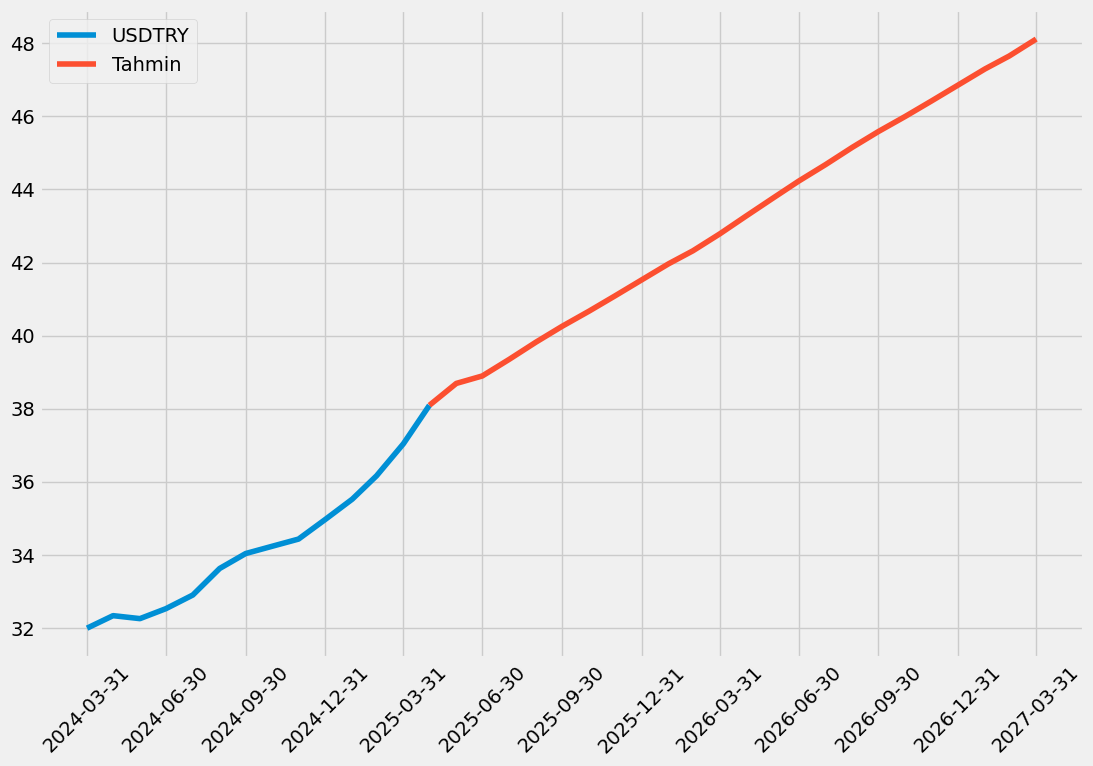

In [ ]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12,8))
plt.plot(usdtahmin1.loc[:"2025-04-30"],label="USDTRY")
plt.plot(usdtahmin1.loc["2025-04-30":"2027-03-31"],label="Tahmin")
plt.legend()
plt.xticks(usdtahmin1.loc[:"2027-03-31"].index[::3],rotation=45)

In [ ]:
import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.001,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,100),
                'growth':trial.suggest_categorical('growth',['linear'])
                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=df14[50:].index
    sn["y"]=df14[50:].values
    prophet=Prophet(**params)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(sn["y"][-13:],predictions["yhat"][-26:-13])
    return mae_score
"""study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

"study = optuna.create_study(direction='minimize')\nstudy.optimize(objective, n_trials=1000)"

In [ ]:
sn=pd.DataFrame()
sn["ds"]=df14.index
sn["y"]=df14.values
prophet=Prophet(growth="linear",changepoint_prior_scale=0.99,changepoint_range=0.96,seasonality_prior_scale=50,n_changepoints=100,mcmc_samples=100,weekly_seasonality=False,daily_seasonality=True,yearly_seasonality=True)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

19:29:19 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

19:29:25 - cmdstanpy - INFO - CmdStan done processing.
19:29:25 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Consider re-running with show_console=True if the above output is unclear!
19:29:25 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 50 iterations at max treedepth (100.0%)
	Chain 2 had 50 iterations at max treedepth (100.0%)
	Chain 3 had 50 iterations at max treedepth (100.0%)
	Chain 

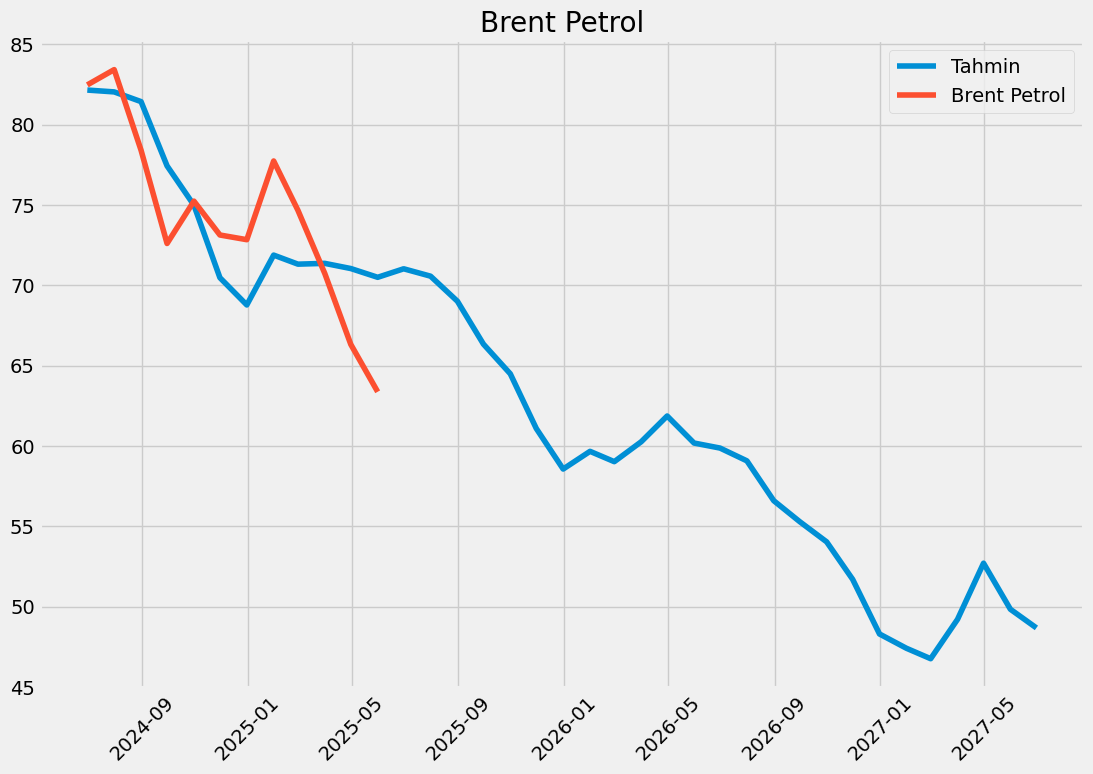

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Brent Petrol")
plt.plot(predictions["yhat"][-37:],label="Tahmin")
plt.plot(df14["Brent"][-12:],label="Brent Petrol")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [ ]:
brenttahmin=predictions["yhat"].iloc[-29:]
brenttahmin

ds
2025-02-28    71.316014
2025-03-31    71.364996
2025-04-30    71.042859
2025-05-31    70.497472
2025-06-30    71.027615
2025-07-31    70.568157
2025-08-31    69.008020
2025-09-30    66.338818
2025-10-31    64.490872
2025-11-30    61.085318
2025-12-31    58.560724
2026-01-31    59.663269
2026-02-28    59.020759
2026-03-31    60.257529
2026-04-30    61.864232
2026-05-31    60.180160
2026-06-30    59.866509
2026-07-31    59.070359
2026-08-31    56.589358
2026-09-30    55.283186
2026-10-31    54.028371
2026-11-30    51.693812
2026-12-31    48.292267
2027-01-31    47.404967
2027-02-28    46.754035
2027-03-31    49.205969
2027-04-30    52.700386
2027-05-31    49.832226
2027-06-30    48.671190
Name: yhat, dtype: float64

In [ ]:
import optuna
"""def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.001,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,50),
                'growth':trial.suggest_categorical('growth',['logistic'])

            

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=enf_belirsizlik.index
    sn["y"]=enf_belirsizlik.values
    sn["cap"] = sn["y"].max() + 0.1  # Üst sınır
    sn["floor"] = 0.1 
    prophet=Prophet(**params)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    future_dates["floor"] = 0.1 
    future_dates["cap"] = sn["y"].max() + 0.1 
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(sn["y"],predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'def objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.001,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,50),\n                \'growth\':trial.suggest_categorical(\'growth\',[\'logistic\'])\n\n            \n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=enf_belirsizlik.index\n    sn["y"]=enf_belirsizlik.values\n    sn["cap"] = sn["y"].max() + 0.1  # Üst sınır\n    sn["floor"] = 0.1 \n    prophet=Prophet(**params)\n    prophet.fit(sn)\n    future_dates=prophet.make_future_dataframe(periods=13,freq="M")\n    future_dates["floor"] = 0.1 \n    future_dates["cap"] = sn["y"].max() + 0.1 \n    predictions=prophet.predict(future_dates)\n    predictions=predict

19:29:26 - cmdstanpy - INFO - Chain [1] start processing
19:29:27 - cmdstanpy - INFO - Chain [1] done processing


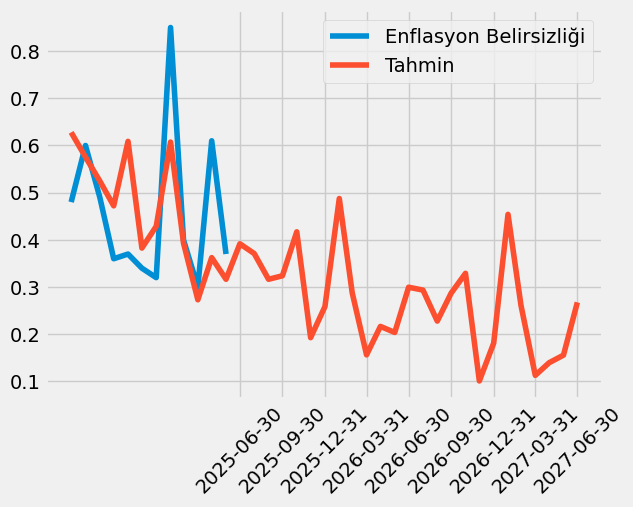

In [ ]:
sn=pd.DataFrame()
sn["ds"]=enf_belirsizlik.index
sn["y"]=enf_belirsizlik.values
params = {'changepoint_prior_scale': 9.430812734181817,
 'changepoint_range': 0.9348926998222709,
 'seasonality_prior_scale': 0.7795711168694762,
 'n_changepoints': 47,
 'growth': 'logistic'}
sn["cap"] = sn["y"].max() + 0.1  # Üst sınır
sn["floor"] = 0.2
prophet=Prophet(**params)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
future_dates["floor"] = 0.2
future_dates["cap"] = sn["y"].max() + 0.1  
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

plt.plot(enf_belirsizlik[-12:],label="Enflasyon Belirsizliği")
plt.plot(predictions["yhat"][-37:],label="Tahmin")
plt.xticks(predictions.index[-25::3],rotation=45)
plt.legend()

In [ ]:
enfbelirsizliktahmin1=pd.DataFrame(predictions["yhat"][-26:])
enfbelirsizliktahmin1.columns=["Enflasyon Belirsizliği"]

enfbelirsizliktahmin1.iloc[0,0]=enf_belirsizlik.iloc[-1,0]
enfbelirsizliktahmin1

,Enflasyon Belirsizliği
ds,
2025-05-31,0.370000
2025-06-30,0.391705
2025-07-31,0.370996
2025-08-31,0.316503
2025-09-30,0.323889
2025-10-31,0.417065
2025-11-30,0.192789
2025-12-31,0.258715
2026-01-31,0.487651


In [ ]:
'''import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.1,0.9),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',[0.01,10]),
                'n_changepoints':trial.suggest_int('n_changepoints',1,25),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'm':trial.suggest_int('m',0,110),
                'cap':trial.suggest_float('cap',0,200)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][params["m"]:-12].index
    sn["y"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][params["m"]:-12].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=12,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][-12:],predictions["yhat"].tail(12))
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)'''

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.1,0.9),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',[0.01,10]),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,25),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'m\':trial.suggest_int(\'m\',0,110),\n                \'cap\':trial.suggest_float(\'cap\',0,200)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][p

In [ ]:
#study.best_params

In [ ]:
brenttahmin1=(brenttahmin.pct_change()*100).dropna()
brenttahmin1

ds
2025-03-31    0.068682
2025-04-30   -0.451393
2025-05-31   -0.767688
2025-06-30    0.752003
2025-07-31   -0.646872
2025-08-31   -2.210823
2025-09-30   -3.867959
2025-10-31   -2.785619
2025-11-30   -5.280676
2025-12-31   -4.132897
2026-01-31    1.882737
2026-02-28   -1.076893
2026-03-31    2.095482
2026-04-30    2.666394
2026-05-31   -2.722207
2026-06-30   -0.521187
2026-07-31   -1.329875
2026-08-31   -4.200078
2026-09-30   -2.308158
2026-10-31   -2.269795
2026-11-30   -4.320987
2026-12-31   -6.580179
2027-01-31   -1.837355
2027-02-28   -1.373130
2027-03-31    5.244326
2027-04-30    7.101613
2027-05-31   -5.442390
2027-06-30   -2.329889
Name: yhat, dtype: float64

In [ ]:
motorintahmin=pd.DataFrame((1+(((usdtahmin1[10:-3].pct_change(periods=1)*100).dropna())/100)).values*(1+(((brenttahmin1.loc[:"2027-04-30"]).dropna())/100)).values.reshape(-1,1))
motorintahmin.columns=["Motorin"]
motorintahmin=motorintahmin.set_index(pd.date_range(start="2025-03-31",periods=len(motorintahmin),freq="1M"))
motorintahmin=(motorintahmin-1)*100
motorintahmin

,Motorin
2025-03-31,1.869527
2025-04-30,1.966496
2025-05-31,2.053540
2025-06-30,2.335756
2025-07-31,-0.122797
2025-08-31,-1.069329
2025-09-30,-2.710807
2025-10-31,-1.733552
2025-11-30,-4.306412
2025-12-31,-3.145135


In [ ]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,100),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=money["Para Arzi"].index
    sn["y"]=money["Para Arzi"].values
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(money["Para Arzi"],predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,100),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=money["Para Arzi"].index\n    sn["y"]=money["Para Arzi"].values\n    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_rang

In [ ]:
sn=pd.DataFrame()
sn["ds"]=money["Para Arzi"].index
sn["y"]=money["Para Arzi"].values
prophet=Prophet(changepoint_prior_scale=0.954897796889,changepoint_range=0.9529543315216538,growth='linear',seasonality_prior_scale=10.03031163229546,n_changepoints=15)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

19:29:28 - cmdstanpy - INFO - Chain [1] start processing
19:29:28 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
paraarzitahmin=(predictions["yhat"]).tail(25)
paraarzitahmin

ds
2025-06-30    2.271386
2025-07-31    1.487256
2025-08-31    2.012796
2025-09-30    1.739183
2025-10-31    1.356143
2025-11-30    1.386563
2025-12-31    1.881835
2026-01-31    1.001867
2026-02-28    0.381639
2026-03-31    1.911035
2026-04-30    1.592291
2026-05-31    1.083063
2026-06-30    1.571076
2026-07-31    0.922928
2026-08-31    1.498086
2026-09-30    1.055902
2026-10-31    0.568974
2026-11-30    0.303453
2026-12-31    1.029664
2027-01-31    0.509247
2027-02-28   -0.081212
2027-03-31    1.174909
2027-04-30    0.550663
2027-05-31    0.179580
2027-06-30    0.878416
Name: yhat, dtype: float64

In [ ]:
paraarzitahmin1 = paraarzitahmin
paraarzitahmin1 = np.array(paraarzitahmin1).reshape(-1, 1)
paraarzitahmin1 = pd.DataFrame(paraarzitahmin1)
paraarzitahmin1.columns = ["Para Arzi"]
paraarzitahmin1 = paraarzitahmin1.set_index(pd.date_range(start="2025-06-30", periods=len(paraarzitahmin), freq="1M"))
row=pd.DataFrame({"Para Arzi":money.iloc[-6:,0]},index=pd.date_range(start="2024-12-31",periods=6,freq="M"))
paraarzitahmin1=pd.concat([row,paraarzitahmin1])
paraarzitahmin1

,Para Arzi
2024-12-31,1.352526
2025-01-31,1.748863
2025-02-28,3.358668
2025-03-31,4.308740
2025-04-30,3.476216
2025-05-31,1.602298
2025-06-30,2.271386
2025-07-31,1.487256
2025-08-31,2.012796
2025-09-30,1.739183


In [ ]:
m2_yıllık=(((pd.concat([money["Para Arzi"][:-1],paraarzitahmin1.loc["2025"]],axis=0)/100)+1).rolling(window=12).apply(np.prod, raw=True).dropna()-1)*100



In [ ]:
'''import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.1,0.9),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,25),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'm':trial.suggest_int('m',0,110),
                'cap':trial.suggest_float('cap',0,200)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=borc["Borç"][params["m"]:-12].index
    sn["y"]=borc["Borç"][params["m"]:-12].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=12,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(borc["Borç"][-12:],predictions["yhat"][-12:])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)'''

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.1,0.9),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,25),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'m\':trial.suggest_int(\'m\',0,110),\n                \'cap\':trial.suggest_float(\'cap\',0,200)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=borc["Borç"][params["m"]:-12].index\n    sn["y"]=borc["Borç

In [ ]:
#study.best_params

In [ ]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,5),
                'n_changepoints':trial.suggest_int('n_changepoints',1,200),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),


                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=df3["Kredi"].index
    sn["y"]=df3["Kredi"].values
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(df3.values,predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,5),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,200),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=df3["Kredi"].index\n    sn["y"]=df3["Kredi"].values\n    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=

In [ ]:
"""study.best_params"""

'study.best_params'

In [ ]:
sn=pd.DataFrame()
sn["ds"]=kredi["Kredi"].loc["2015":].index
sn["y"]=kredi["Kredi"].loc["2015":].values
prophet=Prophet(changepoint_prior_scale=0.9,changepoint_range=0.9,growth="linear",seasonality_prior_scale=50,n_changepoints=100,yearly_seasonality=False,weekly_seasonality=True,mcmc_samples=50)

prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

19:29:29 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

19:29:31 - cmdstanpy - INFO - CmdStan done processing.
19:29:31 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is inf, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is inf, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Consider re-running with show_console=True if the above output is unclear!
19:29:31 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 25 iterations at max treedepth (100.0%)
	Chain 2 had 25 iterations at max treedepth (100.0%)
	Chain 3 had 25 iterations at max treedepth (100.0%)
	Ch

In [ ]:
kreditahmin=(predictions["yhat"]).tail(25)*0.65
kreditahmin


ds
2025-06-30    1.704444
2025-07-31    1.750667
2025-08-31    1.801180
2025-09-30    2.073774
2025-10-31    2.225179
2025-11-30    1.834463
2025-12-31    1.634862
2026-01-31    1.430913
2026-02-28    1.441154
2026-03-31    2.140341
2026-04-30    1.850517
2026-05-31    1.901030
2026-06-30    2.173624
2026-07-31    2.325029
2026-08-31    1.860620
2026-09-30    1.734712
2026-10-31    1.530763
2026-11-30    1.893903
2026-12-31    1.940126
2027-01-31    1.990639
2027-02-28    2.000880
2027-03-31    1.801279
2027-04-30    2.424879
2027-05-31    1.960470
2027-06-30    1.834562
Name: yhat, dtype: float64

In [ ]:
kreditahmin1 = kreditahmin

kreditahmin1 = np.array(kreditahmin1).reshape(-1, 1)
kreditahmin1 = pd.DataFrame(kreditahmin1)
kreditahmin1.columns = ["Kredi"]
kreditahmin1 = kreditahmin1.set_index(pd.date_range(start="2025-06-30", periods=len(kreditahmin1), freq="1M"))
row=pd.DataFrame({"Kredi":kredi.iloc[-5:,0]},index=pd.date_range(start="2025-01-31",periods=5,freq="1M"))
kreditahmin1=pd.concat([row,kreditahmin1],axis=0)


kredi_yıllık=(((pd.concat([kredi["Kredi"],kreditahmin1.loc["2025"]],axis=0)/100)+1).rolling(window=12).apply(np.prod, raw=True).dropna()-1)*100



In [ ]:
kredi_yıllık

,Kredi
2007-01-31,36.371181
2007-02-28,35.230321
2007-03-31,33.401373
2007-04-30,29.160525
2007-05-31,24.528101
...,...
2025-08-31,37.814538
2025-09-30,35.925869
2025-10-31,34.289903
2025-11-30,32.362488


In [ ]:
import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,150),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=üfe["ÜFE"].index
    sn["y"]=üfe["ÜFE"].values
    sn["usd"]=(usd[:-1].dropna()).values
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],mcmc_samples=100)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=25,freq="M")
    future_dates["usd"]=pd.concat([usd["USD/TL"],usdtahmin1["USD/TL"].loc["2025-05":]],axis=0).values
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(üfe["ÜFE"],predictions["yhat"][:-25])
    return mae_score
"""study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

"study = optuna.create_study(direction='minimize')\nstudy.optimize(objective, n_trials=1000)"

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm
params = {
    'series': "TP.TUFE1YI.T1",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

üfe = formatted_response['items']
üfe = pd.DataFrame(üfe)


üfe = üfe.drop(columns=['UNIXTIME','Tarih'])
üfe.columns = ['ÜFE']
üfe['ÜFE'] = pd.to_numeric(üfe['ÜFE'])
üfe=üfe.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(üfe)))

üfe=üfe.dropna()
üfe

model = pm.auto_arima(üfe['ÜFE'], seasonal=True, stepwise=True, trace=True,m=1)



# Gelecek 12 ay için tahmin yapma
forecast = model.predict(n_periods=13)
forecast



Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=2017.633, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=2071.898, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=2070.819, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=2063.991, Time=0.04 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=2019.161, Time=0.10 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=2032.337, Time=0.13 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=2018.927, Time=0.18 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=2019.238, Time=0.20 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=2036.069, Time=0.08 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=2019.905, Time=0.15 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=2029.739, Time=0.19 sec
 ARIMA(3,2,3)(0,0,0)[0]             : AIC=inf, Time=0.64 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=2018.021, Time=0.20 sec

Best model:  ARIMA(2,2,2)(0,0,0)[0]          
Total fit time: 2.094 seconds


2025-05-31    4212.759282
2025-06-30    4293.976703
2025-07-31    4370.916082
2025-08-31    4447.909894
2025-09-30    4524.115137
2025-10-31    4600.453004
2025-11-30    4676.626440
2025-12-31    4752.849644
2026-01-31    4829.035121
2026-02-28    4905.235543
2026-03-31    4981.426760
2026-04-30    5057.622135
2026-05-31    5133.815184
Freq: ME, dtype: float64

In [ ]:
forecast.loc[pd.to_datetime("2025-04-30")]=üfe.iloc[-1,0]
forecast=forecast.sort_index()
forecast

2025-04-30    4128.190000
2025-05-31    4212.759282
2025-06-30    4293.976703
2025-07-31    4370.916082
2025-08-31    4447.909894
2025-09-30    4524.115137
2025-10-31    4600.453004
2025-11-30    4676.626440
2025-12-31    4752.849644
2026-01-31    4829.035121
2026-02-28    4905.235543
2026-03-31    4981.426760
2026-04-30    5057.622135
2026-05-31    5133.815184
dtype: float64

In [ ]:
noise_scale =  usdtahmin1.mean()*0.01

# Pozitif-negatif random gürültü oluştur
noise = np.random.normal(loc=0, scale=noise_scale, size=len(usdtahmin1))

# Gürültü eklenmiş seri
usd_noisy = usdtahmin1.copy()
usd_noisy["n"]=noise
usd_noisy["USD/TL"]+=usd_noisy["n"]
usd_noisy



,USD/TL,n
2024-03-31,32.604949,0.618206
2024-04-30,32.967992,0.638525
2024-05-31,32.600999,0.353117
2024-06-30,32.347980,-0.173255
2024-07-31,33.644164,0.749669
2024-08-31,33.738197,0.116949
2024-09-30,34.510606,0.480139
2024-10-31,34.715560,0.482978
2024-11-30,34.077342,-0.349277
2024-12-31,35.391503,0.424798


In [ ]:
sn=pd.DataFrame()
sn["ds"]=üfe["ÜFE"].index
sn["y"]=üfe["ÜFE"].values
sn["usd"]=(usd[:-1].dropna()).values
prophet=Prophet(changepoint_prior_scale=0.99,changepoint_range=0.9273388689420088,growth='linear',seasonality_prior_scale=10.9585793734389948,n_changepoints=100,mcmc_samples=100,yearly_seasonality=True,weekly_seasonality=True)
prophet.add_regressor("usd")
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
future_dates["usd"]=pd.concat([usd["USD/TL"],usd_noisy["USD/TL"].loc["2025-06":"2027-05"]],axis=0).values
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])
(predictions["yhat"].tail(25))

19:29:34 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

19:29:39 - cmdstanpy - INFO - CmdStan done processing.
19:29:39 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Consider re-running with show_console=True if the above output is unclear!
19:29:40 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 26 divergent transitions (52.0%)
	Chain 1 had 24 iterations at max treedepth (48.0%)
	Chain 2 had 50 iterations at max treedepth (100.0%)
	Chain 3 had 50

ds
2025-05-31    4235.148630
2025-06-30    4290.295167
2025-07-31    4374.401934
2025-08-31    4421.017522
2025-09-30    4516.729293
2025-10-31    4573.009149
2025-11-30    4595.633431
2025-12-31    4684.979524
2026-01-31    4773.504358
2026-02-28    4854.221930
2026-03-31    4911.037169
2026-04-30    4969.334398
2026-05-31    5040.308923
2026-06-30    5081.666186
2026-07-31    5151.021555
2026-08-31    5237.140773
2026-09-30    5316.780119
2026-10-31    5370.640040
2026-11-30    5447.865625
2026-12-31    5493.687256
2027-01-31    5549.742046
2027-02-28    5640.163914
2027-03-31    5713.791228
2027-04-30    5770.584524
2027-05-31    5845.283219
Name: yhat, dtype: float64

In [ ]:
üfetahmin=(predictions["yhat"].tail(26)).pct_change().dropna()*100
üfetahmin

ds
2025-05-31    1.975464
2025-06-30    1.302116
2025-07-31    1.960396
2025-08-31    1.065645
2025-09-30    2.164926
2025-10-31    1.246031
2025-11-30    0.494735
2025-12-31    1.944152
2026-01-31    1.889546
2026-02-28    1.690950
2026-03-31    1.170429
2026-04-30    1.187066
2026-05-31    1.428250
2026-06-30    0.820530
2026-07-31    1.364816
2026-08-31    1.671886
2026-09-30    1.520665
2026-10-31    1.013018
2026-11-30    1.437921
2026-12-31    0.841093
2027-01-31    1.020349
2027-02-28    1.629299
2027-03-31    1.305411
2027-04-30    0.993969
2027-05-31    1.294474
Name: yhat, dtype: float64

In [ ]:
sn=pd.DataFrame()
sn["ds"]=m3["M3"].index
sn["y"]=m3["M3"].values
prophet=Prophet(changepoint_prior_scale=2.5,changepoint_range=0.9,growth='linear',seasonality_prior_scale=4.7636997959024185,n_changepoints=10)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])
(predictions["yhat"].tail(25))

19:29:40 - cmdstanpy - INFO - Chain [1] start processing
19:29:40 - cmdstanpy - INFO - Chain [1] done processing


ds
2025-06-30    2.276562
2025-07-31    1.444997
2025-08-31    1.867873
2025-09-30    1.592808
2025-10-31    1.262226
2025-11-30    1.221273
2025-12-31    1.722557
2026-01-31    0.798847
2026-02-28    0.257404
2026-03-31    1.699687
2026-04-30    1.357126
2026-05-31    0.801710
2026-06-30    1.289220
2026-07-31    0.531802
2026-08-31    1.092368
2026-09-30    0.623135
2026-10-31    0.175257
2026-11-30   -0.085960
2026-12-31    0.576311
2027-01-31   -0.001369
2027-02-28   -0.556761
2027-03-31    0.710837
2027-04-30    0.112307
2027-05-31   -0.420365
2027-06-30    0.308748
Name: yhat, dtype: float64

In [ ]:
m3tahmin=(predictions["yhat"].tail(25))


m3tahmin1 = np.array(m3tahmin).reshape(-1, 1)
m3tahmin1 = pd.DataFrame(m3tahmin1)
m3tahmin1.columns = ["M3"]
m3tahmin1 = m3tahmin1.set_index(pd.date_range(start="2025-06-30", periods=len(m3tahmin1), freq="1M"))
row=pd.DataFrame({"M3":m3.iloc[-4:,0]},index=pd.date_range(start="2025-02-28",periods=4,freq="1M"))
m3tahmin1=pd.concat([row,m3tahmin1],axis=0)
m3tahmin1

,M3
2025-02-28,4.038292
2025-03-31,3.642287
2025-04-30,1.971838
2025-05-31,1.312861
2025-06-30,2.276562
2025-07-31,1.444997
2025-08-31,1.867873
2025-09-30,1.592808
2025-10-31,1.262226
2025-11-30,1.221273


In [ ]:
'''import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.1,0.9),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,25),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'cap':trial.suggest_float('cap',0,400)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=sanayi["Sanayi"].index
    sn["y"]=sanayi["Sanayi"].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=15,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(sanayi["Sanayi"],predictions["yhat"][:-15])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=2000)'''

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.1,0.9),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,25),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'cap\':trial.suggest_float(\'cap\',0,400)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=sanayi["Sanayi"].index\n    sn["y"]=sanayi["Sanayi"].values\n    sn["cap"]=params["cap"]\n    prophet=Prophet(cha

In [ ]:
#study.best_params

In [ ]:
"""def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,50),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'cap':trial.suggest_int('cap',0,400)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=redkt["REDKT"].index
    sn["y"]=redkt["REDKT"].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=36,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(redkt["REDKT"],predictions["yhat"][:-36])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'def objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,50),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'cap\':trial.suggest_int(\'cap\',0,400)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=redkt["REDKT"].index\n    sn["y"]=redkt["REDKT"].values\n    sn["cap"]=params["cap"]\n    prophet=Prophet(changepoint_prior_scal

In [ ]:
import statsmodels.api as sm
tahmindf=pd.DataFrame()
tahmindf=pd.concat([usdtahmin1["USD/TL"].rolling(3).mean()],axis=1)

tahmindf=tahmindf.pct_change(periods=1)*100
tahmindf["M3"]=m3tahmin1["M3"].shift(1)
tahmindf["Para Arzi"]=paraarzitahmin1.rolling(3).mean()
tahmindf["Enflasyon Belirsizliği"]=enfbelirsizliktahmin1["Enflasyon Belirsizliği"]
tahmindf["Kredi"]=kreditahmin1["Kredi"].shift(1).rolling(2).mean()
tahmindf["Kredi2"]=kreditahmin1["Kredi"].rolling(3).mean()
tahmindf["Zam"]=zamtahmin["Zam"]
tahmindf["Motorin"]=motorintahmin["Motorin"]/2
tahmindf["Motorin2"]=motorintahmin["Motorin"]/2
tahmindf["İşsizlik"]=8.2





tahmindf=tahmindf[['USD/TL', 'Motorin','Motorin2', 'Zam',
       'Enflasyon Belirsizliği', 'Para Arzi', 'M3', 'Kredi','Kredi2','İşsizlik']]

tahmindf.columns=["USD/TL","Motorin","Motorin2","Zam","Enflasyon Belirsizliği",'ParaArzi','M3', 'Kredi','Kredi2','İşsizlik']
tahmindf=tahmindf.loc["2025-05-31":]


tahmindf["Enflasyon Belirsizliği"]=enfbelirsizliktahmin1["Enflasyon Belirsizliği"]

tahmindf["USD/TL"].iloc[0]=data["USD/TL"].iloc[-1]
tahmindf["Motorin"].iloc[0]=data["Motorin"].iloc[-1]
tahmindf["ParaArzi"].iloc[0]=data["ParaArzi"].iloc[-1]
tahmindf["M3"].iloc[0]=data["M3"].iloc[-1]
tahmindf["Kredi"].iloc[0]=data["Kredi"].iloc[-1]
tahmindf["Enflasyon Belirsizliği"].iloc[0]=enf_belirsizlik.iloc[-1,0]






tahmindf["Motorin"]=tahmindf["Motorin2"]
tahmindf["Motorin"].iloc[0]=data["Motorin2"].iloc[-1]
tahmindf["Motorin2"].iloc[0]=data["Motorin2"].iloc[-1]
tahmindf=tahmindf.fillna(0)
tahmindf=tahmindf.loc["2025-05-31":"2026-06-30"]
tahmindf["Zam"].loc["2026-01"]=30

tahmindf

,USD/TL,Motorin,Motorin2,Zam,Enflasyon Belirsizliği,ParaArzi,M3,Kredi,Kredi2,İşsizlik
2025-05-31,2.273403,-0.140000,-0.140000,0.0,0.370000,1.602298,1.312861,3.317340,3.031716,8.2
2025-06-30,1.630538,1.167878,1.167878,0.0,0.391705,2.449966,1.312861,2.812313,2.443024,8.2
2025-07-31,1.086545,-0.061399,-0.061399,0.0,0.370996,1.786980,2.276562,2.005865,1.920799,8.2
2025-08-31,0.967854,-0.534664,-0.534664,0.0,0.316503,1.923812,1.444997,1.727556,1.752097,8.2
2025-09-30,1.150736,-1.355404,-1.355404,0.0,0.323889,1.746412,1.867873,1.775924,1.875207,8.2
2025-10-31,1.104167,-0.866776,-0.866776,0.0,0.417065,1.702707,1.592808,1.937477,2.033378,8.2
2025-11-30,1.046863,-2.153206,-2.153206,0.0,0.192789,1.493963,1.262226,2.149476,2.044472,8.2
2025-12-31,1.044309,-1.572568,-1.572568,0.0,0.258715,1.541514,1.221273,2.029821,1.898168,8.2
2026-01-31,1.054579,1.488245,1.488245,30.0,0.487651,1.423422,1.722557,1.734662,1.633413,8.2
2026-02-28,0.991998,-0.014376,-0.014376,0.0,0.287704,1.088447,0.798847,1.532887,1.502309,8.2


In [ ]:
tahmindf["ÜFEt1"]=üfetahmin
tahmindf["USD/TL"]=usd_noisy["USD/TL"].rolling(3).mean().pct_change().dropna()*100

In [ ]:
features=['USD/TL', 'Motorin', 'M3', 'Enflasyon Belirsizliği', 'TÜFEt-1', 'Kredi','Kredi2', 'İhracat', 'İthalat',
       'İşsizlik', 'ÜFEt2', 'TÜFECt2', 'ÜFEt1', 'TÜFECt1','Anket','ParaArzi','Zam', 'TÜFE']

data1=data[features]
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaled_data = scaler1.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler2 = StandardScaler()
scaled_data["TÜFE"]=scaler2.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
scaled_data




,USD/TL,Motorin,M3,Enflasyon Belirsizliği,TÜFEt-1,Kredi,Kredi2,İhracat,İthalat,İşsizlik,ÜFEt2,TÜFECt2,ÜFEt1,TÜFECt1,Anket,ParaArzi,Zam,TÜFE
0,-0.459234,-0.701557,-0.882712,-0.846827,-0.171061,-0.316234,-0.726881,-1.535659,-2.392934,-0.533666,-0.954590,-0.993216,-0.677070,-0.807882,-0.747563,-0.827936,-0.292672,-0.971070
1,-0.772381,-0.087324,-0.616276,-0.846827,-0.967393,-0.722537,-1.032140,2.105797,1.485059,-0.475580,-0.665158,-0.791463,-0.926304,-0.983240,-0.670561,-0.577900,-0.292672,-0.978956
2,-1.255626,-0.064212,-0.643814,-0.421851,-0.975282,-1.027684,-0.537876,0.150628,1.059043,-0.533666,-0.913371,-0.966284,-0.724245,-0.771766,-0.480622,-0.600269,-0.292672,-0.622455
3,-0.735967,0.062869,-0.122826,-0.796830,-0.618625,-0.533601,0.089996,-0.571425,-0.986958,-0.417494,-0.712140,-0.755459,-0.686363,-0.079396,-0.644894,-0.096146,-0.292672,-0.711179
4,-0.603807,0.198950,-0.682551,-0.621840,-0.707388,0.094040,-0.753242,-0.041930,0.585973,-0.185149,-0.674413,-0.065209,-0.365641,-0.340289,-1.004238,-0.614737,-0.292672,-0.757750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,-0.327235,0.150074,-0.062513,0.703085,-0.512908,0.528488,0.043418,0.289705,0.626108,-1.521130,-0.628437,-0.248017,-0.724025,-0.478941,-1.004238,-0.190342,2.665823,1.215709
108,-0.208191,0.142578,0.681777,-0.421851,1.220348,0.047480,0.688043,-0.814913,-1.060063,-1.637302,-0.711921,-0.463530,0.161167,1.574366,-1.004238,0.429599,-0.292672,0.021950
109,-0.123725,-0.455815,0.527117,-0.671837,0.026064,0.691868,0.678009,-0.246200,-0.143342,-1.637302,0.169644,1.583487,-0.154672,-0.142204,-1.004238,0.795474,-0.292672,0.102708
110,-0.000690,-0.646402,-0.125279,0.103119,0.106858,0.681837,0.606687,0.436832,0.618384,-1.637302,-0.144901,-0.127825,-0.231623,-0.293956,-1.004238,0.474867,-0.292672,0.334869


In [ ]:
import optuna
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,GRU,SimpleRNN
import keras
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.layers import LSTM, Dense, Dropout
from keras.regularizers import l2,l1
features=['M3','ParaArzi','Enflasyon Belirsizliği','Kredi','İşsizlik','Zam']
def weighted_mse(y_true, y_pred):
    n = len(y_true)
    weights = 1 / np.arange(1, n + 1)  # Ters orantılı ağırlıklar
    weights = weights[::-1]  # Ağırlıkları ters çevir (küçükten büyüğe)
    mse = np.sum(weights * (y_true - y_pred) ** 2) / n
    return mse
def objective(trial):
    # Define hyperparameters to be optimized
    features =['Enflasyon Belirsizliği', 'Kredi2', 'USD/TL', 'Motorin','ParaArzi','İşsizlik','ÜFEt1','Zam']
    
    
    X=scaled_data[features]
    y=scaled_data["TÜFE"]
    X=np.array(X)
    y=np.array(y).reshape(-1,1)
    X=pd.DataFrame(X,columns=features)
    y=pd.DataFrame(y,columns=["TÜFE"])
    X_train,X_test=X.iloc[:-12,:],X.iloc[-12:,:]
    y_train,y_test=y[:-12],y[-12:]
    X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)


    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-1)
    units1 = trial.suggest_int('units1', 1, 256)
    batch_size = trial.suggest_int('batch_size', 2, 64)
    activation1 = trial.suggest_categorical('activation1', ['tanh','selu','relu','linear'])
    optimizer = trial.suggest_categorical('optimizer', ['adam'])
    rlrate=trial.suggest_float('rlrate',0.001,0.999)
    keras.utils.set_random_seed(42)
    early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
    model = Sequential()   
    model.add(Dense(units=units1,activation=activation1,input_dim=(X_train.shape[1])))
    model.add(Dropout(rlrate))
    model.add(Dense(units=1))

    if optimizer == 'adam':
       optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
       optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    elif optimizer == 'SGD':
       optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate) 

    

    

    

    model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])

    # Train model
    model.fit(X_train, y_train, epochs=1000, batch_size=batch_size,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))

    # Evaluate model
    y_pred = model.predict(X_test)
    tahminler=pd.DataFrame(scaler2.inverse_transform(y_test))
    tahminler.columns=["TÜFE"]
    tahminler["Tahmin"]=scaler2.inverse_transform(y_pred)
    tahminler=tahminler.set_index(data.index[-12:])
    tahminler.loc["2024-05-31","Tahmin"]+=0.66
    tahminler.loc["2024-07-31","Tahmin"]+=0.67
    tahminler.loc["2025-01-31","Tahmin"]=5.03
    mse=np.sqrt(mean_squared_error(tahminler["TÜFE"].iloc[:-1],tahminler["Tahmin"].iloc[:-1]))


    return mse # Return validation accuracy as the objective

"""study = optuna.create_study(direction='minimize')  # or 'minimize' depending on your objective
study.optimize(objective, n_trials=500)  # You can adjust the number of trials"""



"study = optuna.create_study(direction='minimize')  # or 'minimize' depending on your objective\nstudy.optimize(objective, n_trials=500)  # You can adjust the number of trials"

In [ ]:
"""selected_features =['Enflasyon Belirsizliği', 'Kredi2', 'USD/TL', 'Motorin','ParaArzi','İşsizlik','ÜFEt1','Zam']
X=scaled_data[selected_features]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-12,:],X.iloc[-12:,:]
y_train,y_test=y[:-12],y[-12:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model = Sequential()   
model.add(Dense(units=18,activation="relu",input_dim=(X_train.shape[1])))
model.add(Dropout(0.658952))
model.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.018641)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])

# Train model
model.fit(X_train, y_train, epochs=1000, batch_size=57,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))

# Evaluate model
y_pred = model.predict(X_test)
tahminler=pd.DataFrame(scaler2.inverse_transform(y_test))
tahminler.columns=["TÜFE"]
tahminler["Tahmin"]=scaler2.inverse_transform(y_pred)
tahminler.index=data.index[-12:]
tahminler.loc["2024-05-31","Tahmin"]+=0.66
tahminler.loc["2024-07-31","Tahmin"]+=0.67
tahminler.loc["2025-01-31","Tahmin"]=5.03
mse=mean_squared_error(tahminler["TÜFE"].iloc[:-1],tahminler["Tahmin"].iloc[:-1])
mse"""

'selected_features =[\'Enflasyon Belirsizliği\', \'Kredi2\', \'USD/TL\', \'Motorin\',\'ParaArzi\',\'İşsizlik\',\'ÜFEt1\',\'Zam\']\nX=scaled_data[selected_features]\ny=scaled_data["TÜFE"]\nX=np.array(X)\ny=np.array(y).reshape(-1,1)\nX=pd.DataFrame(X,columns=selected_features)\ny=pd.DataFrame(y,columns=["TÜFE"])\nX_train,X_test=X.iloc[:-12,:],X.iloc[-12:,:]\ny_train,y_test=y[:-12],y[-12:]\nX_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)\nkeras.utils.set_random_seed(42)\nearly_stopping = EarlyStopping(monitor=\'val_loss\', patience=0, restore_best_weights=True)\nmodel = Sequential()   \nmodel.add(Dense(units=18,activation="relu",input_dim=(X_train.shape[1])))\nmodel.add(Dropout(0.658952))\nmodel.add(Dense(units=1))\noptimizer = tf.keras.optimizers.Adam(learning_rate=0.018641)\nmodel.compile(optimizer=optimizer, loss=\'mse\', metrics=[\'mean_squared_error\'])\n\n# Train model\nmodel.fit(X_train, y_train, epochs=1000, batch_size=57,callbacks=[earl

In [ ]:
features=['Enflasyon Belirsizliği', 'Kredi2', 'USD/TL', 'Motorin','ParaArzi','İşsizlik','ÜFEt1','Zam']

data1=data[features]
data1=pd.concat([data1,tahmindf[features].iloc[1:]],axis=0)
data1["TÜFE"]=data["TÜFE"]
data1=data1.fillna(0)
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaled_data = scaler1.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler2 = StandardScaler()
scaled_data["TÜFE"]=scaler2.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))


In [ ]:
features=['Enflasyon Belirsizliği', 'Kredi2', 'USD/TL', 'Motorin','ParaArzi','İşsizlik','ÜFEt1','Zam']

data1=data[features]
data1=pd.concat([data1,tahmindf[features].iloc[1:]],axis=0)
data1["TÜFE"]=data["TÜFE"]
data1=data1.fillna(0)
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaled_data = scaler1.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler2 = StandardScaler()
scaled_data["TÜFE"]=scaler2.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))



features=['Enflasyon Belirsizliği', 'Kredi2', 'USD/TL', 'Motorin','ParaArzi','İşsizlik','ÜFEt1','Zam']
tahmindf2=tahmindf.copy()
tahmindf2["Motorin"]=np.where(tahmindf2["Motorin"]>0,tahmindf2["Motorin"]*2.5,tahmindf["Motorin"])

tahmindf2["USD/TL"]=np.where(tahmindf2["USD/TL"]>0,tahmindf2["USD/TL"]*2.5,tahmindf["USD/TL"])
tahmindf2["ÜFEt1"]=np.where(tahmindf2["ÜFEt1"]>0,tahmindf2["ÜFEt1"]*2.5,tahmindf["ÜFEt1"])
tahmindf2["Kredi2"]=np.where(tahmindf2["Kredi2"]>0,tahmindf2["Kredi2"]*2.5,tahmindf["Kredi2"])
data2=data[features]
data2=pd.concat([data2,tahmindf2[features].iloc[1:]],axis=0)
data2["TÜFE"]=data["TÜFE"]
data2=data2.fillna(0)
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaled_data2 = scaler1.fit_transform(data2.iloc[:,:-1])
scaled_data2=pd.DataFrame(scaled_data2,columns=data2.columns[:-1])
scaler2 = StandardScaler()
scaled_data2["TÜFE"]=scaler2.fit_transform(np.array(data2["TÜFE"]).reshape(-1, 1))




features=['Enflasyon Belirsizliği', 'Kredi2', 'USD/TL', 'Motorin','ParaArzi','İşsizlik','ÜFEt1','Zam']
tahmindf3=tahmindf.copy()
tahmindf3["Motorin"]=np.where(tahmindf3["Motorin"]>0,tahmindf3["Motorin"]*0.25,tahmindf["Motorin"])

tahmindf3["USD/TL"]=np.where(tahmindf3["USD/TL"]>0,tahmindf3["USD/TL"]*0.25,tahmindf["USD/TL"])
tahmindf3["ÜFEt1"]=np.where(tahmindf3["ÜFEt1"]>0,tahmindf3["ÜFEt1"]*0.25,tahmindf["ÜFEt1"])
tahmindf3["Kredi2"]=np.where(tahmindf3["Kredi2"]>0,tahmindf3["Kredi2"]*0.25,tahmindf["Kredi2"])
tahmindf3["ParaArzi"]=np.where(tahmindf3["ParaArzi"]>0,tahmindf3["ParaArzi"]*0.25,tahmindf["ParaArzi"])

data3=data[features]
data3=pd.concat([data3,tahmindf3[features].iloc[1:]],axis=0)
data3["TÜFE"]=data["TÜFE"]
data3=data3.fillna(0)
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaled_data3 = scaler1.fit_transform(data3.iloc[:,:-1])
scaled_data3=pd.DataFrame(scaled_data3,columns=data3.columns[:-1])
scaler2 = StandardScaler()
scaled_data3["TÜFE"]=scaler2.fit_transform(np.array(data3["TÜFE"]).reshape(-1, 1))


In [ ]:
selected_features =['Enflasyon Belirsizliği', 'Kredi2', 'USD/TL', 'Motorin','ParaArzi','İşsizlik','ÜFEt1','Zam']
X = scaled_data[selected_features]
y = scaled_data["TÜFE"]

X = np.array(X)
y = np.array(y).reshape(-1, 1)

X = pd.DataFrame(X, columns=selected_features)
y = pd.DataFrame(y, columns=["TÜFE"])

X_train, X_test = X.iloc[:-24, :], X.iloc[-24:, :]
y_train, y_test = y[:-24], y[-24:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
keras.utils.set_random_seed(42)
tahminler=pd.DataFrame(scaler2.inverse_transform(y_test))
for i in range(1,6):
    model = keras.models.load_model(f'nnüfeli{i}.keras')

    y_pred = model.predict(X_test)
    
    tahminler[f"NN_{i}"]=scaler2.inverse_transform(y_pred)
tahminler.index=data1.index[-24:]



selected_features =['Enflasyon Belirsizliği', 'Kredi2', 'USD/TL', 'Motorin','ParaArzi','İşsizlik','ÜFEt1','Zam']
X = scaled_data2[selected_features]
y = scaled_data2["TÜFE"]

X = np.array(X)
y = np.array(y).reshape(-1, 1)

X = pd.DataFrame(X, columns=selected_features)
y = pd.DataFrame(y, columns=["TÜFE"])

X_train, X_test = X.iloc[:-24, :], X.iloc[-24:, :]
y_train, y_test = y[:-24], y[-24:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
keras.utils.set_random_seed(42)
tahminler2=pd.DataFrame(scaler2.inverse_transform(y_test))
for i in range(1,6):
    model = keras.models.load_model(f'nnüfeli{i}.keras')

    y_pred = model.predict(X_test)
    
    tahminler2[f"NN_{i}"]=scaler2.inverse_transform(y_pred)
tahminler2.index=data1.index[-24:]







selected_features =['Enflasyon Belirsizliği', 'Kredi2', 'USD/TL', 'Motorin','ParaArzi','İşsizlik','ÜFEt1','Zam']
X = scaled_data3[selected_features]
y = scaled_data3["TÜFE"]

X = np.array(X)
y = np.array(y).reshape(-1, 1)

X = pd.DataFrame(X, columns=selected_features)
y = pd.DataFrame(y, columns=["TÜFE"])

X_train, X_test = X.iloc[:-24, :], X.iloc[-24:, :]
y_train, y_test = y[:-24], y[-24:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
keras.utils.set_random_seed(42)
tahminler3=pd.DataFrame(scaler2.inverse_transform(y_test))
for i in range(1,6):
    model = keras.models.load_model(f'nnüfeli{i}.keras')

    y_pred = model.predict(X_test)
    
    tahminler3[f"NN_{i}"]=scaler2.inverse_transform(y_pred)
tahminler3.index=data1.index[-24:]




NameError: name 'scaled_data' is not defined

In [ ]:
pred=pd.DataFrame(tahminler.iloc[:,1:])
pred=pred.loc["2025-05":]

pred.iloc[0]=kısatahminler["Ortalama"].iloc[-1]
pred["Ortalama"]=pred.mean(axis=1)
pred["Ortalama"].iloc[0]=kısatahminler["Ortalama"].iloc[-1]
ilk=pred.iloc[:,:-1].std(axis=1)+pred.iloc[:,:-1].mean(axis=1)
std=pred.iloc[:,:-1].std(axis=1).iloc[-2]
pred["Max"]=2*std+pred.iloc[:,:-1].mean(axis=1)
pred["Max"].iloc[0]=ilk.iloc[0]
ilk=pred.iloc[:,:-1].mean(axis=1)-pred.iloc[:,:-1].std(axis=1)

pred["Min"]=pred.iloc[:,:-2].mean(axis=1)-2*std
pred["Min"].iloc[0]=ilk.iloc[0]

pred

,NN_1,NN_2,NN_3,NN_4,NN_5,Ortalama,Max,Min
2025-05-31,2.311450,2.311450,2.311450,2.311450,2.311450,2.311450,2.311450,2.311449
2025-06-30,2.214012,2.149904,2.293828,2.195391,2.234495,2.217526,2.539513,1.895539
2025-07-31,2.181775,2.038205,2.195625,2.040276,2.073476,2.105871,2.427858,1.783884
2025-08-31,2.270386,2.103927,2.204813,1.884107,2.101272,2.112901,2.434888,1.790914
2025-09-30,2.076673,1.896307,2.153995,1.842431,1.904786,1.974838,2.296825,1.652851
2025-10-31,2.293983,2.188254,2.346164,2.124375,2.123852,2.215326,2.537313,1.893339
2025-11-30,2.103382,1.654911,2.006431,1.626974,1.805490,1.839438,2.161425,1.517451
2025-12-31,1.830107,1.584047,1.893310,1.563608,1.729091,1.720033,2.042020,1.398046
2026-01-31,4.744246,2.696764,3.393070,2.505799,2.878297,3.243635,3.565622,2.921648
2026-02-28,1.887811,1.779011,2.084910,1.742360,1.666983,1.832215,2.154202,1.510229


In [ ]:
"""trials=pd.read_excel("futuretrial4.xlsx")
del trials["Unnamed: 0"]
predictions=pd.DataFrame()
for i in range(10):
    trial=trials.iloc[i:i+1]
    selected_features=['Enflasyon Belirsizliği', 'Kredi2', 'USD/TL', 'Motorin', 'Zam','ParaArzi','İşsizlik']






    

    X = scaled_data[selected_features]
    y = scaled_data["TÜFE"]
    
    X = np.array(X)
    y = np.array(y).reshape(-1, 1)
    
    X = pd.DataFrame(X, columns=selected_features)
    y = pd.DataFrame(y, columns=["TÜFE"])
    
    X_train, X_test = X.iloc[:-29, :], X.iloc[-13:, :]
    y_train, y_test = y[:-29], y[-13:]
    
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

    



    units=int(trial["params_units1"].values[0])
    activation=trial["params_activation1"].values[0]
    rl=trial["params_rlrate"].values[0]
    lr=trial["params_learning_rate"].values[0]
    batch=int(trial["params_batch_size"].values[0])
    
    keras.utils.set_random_seed(42)
    early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
    model = Sequential()   
    model.add(Dense(units=units,activation=activation,input_dim=(X_train.shape[1])))
    model.add(Dropout(rl))
    model.add(Dense(units=1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
    history=model.fit(X_train, y_train, epochs=1000, batch_size=batch,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))
    model = keras.models.load_model(f"future_{i}.keras")
   


    pred=scaler2.inverse_transform(model.predict(np.array(X_test)))
    pred=pd.DataFrame(pred)
    pred.columns=[f"NN_{i}"]
    pred=pred.set_index(pd.date_range(start="2025-04-30",periods=len(tahmindf),freq="1M"))
    pred.iloc[0]=kısatahminler["Ortalama"].iloc[-1]
    predictions=pd.concat([predictions,pred[f"NN_{i}"]],axis=1)"""

'trials=pd.read_excel("futuretrial4.xlsx")\ndel trials["Unnamed: 0"]\npredictions=pd.DataFrame()\nfor i in range(10):\n    trial=trials.iloc[i:i+1]\n    selected_features=[\'Enflasyon Belirsizliği\', \'Kredi2\', \'USD/TL\', \'Motorin\', \'Zam\',\'ParaArzi\',\'İşsizlik\']\n\n\n\n\n\n\n    \n\n    X = scaled_data[selected_features]\n    y = scaled_data["TÜFE"]\n    \n    X = np.array(X)\n    y = np.array(y).reshape(-1, 1)\n    \n    X = pd.DataFrame(X, columns=selected_features)\n    y = pd.DataFrame(y, columns=["TÜFE"])\n    \n    X_train, X_test = X.iloc[:-29, :], X.iloc[-13:, :]\n    y_train, y_test = y[:-29], y[-13:]\n    \n    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)\n\n    \n\n\n\n    units=int(trial["params_units1"].values[0])\n    activation=trial["params_activation1"].values[0]\n    rl=trial["params_rlrate"].values[0]\n    lr=trial["params_learning_rate"].values[0]\n    batch=int(trial["params_batch_size"].values[0])\n  

In [ ]:
def create_tüfe(data):
    tüfetahmin = []
    result = enf["TÜFE"].iloc[-1]
    pred=np.array(data.values).reshape(1,-1).ravel()
    for i in range(len(pred)):
        result *= (1 + (pred[i] / 100))
        tüfetahmin.append(result)
    tüfetahmin[0]=enf["TÜFE"].iloc[-1]*(1+(data[0]/100))

    tüfetahmin = np.array(tüfetahmin).reshape(-1, 1)
    tüfetahmin = pd.DataFrame(tüfetahmin)
    tüfetahmin = tüfetahmin.set_index(pd.date_range(start="2025-05-31", periods=len(tüfetahmin), freq="1M"))
    return tüfetahmin


In [ ]:
tüfetahmin_dict={}
for col in pred.columns:
    # Dinamik olarak bir sözlük içinde tahminleri saklıyoruz.
    tüfetahmin_dict[f"{col}"] = create_tüfe(pred[col])




tüfetahmin=pd.concat(tüfetahmin_dict.values(), axis=1)
std=tüfetahmin.std(axis=1)
tüfetahmin.columns=pred.columns


In [ ]:
pred.index=pd.to_datetime(pred.index)


In [ ]:

"""predictions["Max"].iloc[0]=kısatahminler["Max"].iloc[-1]
predictions["Min"].iloc[0]=kısatahminler["Min"].iloc[-1]"""

'predictions["Max"].iloc[0]=kısatahminler["Max"].iloc[-1]\npredictions["Min"].iloc[0]=kısatahminler["Min"].iloc[-1]'

In [ ]:
dates=pd.date_range('2006-02-28','2024-03-28' , freq='1M')
df=pd.DataFrame()

df["CPI"]=enf["TÜFE"]
df=df.set_index(pd.to_datetime(enf.index))


std=tüfetahmin.std(axis=1)

dfas1=pd.DataFrame()
dfas1=pd.concat([df["CPI"],tüfetahmin.mean(axis=1)],axis=0)
dfas1=pd.DataFrame(dfas1)
dfas1.columns=["Ortalama"]


dfas2=pd.DataFrame()
dfas2=pd.concat([df["CPI"],tüfetahmin["Max"]],axis=0)
dfas2=pd.DataFrame(dfas2)
dfas2.columns=["Max"]

dfas3=pd.DataFrame()
dfas3=pd.concat([df["CPI"],tüfetahmin["Min"]],axis=0)
dfas3=pd.DataFrame(dfas3)
dfas3.columns=["Min"]


dfas0=pd.DataFrame()
for i in range(tüfetahmin.shape[1]):
    dfas00=pd.DataFrame()
    dfas00=pd.concat([df["CPI"],tüfetahmin.iloc[:,i]],axis=0)
    dfas00=pd.DataFrame(dfas00)
    dfas00.columns=[f"NN_{i}"]
    dfas0=pd.concat([dfas0,dfas00],axis=1)



dfas=pd.DataFrame()
dfas=pd.concat([dfas1,dfas0],axis=1)
dfas=dfas.dropna(axis=0)

dfas["Ortalama"]=dfas.mean(axis=1)
dfas["Max"]=dfas2["Max"]
dfas["Min"]=dfas3["Min"]
dfas=dfas.pct_change(periods=12)*100
df["Enflasyon"]=df["CPI"].pct_change(periods=12)*100
df=df.dropna(axis=0)







In [ ]:
dfas["Ortalama"].to_excel("tüfetahmin.xlsx",index=True)

In [ ]:
sonu12024=str(np.round(dfas["Ortalama"].loc["2024-12-31"],2))
sonu12025=str(np.round(dfas["Ortalama"].loc["2025-12-31"],2))
min2024=str(np.round(dfas["Min"].loc["2024-12-31"]-1,2))
max2024=str(np.round(dfas["Max"].loc["2024-12-31"]+1,2))

In [ ]:
min2025=str(np.round(dfas["Min"].loc["2025-12-31"]-1,2))
max2025=str(np.round(dfas["Max"].loc["2025-12-31"]+1,2))

In [ ]:
params = {
    'series': "TP.PKAUO.S01.D.U",
    'startDate': "01-02-2025",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

ay12sonra = formatted_response['items']
ay12sonra = pd.DataFrame(ay12sonra)


ay12sonra = ay12sonra.drop(columns=['UNIXTIME','Tarih'])
ay12sonra.columns = ['Beklenti']
ay12sonra['Beklenti'] = pd.to_numeric(ay12sonra['Beklenti'])
ay12sonra=ay12sonra.set_index(pd.date_range(start="2024-12-01",freq="M",periods=len(ay12sonra)))
ay12sonra=ay12sonra.dropna()

ay12sonra

,Beklenti
2024-12-31,28.30
2025-01-31,28.04
2025-02-28,29.98
2025-03-31,30.35


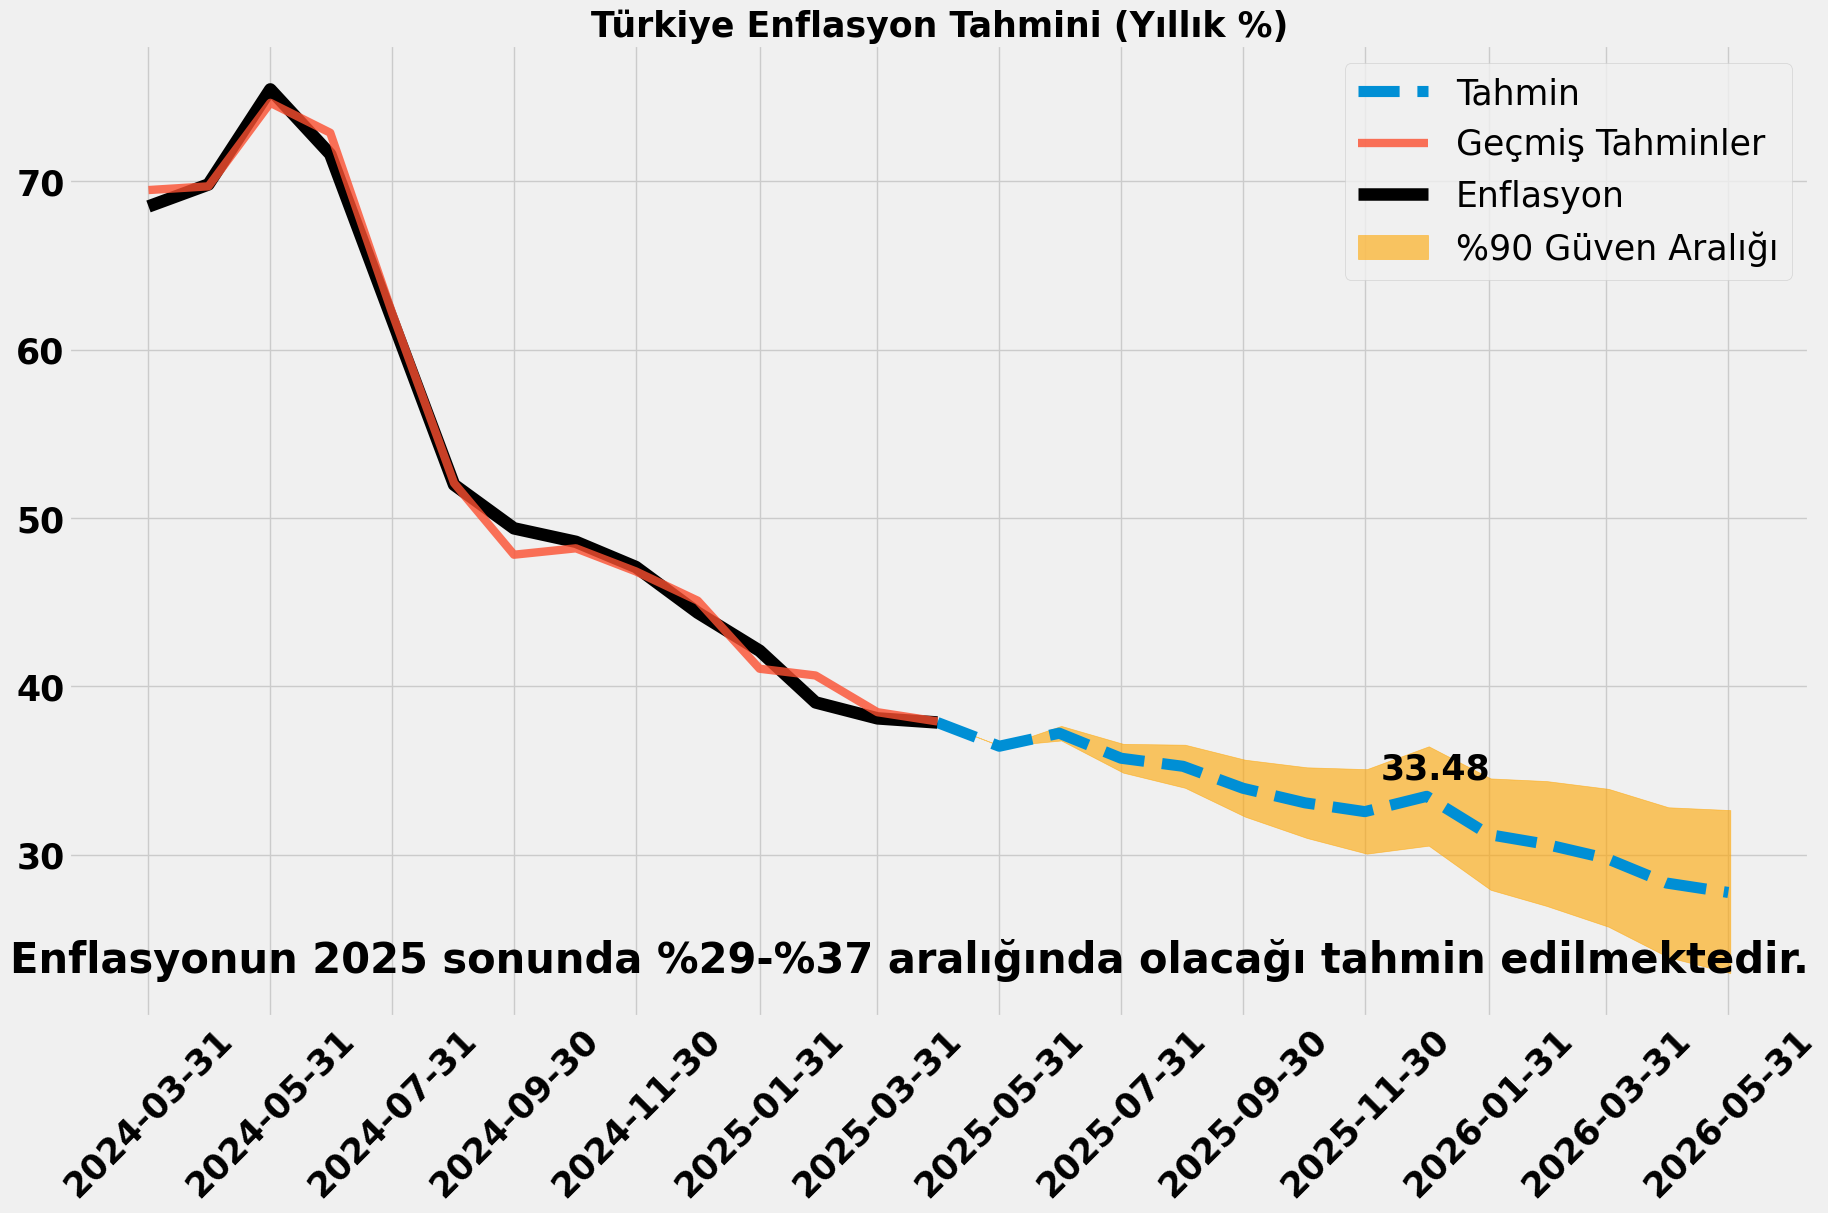

In [ ]:
import matplotlib.dates as mdates
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(20,12))
geçmiş=pd.DataFrame({"Tahmin":[61.94,60.84,62.13,64.71,65.06,65.73,69.47,69.69,74.65,72.87,62.17,52.07,47.82,48.20,46.83,45.09,41.05,40.65,38.47,37.92]})
geçmiş=geçmiş.set_index(pd.date_range(start="2023-09-30",periods=len(geçmiş),freq="M"))

plt.plot(dfas["Ortalama"].loc["2025-04-30":"2026-05-31"],'--',label="Tahmin",linewidth=8)
plt.plot(geçmiş["Tahmin"].loc["2024-03-31":"2025-04-30"],'-',label="Geçmiş Tahminler",linewidth=6,zorder=3,alpha=0.8)
plt.plot(dfas["Ortalama"].loc["2024-03-31":"2025-04-30"],label="Enflasyon",color="black",linewidth=9)
plt.fill_between(dfas.loc["2025-05-31":"2026-06-30"].index.strftime("%Y-%m"), dfas["Max"].loc["2025-04-30":"2026-05-31"], dfas["Min"].loc["2025-04-30":"2026-05-31"], alpha=0.6, color='orange',label="%90 Güven Aralığı")
annotation_date = mdates.datestr2num('2024-12')
#plt.text(mdates.datestr2num('2025-01'), float(sonu12024)+2, sonu12024, fontsize=18, color='black', horizontalalignment='right',fontweight='bold')

annotation_date = mdates.datestr2num('2025-04')
plt.text(mdates.datestr2num('2026-02-01'), float(sonu12025)+1, sonu12025, fontsize=25, color='black', horizontalalignment='right',fontweight='bold')

plt.text(annotation_date, 23, f"Enflasyonun 2025 sonunda %{min2025[:2]}-%{max2025[:2]} aralığında olacağı tahmin edilmektedir.", fontsize=30, color='black', horizontalalignment='center',fontweight='bold')

plt.xticks(dfas.loc["2024-03-31":"2026-05-31"].index[::2],rotation=45,fontsize=25,fontweight="bold")
plt.yticks(fontsize=25,fontweight="bold")
plt.title("Türkiye Enflasyon Tahmini (Yıllık %)",fontsize=25,fontweight="bold")
plt.legend(loc=0,fontsize=25)
plt.savefig('forecast.png', bbox_inches='tight')
plt.savefig("./forecasts/" + date.today().strftime("%d-%m-%Y") + '.png', bbox_inches='tight')
plt.show()

In [ ]:

aylık=pd.concat([data["TÜFE"][:-1],pred["Ortalama"]],axis=0)
aylık=pd.DataFrame(aylık)
aylık.columns=["Aylık"]
aylık["Max"]=pred["Max"]
aylık["Min"]=pred["Min"]
#predictions=predictions.set_index(aylık.loc["2024-11-30":"2026-04-30"].index)
aylık

,Aylık,Max,Min
2016-02-29,-0.021863,NaN,NaN
2016-03-31,-0.040090,NaN,NaN
2016-04-30,0.783899,NaN,NaN
2016-05-31,0.578829,NaN,NaN
2016-06-30,0.471189,NaN,NaN
...,...,...,...
2026-02-28,1.832215,2.154202,1.510229
2026-03-31,1.785217,2.107203,1.463230
2026-04-30,1.833220,2.155207,1.511233
2026-05-31,1.861020,2.183007,1.539034


In [ ]:
aylık.to_csv("C:/Users/Bora/Documents/GitHub/streamlit-inflation/aylık.csv")

In [ ]:
yıllıktahmin1=dfas


yıllıktahmin1.to_csv('C:/Users/Bora/Documents/GitHub/streamlit-inflation/yıllıktahmin.csv')

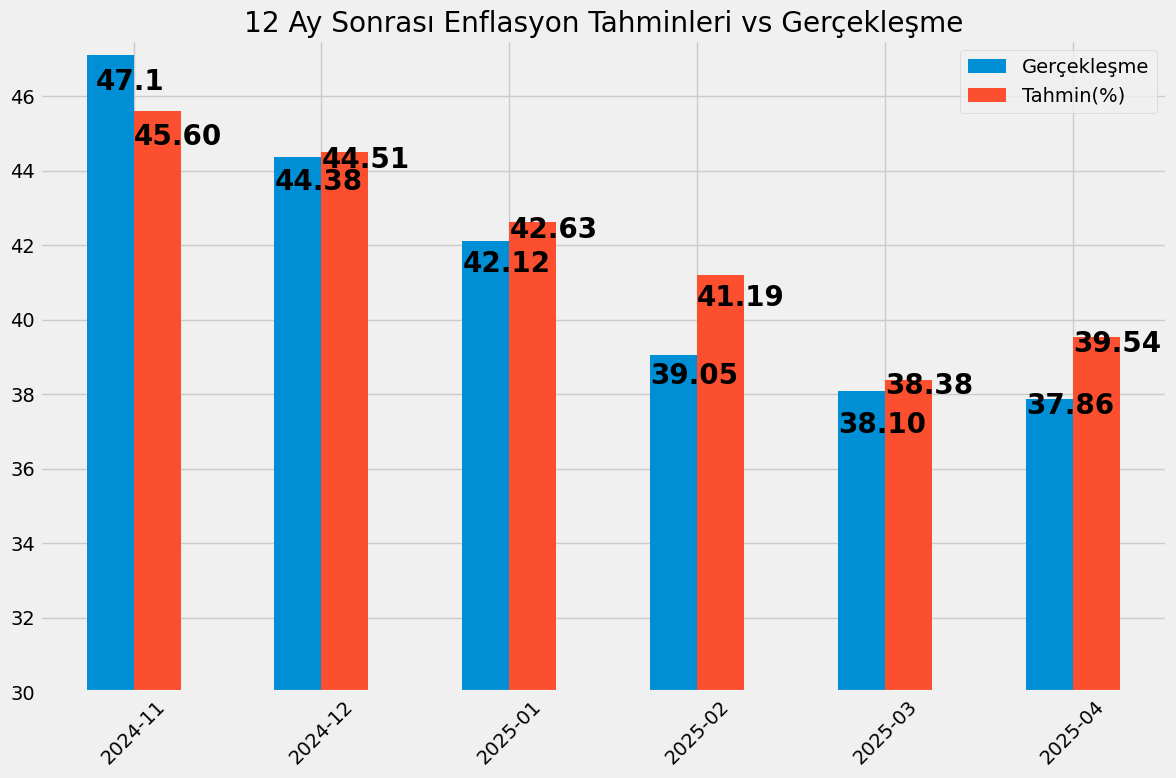

In [ ]:
import matplotlib.axes as ax
sonra12tahmin=pd.DataFrame({"Gerçekleşme":[47.1,44.38,42.12,39.05,38.1,37.86],"Tahmin(%)":[45.6,44.51,42.63,41.19,38.38,39.54]})
sonra12tahmin=sonra12tahmin.set_index(pd.date_range(start="2024-11-30",periods=len(sonra12tahmin),freq="M"))
sonra12tahmin=sonra12tahmin.set_index(sonra12tahmin.index.strftime("%Y-%m"))
sonra12tahmin.plot(kind="bar",figsize=(12,8),title="12 Ay Sonrası Enflasyon Tahminleri vs Gerçekleşme")
plt.annotate("47.1",xy=(-0.2,sonra12tahmin.iloc[0,0]*0.98),fontweight="bold",fontsize=20)
plt.annotate("45.60",xy=(0,sonra12tahmin.iloc[0,1]*0.98),fontweight="bold",fontsize=20)
plt.annotate("44.38",xy=(0.75,sonra12tahmin.iloc[1,0]*0.98),fontweight="bold",fontsize=20)
plt.annotate("44.51",xy=(1,sonra12tahmin.iloc[1,1]*0.99),fontweight="bold",fontsize=20)
plt.annotate("42.12",xy=(1.75,sonra12tahmin.iloc[2,0]*0.98),fontweight="bold",fontsize=20)
plt.annotate("42.63",xy=(2,sonra12tahmin.iloc[2,1]*0.99),fontweight="bold",fontsize=20)
plt.annotate("39.05",xy=(2.75,sonra12tahmin.iloc[3,0]*0.98),fontweight="bold",fontsize=20)
plt.annotate("41.19",xy=(3,sonra12tahmin.iloc[3,1]*0.98),fontweight="bold",fontsize=20)
plt.annotate("38.10",xy=(3.75,sonra12tahmin.iloc[4,0]*0.97),fontweight="bold",fontsize=20)
plt.annotate("38.38",xy=(4,sonra12tahmin.iloc[4,1]*0.99),fontweight="bold",fontsize=20)
plt.annotate("37.86",xy=(4.75,sonra12tahmin.iloc[5,0]*0.99),fontweight="bold",fontsize=20)
plt.annotate("39.54",xy=(5,sonra12tahmin.iloc[5,1]*0.99),fontweight="bold",fontsize=20)
plt.xticks(rotation=45)
plt.legend(loc=1)
plt.ylim(30,47.5)
plt.tight_layout()
plt.savefig('gecmis5.png', bbox_inches='tight')


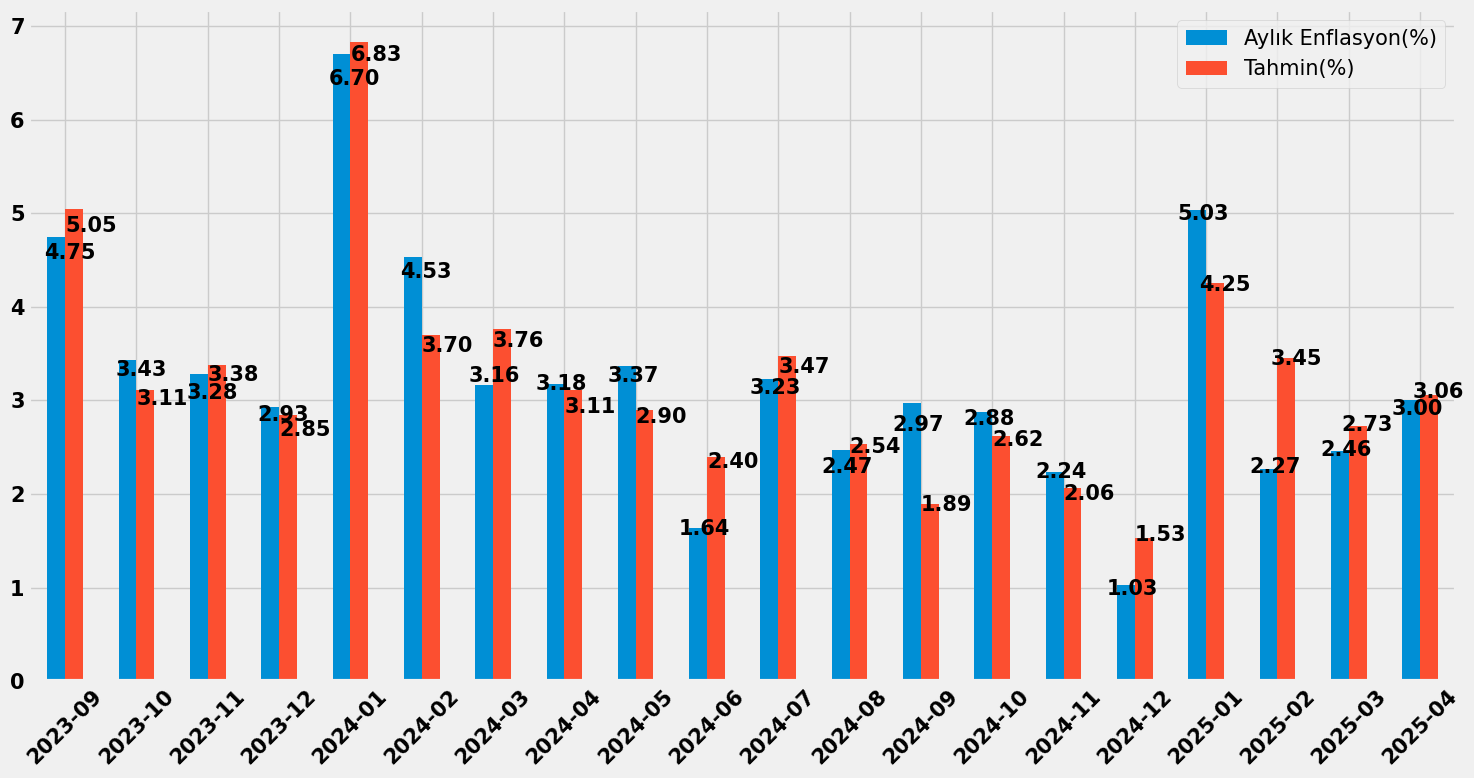

In [ ]:
import matplotlib.axes as ax
gecmis=pd.DataFrame({"Aylık Enflasyon(%)":[4.75,3.43,3.28,2.93,6.70,4.53,3.16,3.18,3.37,1.64,3.23,2.47,2.97,2.88,2.24,1.03,5.03,2.27,2.46,3.0],"Tahmin(%)":[5.05,3.11,3.38,2.85,6.83,3.70,3.76,3.11,2.90,2.40,3.47,2.54,1.89,2.62,2.06,1.53,4.25,3.45,2.73,3.06]})
gecmis=gecmis.set_index(pd.date_range(start="2023-09-30",periods=len(gecmis),freq="M"))
gecmis=gecmis.set_index(gecmis.index.strftime("%Y-%m"))
gecmis.plot(kind="bar",figsize=(15,8))
plt.annotate("4.75",xy=(-0.3,gecmis.iloc[0,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("5.05",xy=(0,gecmis.iloc[0,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.43",xy=(0.7,gecmis.iloc[1,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.11",xy=(1,gecmis.iloc[1,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.28",xy=(1.7,gecmis.iloc[2,0]*0.92),fontweight="bold",fontsize=15)
plt.annotate("3.38",xy=(2,gecmis.iloc[2,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("2.93",xy=(2.7,gecmis.iloc[3,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("2.85",xy=(3,gecmis.iloc[3,1]*0.92),fontweight="bold",fontsize=15)
plt.annotate("6.70",xy=(3.7,gecmis.iloc[4,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("6.83",xy=(4,gecmis.iloc[4,1]*0.97),fontweight="bold",fontsize=15)
plt.annotate("4.53",xy=(4.7,gecmis.iloc[5,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.70",xy=(5,gecmis.iloc[5,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.16",xy=(5.65,gecmis.iloc[6,1]*0.85),fontweight="bold",fontsize=15)
plt.annotate("3.76",xy=(6,gecmis.iloc[6,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.18",xy=(6.6,gecmis.iloc[7,0]*0.98),fontweight="bold",fontsize=15)
plt.annotate("3.11",xy=(7,gecmis.iloc[7,1]*0.92),fontweight="bold",fontsize=15)
plt.annotate("3.37",xy=(7.6,gecmis.iloc[8,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("2.90",xy=(8,gecmis.iloc[8,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("1.64",xy=(8.6,gecmis.iloc[9,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("2.40",xy=(9,gecmis.iloc[9,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.23",xy=(9.6,gecmis.iloc[10,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.47",xy=(10,gecmis.iloc[10,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("2.47",xy=(10.6,gecmis.iloc[11,0]*0.90),fontweight="bold",fontsize=15)
plt.annotate("2.54",xy=(11,gecmis.iloc[11,1]*0.96),fontweight="bold",fontsize=15)
plt.annotate("2.97",xy=(11.6,gecmis.iloc[12,0]*0.90),fontweight="bold",fontsize=15)
plt.annotate("1.89",xy=(12,gecmis.iloc[12,1]*0.96),fontweight="bold",fontsize=15)
plt.annotate("2.88",xy=(12.6,gecmis.iloc[13,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("2.62",xy=(13,gecmis.iloc[13,1]*0.96),fontweight="bold",fontsize=15)
plt.annotate("2.24",xy=(13.6,gecmis.iloc[14,0]*0.97),fontweight="bold",fontsize=15)
plt.annotate("2.06",xy=(14,gecmis.iloc[14,1]*0.94),fontweight="bold",fontsize=15)
plt.annotate("1.03",xy=(14.6,gecmis.iloc[15,0]*0.9),fontweight="bold",fontsize=15)
plt.annotate("1.53",xy=(15,gecmis.iloc[15,1]*0.98),fontweight="bold",fontsize=15)
plt.annotate("5.03",xy=(15.6,gecmis.iloc[16,0]*0.98),fontweight="bold",fontsize=15)
plt.annotate("4.25",xy=(15.9,gecmis.iloc[16,1]*0.98),fontweight="bold",fontsize=15)
plt.annotate("2.27",xy=(16.6,gecmis.iloc[17,0]*0.98),fontweight="bold",fontsize=15)
plt.annotate("3.45",xy=(16.9,gecmis.iloc[17,1]*0.98),fontweight="bold",fontsize=15)
plt.annotate("2.46",xy=(17.6,gecmis.iloc[18,0]*0.98),fontweight="bold",fontsize=15)
plt.annotate("2.73",xy=(17.9,gecmis.iloc[18,1]*0.98),fontweight="bold",fontsize=15)
plt.annotate("3.00",xy=(18.6,gecmis.iloc[19,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.06",xy=(18.9,gecmis.iloc[19,1]*0.99),fontweight="bold",fontsize=15)
plt.legend(fontsize=15)
plt.xticks(rotation=45,fontweight="bold",fontsize=15,color="black")
plt.yticks(fontweight="bold",fontsize=15,color="black")
plt.tight_layout()
plt.savefig('gecmis.png', bbox_inches='tight')

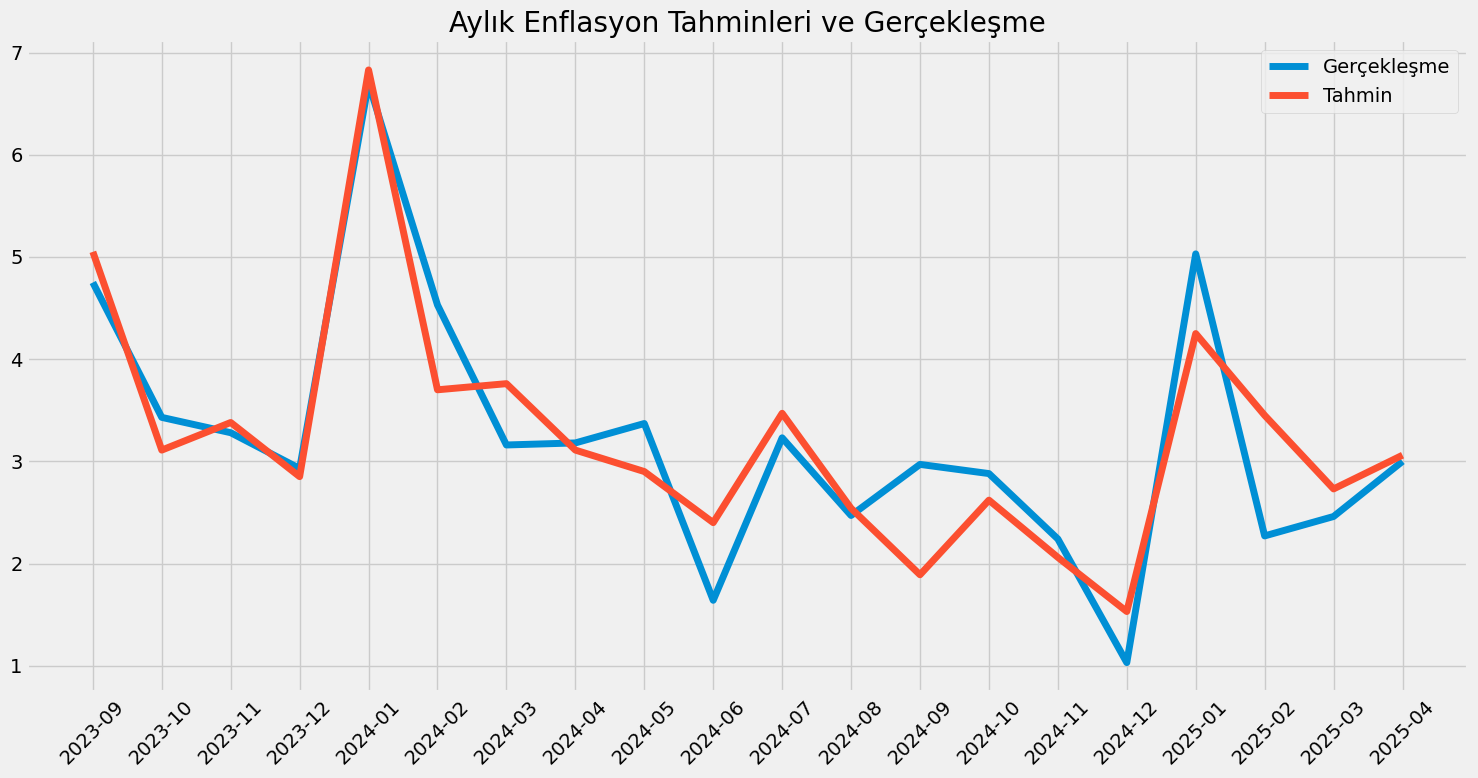

In [ ]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,8))
plt.title("Aylık Enflasyon Tahminleri ve Gerçekleşme")
plt.plot(gecmis["Aylık Enflasyon(%)"],label="Gerçekleşme",linewidth=5)
plt.plot(gecmis["Tahmin(%)"],label="Tahmin",linewidth=5)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('gecmis2.png', bbox_inches='tight')

In [ ]:
yıllık=enf["TÜFE"].pct_change(12).dropna()*100

In [ ]:
geçmiş_yıllık=pd.DataFrame({"Tahmin":[61.94,60.84,62.13,64.71,65.06,65.73,69.47,69.69,74.65,72.87,62.17,52.07,47.82,48.20,46.83,45.09,41.05,40.65,38.47]})
geçmiş_yıllık["Gerçekleşme"]=yıllık.loc["2023-09":].values
geçmiş_yıllık=geçmiş_yıllık.set_index(pd.date_range(start="2023-09-30",periods=len(geçmiş_yıllık),freq="M"))
geçmiş_yıllık=np.round(geçmiş_yıllık,2)
geçmiş_yıllık=geçmiş_yıllık.set_index(geçmiş_yıllık.index.strftime("%Y-%m"))


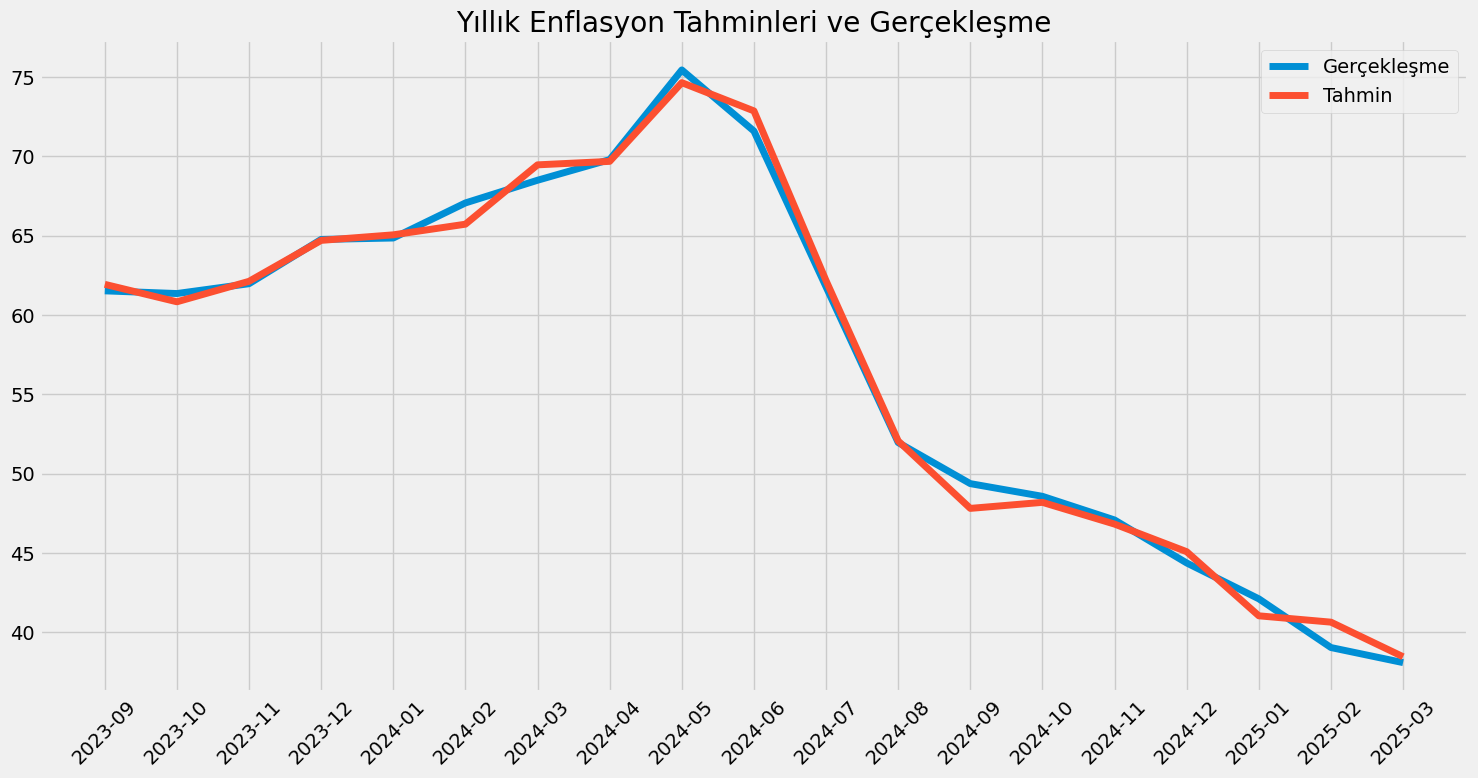

In [ ]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,8))
plt.title("Yıllık Enflasyon Tahminleri ve Gerçekleşme")
plt.plot(geçmiş_yıllık["Gerçekleşme"],label="Gerçekleşme",linewidth=5)
plt.plot(geçmiş_yıllık["Tahmin"],label="Tahmin",linewidth=5)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('gecmis4.png', bbox_inches='tight')

In [ ]:
aylık.index=aylık.index.strftime("%Y-%m")

In [ ]:
aylık.loc["2025-02":"2026-03"]

,Aylık,Max,Min
2025-02,2.273332,NaN,NaN
2025-03,2.459991,NaN,NaN
2025-04,2.996592,NaN,NaN
2025-05,2.311450,2.311450,2.311449
2025-06,2.217526,2.539513,1.895539
2025-07,2.105871,2.427858,1.783884
2025-08,2.112901,2.434888,1.790914
2025-09,1.974838,2.296825,1.652851
2025-10,2.215326,2.537313,1.893339
2025-11,1.839438,2.161425,1.517451


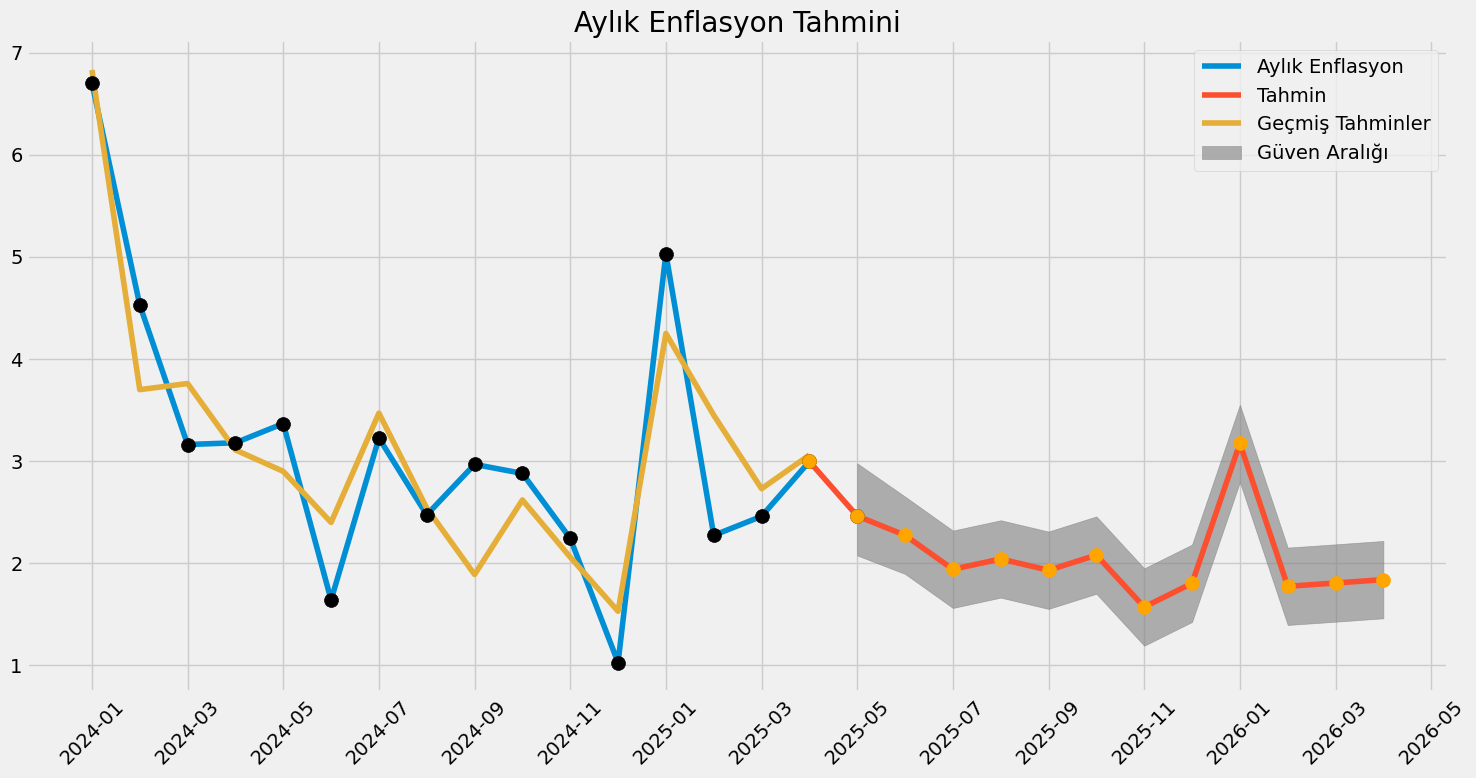

In [ ]:
plt.figure(figsize=(15,8))
plt.title("Aylık Enflasyon Tahmini")
plt.plot(aylık["Aylık"].loc["2024-01":"2025-04"],label="Aylık Enflasyon")
plt.plot(aylık["Aylık"].loc["2025-04":"2026-04"],label="Tahmin")
plt.plot(gecmis["Tahmin(%)"].loc["2024-01":"2025-05"],label="Geçmiş Tahminler")
plt.scatter(x=aylık.loc["2024-01":"2025-05"].index,y=aylık["Aylık"].loc["2024-01":"2025-05"],color="black",s=100,zorder=3)
plt.scatter(x=aylık["Aylık"].loc["2025-04":"2026-04"].index,y=aylık["Aylık"].loc["2025-04":"2026-04"],color="orange",s=100,zorder=3)
plt.fill_between(aylık.loc["2025-03":"2026-04"].index, aylık["Max"].loc["2025-04":"2026-05"].shift(1), aylık["Min"].loc["2025-04":"2026-05"].shift(1), alpha=0.6, color='gray',label="Güven Aralığı")

plt.xticks(aylık.loc["2024-01":].index[:-1:2],rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig("./monthlyCIforecasts/" + date.today().strftime("%d-%m-%Y") + '.png', bbox_inches='tight')
plt.show()

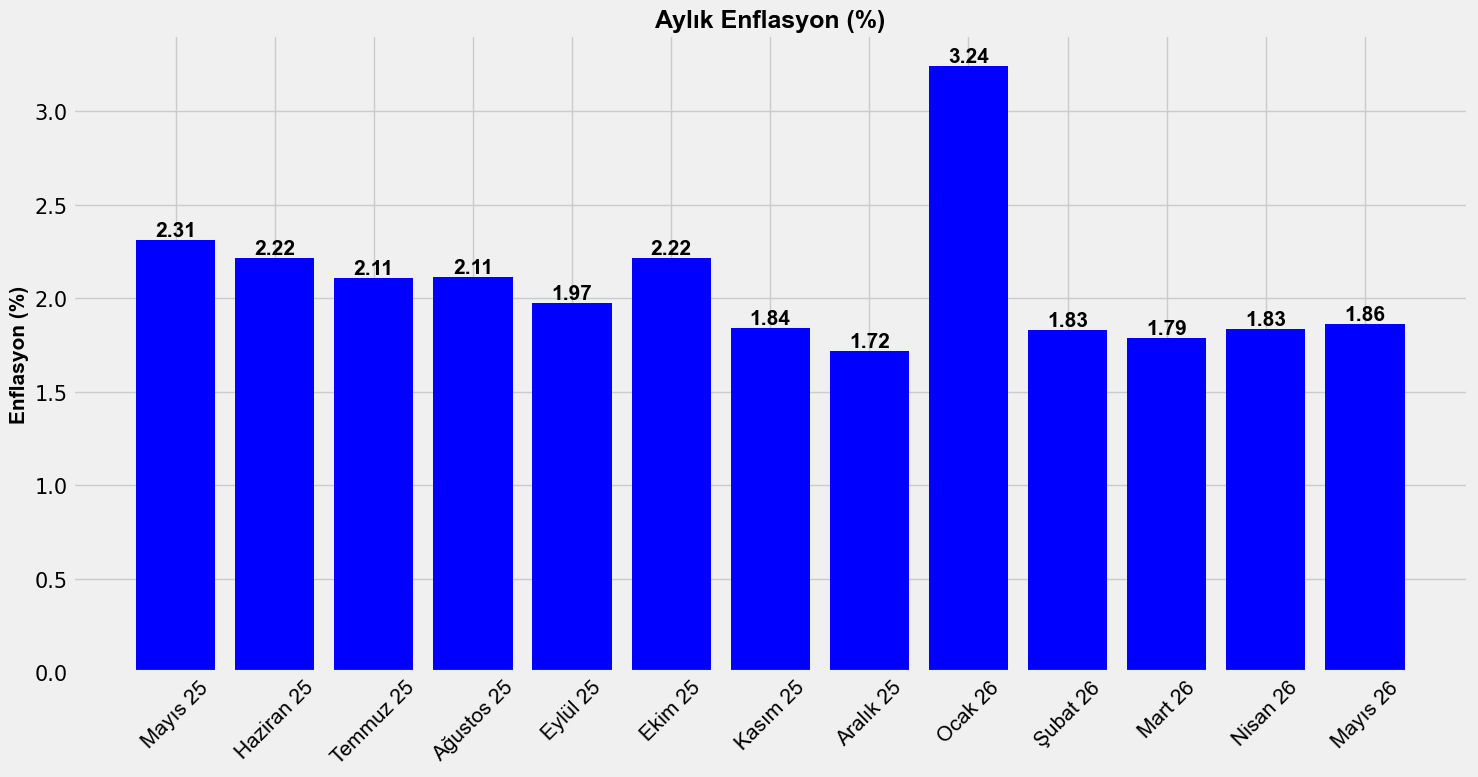

In [ ]:

turkish_months = ["Mayıs 25", "Haziran 25", "Temmuz 25", "Ağustos 25",
    "Eylül 25", "Ekim 25", "Kasım 25", "Aralık 25","Ocak 26","Şubat 26","Mart 26","Nisan 26","Mayıs 26"
]

# Çubuk grafiği oluşturma
fig, ax = plt.subplots(figsize=(15, 8))
bars = ax.bar(
    turkish_months,
    aylık["Aylık"].loc["2025-05":"2026-05"],
    color='blue'
)

# Barların üstüne değerleri yazma
for bar, value in zip(bars, aylık["Aylık"].loc["2025-05":"2026-05"]):
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X pozisyonu (barın ortası)
        bar.get_height(),  # Y pozisyonu (barın yüksekliği)
        f'{value:.2f}',  # Yazılacak metin (2 ondalık basamak)
        ha='center',  # Metni ortala
        va='bottom',  # Barın üst kısmına yerleştir
        fontsize=15,
        fontweight='bold',
        color='black',
        family="Arial"
    )

# X ekseni ayarları
ax.set_xticks(np.arange(len(turkish_months)))
ax.set_xticklabels(turkish_months, rotation=45, fontsize=15, color="black", fontfamily="Arial")

# Y ekseni ayarları
ax.set_ylabel("Enflasyon (%)", fontsize=15, fontweight='bold', color="black", fontfamily="Arial")
ax.tick_params(axis='y', labelsize=15, labelcolor='black')

# Başlık
ax.set_title("Aylık Enflasyon (%)", fontsize=18, fontweight='bold', color="black", fontfamily="Arial")

# Grafik düzenlemesi
plt.tight_layout()
plt.savefig("./monthlyforecasts/" + date.today().strftime("%d-%m-%Y") + '.png', bbox_inches='tight')
plt.show()

In [ ]:
import pandas as pd
from datetime import datetime

# CSV dosyasını oku
csv_file = "C:/Users/Bora/Documents/GitHub/streamlit-inflation/cariay.csv"
df = pd.read_csv(csv_file, index_col=0)

# Bugünün tarihini "dd-mm-yyyy" formatında al
today_date = datetime.today().strftime("%Y-%m-%d")

# Yeni tahmin değeri
new_tahmin = kısatahminler["Ensemble"].iloc[-1]

try:
    df.loc[today_date] = new_tahmin
except:
    pass
df=df.loc["2025-05-01":]
df.to_csv(csv_file)

print(f"{today_date} tarihli tahmin başarıyla eklendi.")


2025-05-08 tarihli tahmin başarıyla eklendi.


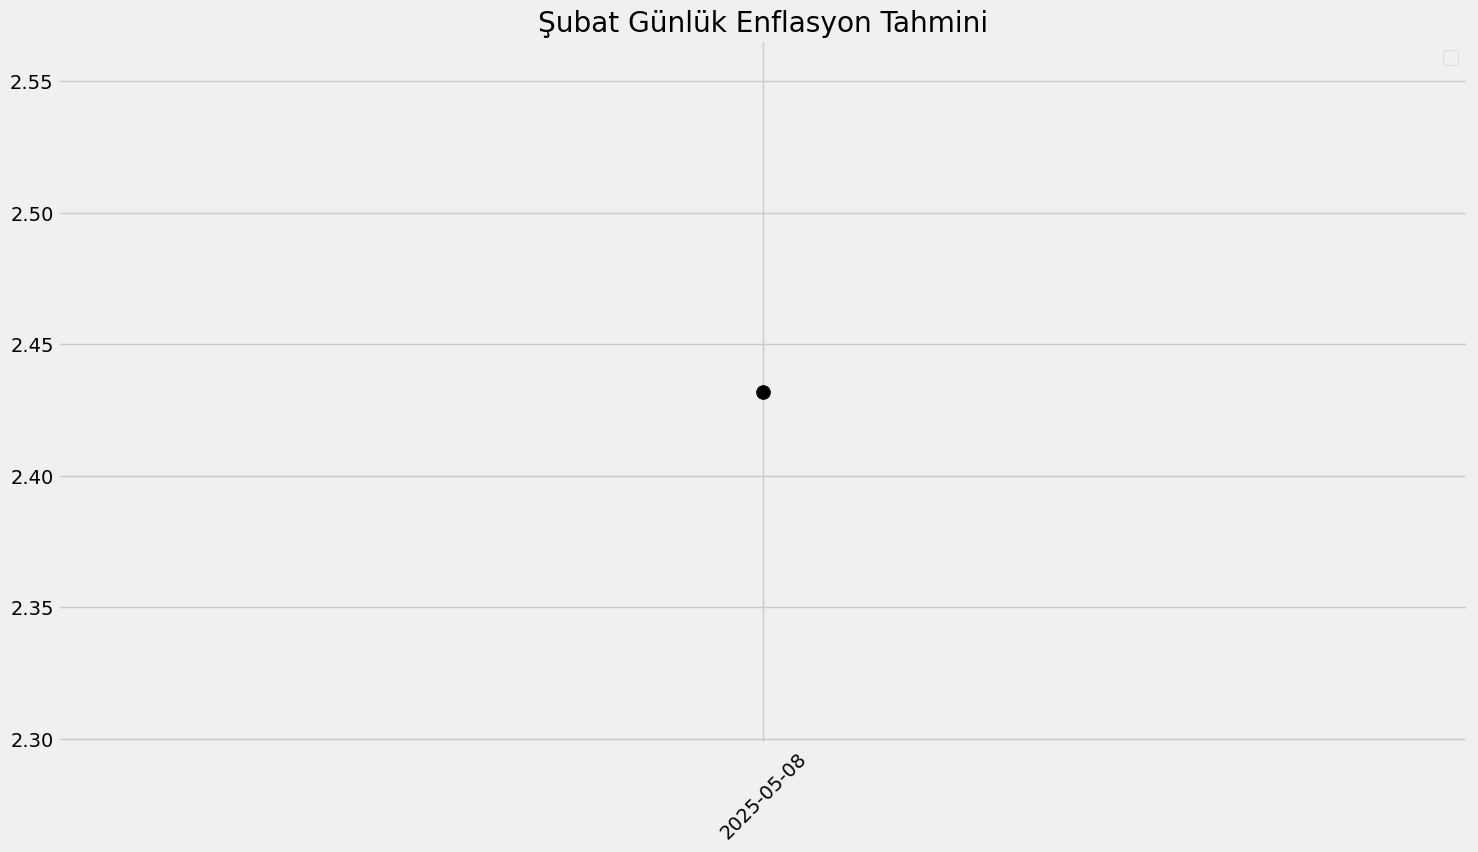

In [ ]:
import matplotlib.pyplot as plt
from datetime import date
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,8))
plt.title("Şubat Günlük Enflasyon Tahmini")
plt.plot(df)
plt.scatter(x=df.index,y=df["Tahmin"],color="black",s=100,zorder=3)
plt.legend()
plt.tight_layout()
plt.xticks(df.index,rotation=45)
plt.savefig("./dailyforecasts/" + date.today().strftime("%d-%m-%Y") + '.png', bbox_inches='tight')

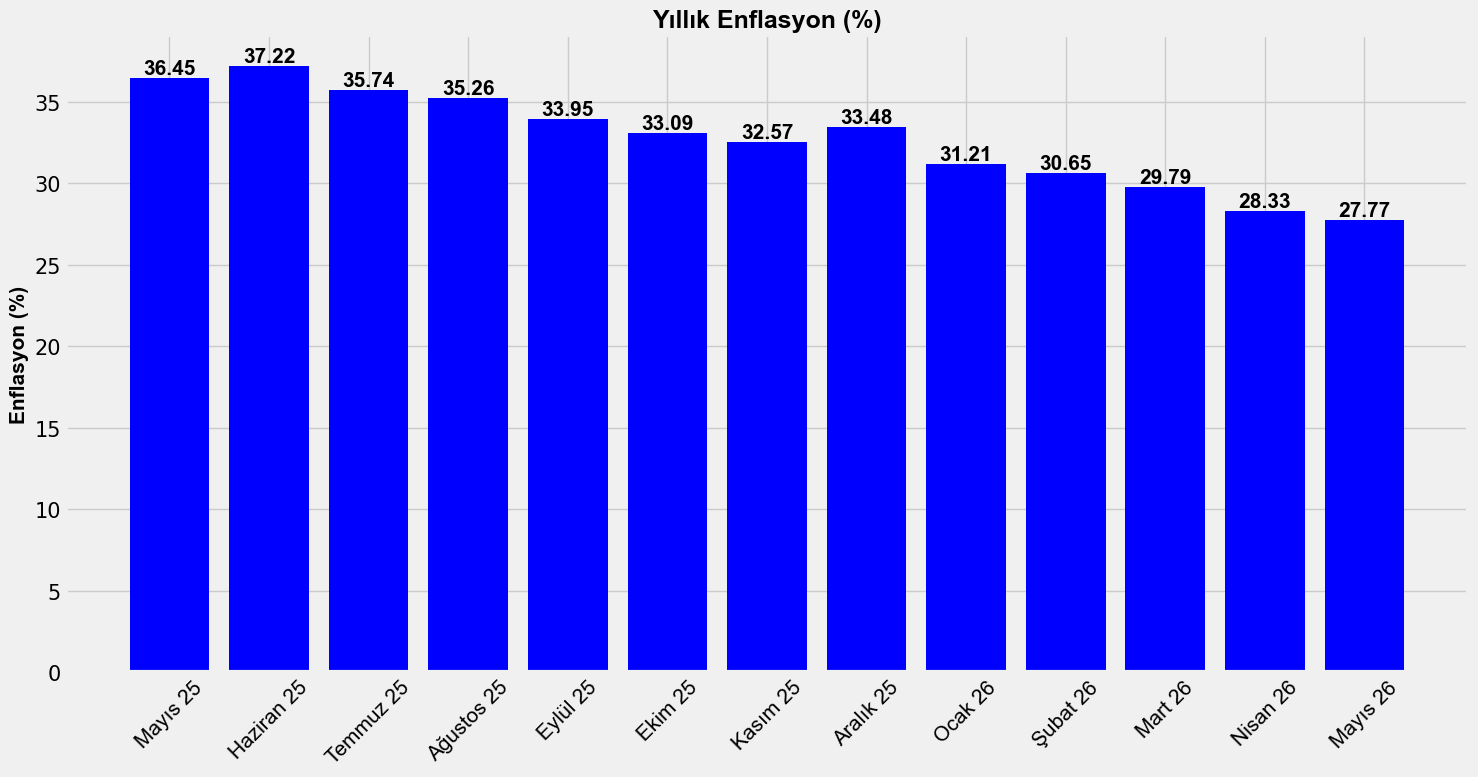

In [ ]:

turkish_months = ["Mayıs 25", "Haziran 25", "Temmuz 25", "Ağustos 25",
    "Eylül 25", "Ekim 25", "Kasım 25", "Aralık 25","Ocak 26","Şubat 26","Mart 26","Nisan 26","Mayıs 26"
]

# Çubuk grafiği oluşturma
fig, ax = plt.subplots(figsize=(15, 8))
bars = ax.bar(
    turkish_months,
    yıllıktahmin1["Ortalama"].loc["2025-05":"2026-05"],
    color='blue'
)

# Barların üstüne değerleri yazma
for bar, value in zip(bars, yıllıktahmin1["Ortalama"].loc["2025-05":"2026-05"]):
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X pozisyonu (barın ortası)
        bar.get_height(),  # Y pozisyonu (barın yüksekliği)
        f'{value:.2f}',  # Yazılacak metin (2 ondalık basamak)
        ha='center',  # Metni ortala
        va='bottom',  # Barın üst kısmına yerleştir
        fontsize=15,
        fontweight='bold',
        color='black',
        family="Arial"
    )

# X ekseni ayarları
ax.set_xticks(np.arange(len(turkish_months)))
ax.set_xticklabels(turkish_months, rotation=45, fontsize=15, color="black", fontfamily="Arial")

# Y ekseni ayarları
ax.set_ylabel("Enflasyon (%)", fontsize=15, fontweight='bold', color="black", fontfamily="Arial")
ax.tick_params(axis='y', labelsize=15, labelcolor='black')

# Başlık
ax.set_title("Yıllık Enflasyon (%)", fontsize=18, fontweight='bold', color="black", fontfamily="Arial")

# Grafik düzenlemesi
plt.tight_layout()
plt.savefig('forecast.png', bbox_inches='tight')
plt.savefig("./yearlyforecasts/" + date.today().strftime("%d-%m-%Y") + '.png', bbox_inches='tight')
plt.show()

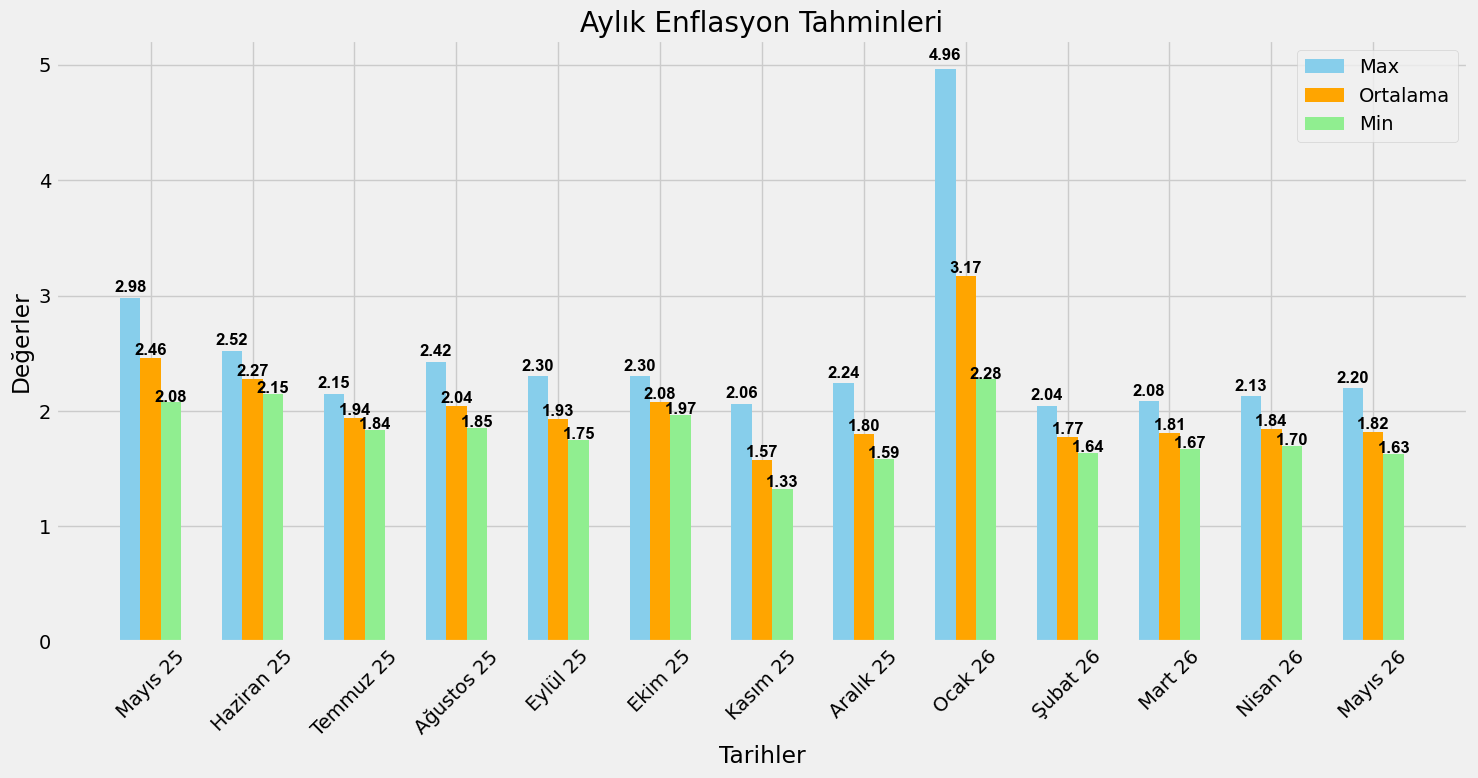

In [ ]:
pred1=aylık["2025-05":"2026-05"]
turkish_months = [ "Mayıs 25", "Haziran 25", "Temmuz 25", "Ağustos 25",
    "Eylül 25", "Ekim 25", "Kasım 25", "Aralık 25","Ocak 26","Şubat 26","Mart 26","Nisan 26","Mayıs 26"
]
x = np.arange(len(pred1))
bar_width = 0.2
xticks_labels = turkish_months
# Grafik oluşturma
plt.figure(figsize=(15, 8))
bars_max = plt.bar(x - bar_width, pred1["Max"], width=bar_width, label="Max", color="skyblue")
bars_avg = plt.bar(x, pred1["Aylık"], width=bar_width, label="Ortalama", color="orange")
bars_min = plt.bar(x + bar_width, pred1["Min"], width=bar_width, label="Min", color="lightgreen")

# Barların üzerine değerlerini ekleme
for bar in bars_max:
    plt.text(bar.get_x() + bar.get_width() / 2, 1.01*bar.get_height(), f'{bar.get_height():.2f}', 
             ha='center', va='bottom', fontsize=12,
        fontweight='bold',
        color='black',
        family="Arial")
for bar in bars_avg:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}', 
             ha='center', va='bottom', fontsize=12,
        fontweight='bold',
        color='black',
        family="Arial")
for bar in bars_min:
    plt.text(bar.get_x() + bar.get_width() / 2, 0.99*bar.get_height(), f'{bar.get_height():.2f}', 
             ha='center', va='bottom', fontsize=12,
        fontweight='bold',
        color='black',
        family="Arial")

# Etiketler ve başlık
plt.xlabel("Tarihler")
plt.ylabel("Değerler")
plt.title("Aylık Enflasyon Tahminleri")
plt.xticks(x, xticks_labels, rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('forecast.png', bbox_inches='tight')
plt.savefig("./monthlynewforecast/" + date.today().strftime("%d-%m-%Y") + '.png', bbox_inches='tight')
plt.show()

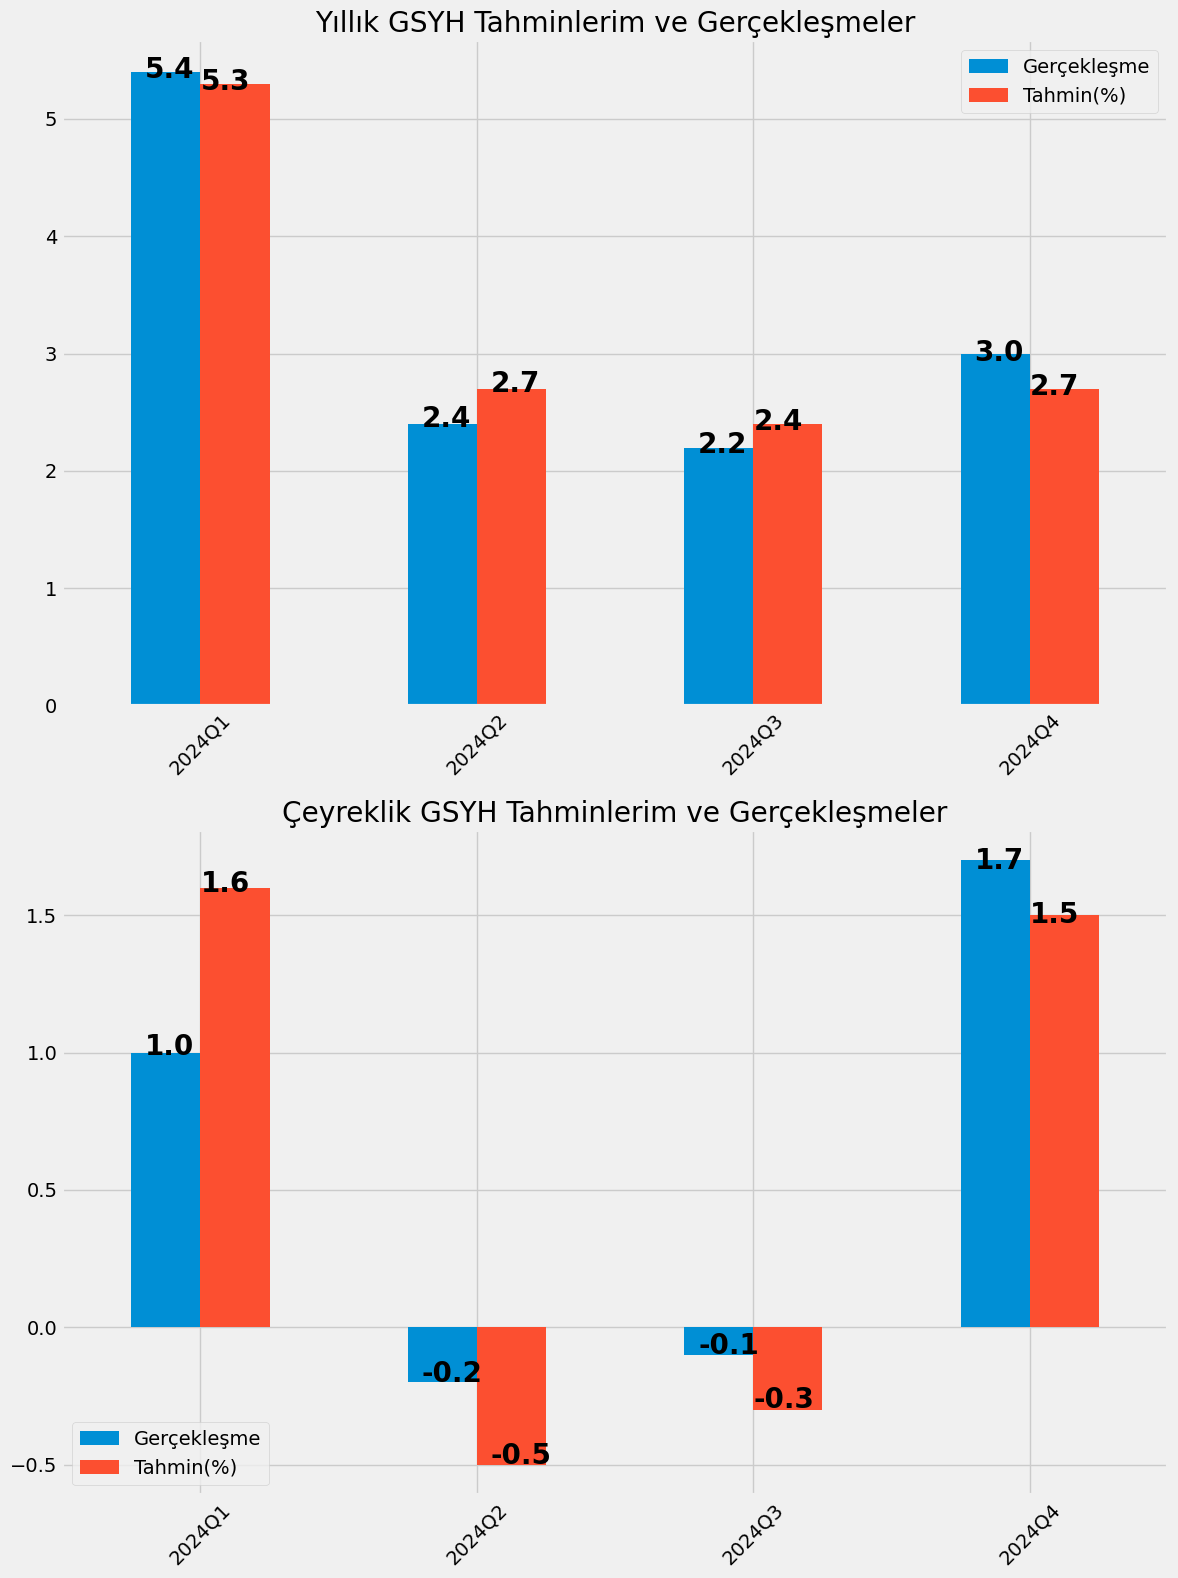

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Yıllık veri
gsyh = pd.DataFrame({"Gerçekleşme": [5.4, 2.4, 2.2, 3.0], "Tahmin(%)": [5.3, 2.7, 2.4, 2.7]})
gsyh = gsyh.set_index(pd.date_range(start="2024-03-31", periods=len(gsyh), freq="Q"))

# Çeyreklik veri
çeyreklik = pd.DataFrame({"Gerçekleşme": [1.0, -0.2, -0.1, 1.7], "Tahmin(%)": [1.6, -0.5, -0.3, 1.5]})
çeyreklik = çeyreklik.set_index(pd.date_range(start="2024-03-31", periods=len(çeyreklik), freq="Q"))

# Çeyrek dönemi hesaplayan fonksiyon
def tarih_ceyrek(tarih):
    yil = tarih.year
    ay = tarih.month
    if ay <= 3:
        return f"{yil}Q1"
    elif ay <= 6:
        return f"{yil}Q2"
    elif ay <= 9:
        return f"{yil}Q3"
    else:
        return f"{yil}Q4"

# Grafik hazırlığı
fig, ax = plt.subplots(2, 1, figsize=(12, 16))

# Yıllık veri grafiği
gsyh.plot(kind="bar", ax=ax[0], title="Yıllık GSYH Tahminlerim ve Gerçekleşmeler")
ax[0].annotate("5.4", xy=(-0.2, gsyh.iloc[0, 0] * 0.99), fontweight="bold", fontsize=20)
ax[0].annotate("5.3", xy=(0, gsyh.iloc[0, 1] * 0.99), fontweight="bold", fontsize=20)
ax[0].annotate("2.4", xy=(0.8, gsyh.iloc[1, 0] * 0.99), fontweight="bold", fontsize=20)
ax[0].annotate("2.7", xy=(1.05, gsyh.iloc[1, 1] * 0.99), fontweight="bold", fontsize=20)
ax[0].annotate("2.2", xy=(1.8, gsyh.iloc[2, 0] * 0.98), fontweight="bold", fontsize=20)
ax[0].annotate("2.4", xy=(2, gsyh.iloc[2, 1] * 0.98), fontweight="bold", fontsize=20)
ax[0].annotate("3.0", xy=(2.8, gsyh.iloc[3, 0] * 0.98), fontweight="bold", fontsize=20)
ax[0].annotate("2.7", xy=(3, gsyh.iloc[3, 1] * 0.98), fontweight="bold", fontsize=20)

# Çeyreklik veri grafiği
çeyreklik.plot(kind="bar", ax=ax[1], title="Çeyreklik GSYH Tahminlerim ve Gerçekleşmeler")
ax[1].annotate("1.0", xy=(-0.2, çeyreklik.iloc[0, 0] * 0.99), fontweight="bold", fontsize=20)
ax[1].annotate("1.6", xy=(0, çeyreklik.iloc[0, 1] * 0.99), fontweight="bold", fontsize=20)
ax[1].annotate("-0.2", xy=(0.8, çeyreklik.iloc[1, 0] * 0.99), fontweight="bold", fontsize=20)
ax[1].annotate("-0.5", xy=(1.05, çeyreklik.iloc[1, 1] * 0.99), fontweight="bold", fontsize=20)
ax[1].annotate("-0.1", xy=(1.8, çeyreklik.iloc[2, 0] * 0.98), fontweight="bold", fontsize=20)
ax[1].annotate("-0.3", xy=(2, çeyreklik.iloc[2, 1] * 0.98), fontweight="bold", fontsize=20)
ax[1].annotate("1.7", xy=(2.8, çeyreklik.iloc[3, 0] * 0.98), fontweight="bold", fontsize=20)
ax[1].annotate("1.5", xy=(3, çeyreklik.iloc[3, 1] * 0.98), fontweight="bold", fontsize=20)

# X eksenindeki etiketleri ayarlama
tarihler_gsyh = [tarih_ceyrek(t) for t in gsyh.index]
tarihler_çeyreklik = [tarih_ceyrek(t) for t in çeyreklik.index]

ax[0].set_xticks(range(len(gsyh)))
ax[0].set_xticklabels(tarihler_gsyh, rotation=45)
ax[1].set_xticks(range(len(çeyreklik)))
ax[1].set_xticklabels(tarihler_çeyreklik, rotation=45)

# Düzenlemeler
plt.tight_layout()
plt.show()


In [ ]:
aylık["Max"]=aylık["Max"].fillna(aylık["Aylık"])
aylık["Min"]=aylık["Min"].fillna(aylık["Aylık"])

KeyError: '2025-03-31'

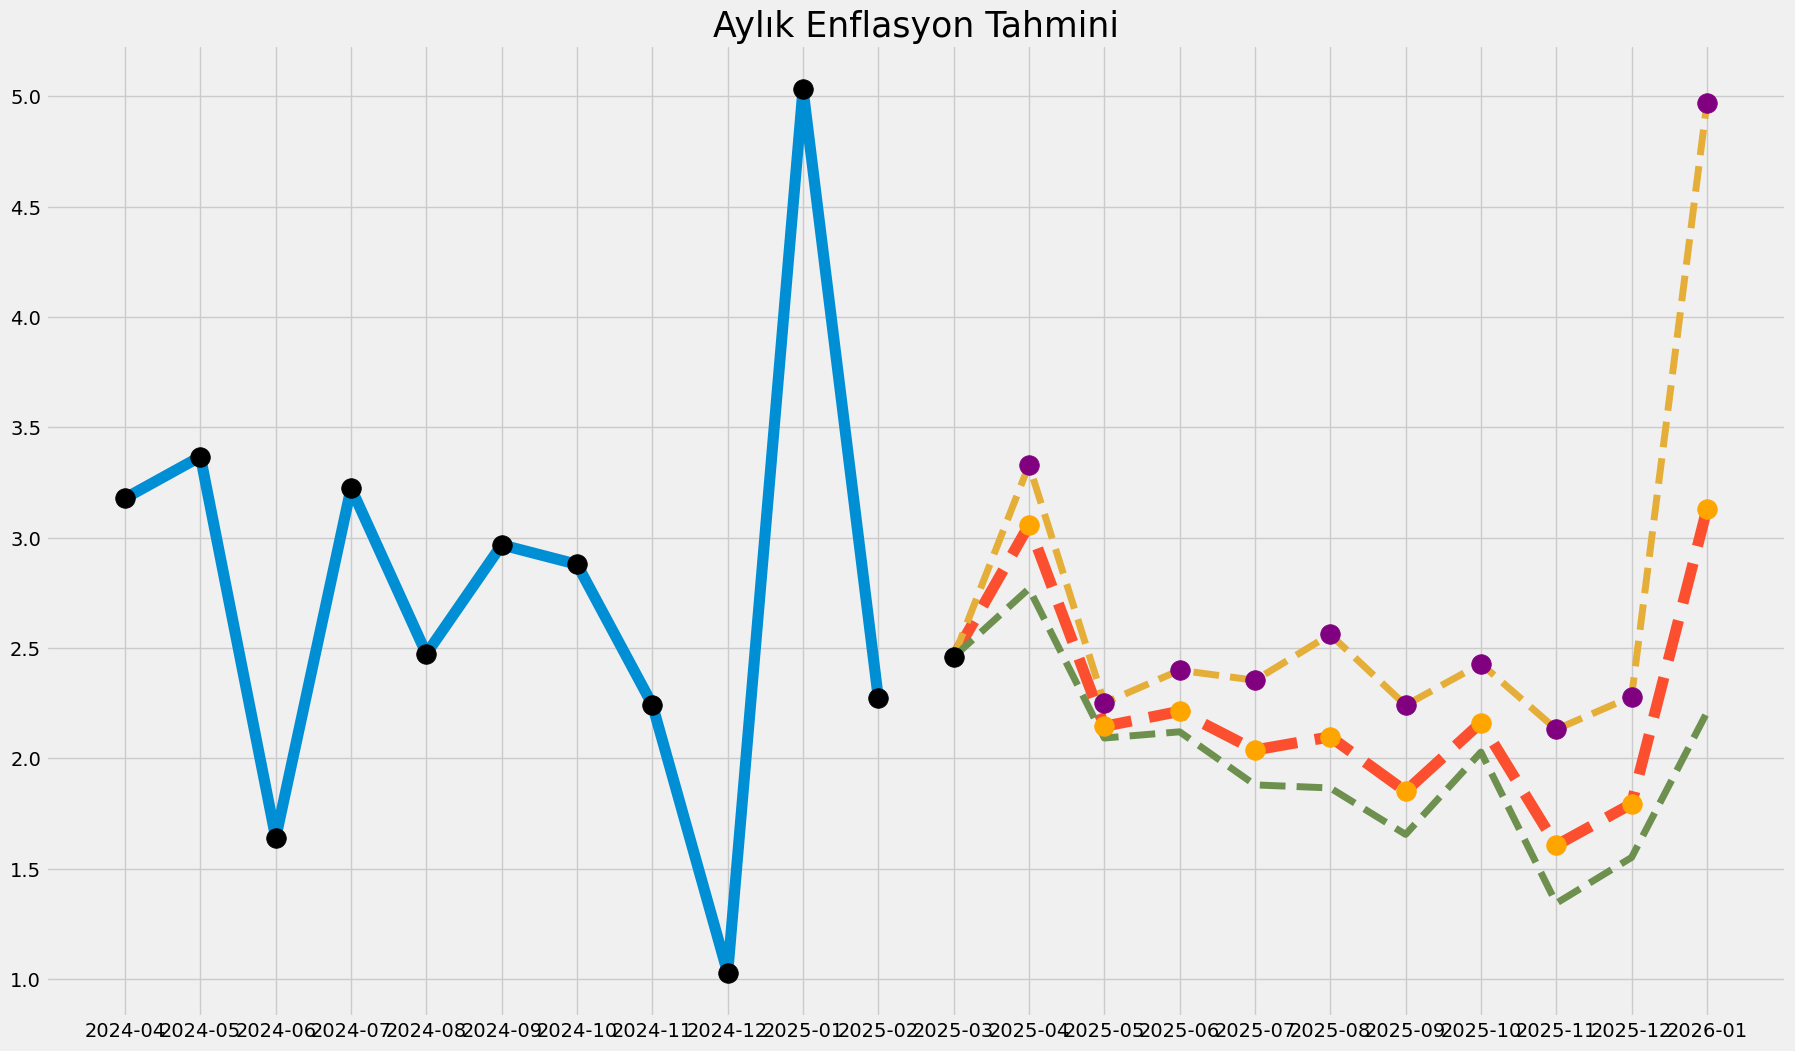

In [ ]:
plt.figure(figsize=(20,12))
plt.title("Aylık Enflasyon Tahmini",fontsize=25)
plt.plot(aylık["Aylık"].loc["2024-03-31":"2025-02-28"],label="Aylık Enflasyon",linewidth=8)
plt.plot(aylık["Aylık"].loc["2025-02-28":"2026-01-30"],linestyle="--",label="Tahmin",linewidth=8)
plt.plot(aylık["Max"].loc["2025-02-01":"2026-01-30"],linestyle="--",label="Üst Bant",linewidth=5)
plt.plot(aylık["Min"].loc["2025-02-01":"2026-01-30"],linestyle="--",label="Alt Bant",linewidth=5)

plt.scatter(x=aylık.loc["2024-03-31":"2025-03-31"].index,y=aylık["Aylık"].loc["2024-03-31":"2025-03-31"],color="black",s=200,zorder=3)
plt.scatter(x=aylık["Aylık"].loc["2025-03-31":"2026-01-30"].index,y=aylık["Aylık"].loc["2025-03-31":"2026-01-30"],color="orange",s=200,zorder=3)
plt.scatter(x=aylık["Max"].loc["2025-03-31":"2026-01-30"].index,y=aylık["Max"].loc["2025-03-31":"2026-01-30"],color="purple",s=200,zorder=3)

plt.text(mdates.datestr2num('2025-04-10'), aylık["Aylık"].loc["2025-03-31"]+0.1, str(aylık["Aylık"].loc["2025-03-31"].round(2)), fontsize=23, color='black', horizontalalignment='right',fontweight='bold')
plt.text(mdates.datestr2num('2025-05-10'), aylık["Aylık"].loc["2025-04-30"]+0.05, str(aylık["Aylık"].loc["2025-04-30"].round(2)), fontsize=23, color='black', horizontalalignment='right',fontweight='bold')
plt.text(mdates.datestr2num('2025-06-10'), aylık["Aylık"].loc["2025-05-31"]-0.15, str(aylık["Aylık"].loc["2025-05-31"].round(2)), fontsize=23, color='black', horizontalalignment='right',fontweight='bold')
plt.text(mdates.datestr2num('2025-07-10'), aylık["Aylık"].loc["2025-06-30"]+0.05, str(aylık["Aylık"].loc["2025-06-30"].round(2)), fontsize=23, color='black', horizontalalignment='right',fontweight='bold')
plt.text(mdates.datestr2num('2025-08-10'), aylık["Aylık"].loc["2025-07-31"]+0.1, str(aylık["Aylık"].loc["2025-07-31"].round(2)), fontsize=23, color='black', horizontalalignment='right',fontweight='bold')
plt.text(mdates.datestr2num('2025-09-10'), aylık["Aylık"].loc["2025-08-31"]+0.1, str(aylık["Aylık"].loc["2025-08-31"].round(2)), fontsize=23, color='black', horizontalalignment='right',fontweight='bold')
plt.text(mdates.datestr2num('2025-10-10'), aylık["Aylık"].loc["2025-09-30"]-0.15, str(aylık["Aylık"].loc["2025-09-30"].round(2)), fontsize=23, color='black', horizontalalignment='right',fontweight='bold')
plt.text(mdates.datestr2num('2025-11-10'), aylık["Aylık"].loc["2025-10-31"]+0.1, str(aylık["Aylık"].loc["2025-10-31"].round(2)), fontsize=23, color='black', horizontalalignment='right',fontweight='bold')
plt.text(mdates.datestr2num('2025-12-10'), aylık["Aylık"].loc["2025-11-30"]-0.15, str(aylık["Aylık"].loc["2025-11-30"].round(2)), fontsize=23, color='black', horizontalalignment='right',fontweight='bold')
plt.text(mdates.datestr2num('2026-01-10'), aylık["Aylık"].loc["2025-12-31"]+0.1, str(aylık["Aylık"].loc["2025-12-31"].round(2)), fontsize=23, color='black', horizontalalignment='right',fontweight='bold')

plt.text(mdates.datestr2num('2025-04-10'), aylık["Max"].loc["2025-03-31"]+0.1, str(aylık["Max"].loc["2025-03-31"].round(2)), fontsize=23, color='black', horizontalalignment='right',fontweight='bold')
plt.text(mdates.datestr2num('2025-04-10'), aylık["Min"].loc["2025-03-31"]-0.1, str(aylık["Min"].loc["2025-03-31"].round(2)), fontsize=23, color='black', horizontalalignment='right',fontweight='bold')
plt.text(mdates.datestr2num('2025-05-10'), aylık["Max"].loc["2025-04-30"]+0.05, str(aylık["Max"].loc["2025-04-30"].round(2)), fontsize=18, color='black', horizontalalignment='right',fontweight='bold')
plt.text(mdates.datestr2num('2025-06-10'), aylık["Max"].loc["2025-05-31"]-0.15, str(aylık["Max"].loc["2025-05-31"].round(2)), fontsize=18, color='black', horizontalalignment='right',fontweight='bold')
plt.text(mdates.datestr2num('2025-07-10'), aylık["Max"].loc["2025-06-30"]+0.15, str(aylık["Max"].loc["2025-06-30"].round(2)), fontsize=18, color='black', horizontalalignment='right',fontweight='bold')
plt.text(mdates.datestr2num('2025-08-10'), aylık["Max"].loc["2025-07-31"]+0.1, str(aylık["Max"].loc["2025-07-31"].round(2)), fontsize=18, color='black', horizontalalignment='right',fontweight='bold')
plt.text(mdates.datestr2num('2025-09-10'), aylık["Max"].loc["2025-08-31"]+0.1, str(aylık["Max"].loc["2025-08-31"].round(2)), fontsize=18, color='black', horizontalalignment='right',fontweight='bold')
plt.text(mdates.datestr2num('2025-10-10'), aylık["Max"].loc["2025-09-30"]+0.1, str(aylık["Max"].loc["2025-09-30"].round(2)), fontsize=18, color='black', horizontalalignment='right',fontweight='bold')
plt.text(mdates.datestr2num('2025-11-10'), aylık["Max"].loc["2025-10-31"]+0.1, str(aylık["Max"].loc["2025-10-31"].round(2)), fontsize=18, color='black', horizontalalignment='right',fontweight='bold')
plt.text(mdates.datestr2num('2025-12-10'), aylık["Max"].loc["2025-11-30"]-0.15, str(aylık["Max"].loc["2025-11-30"].round(2)), fontsize=18, color='black', horizontalalignment='right',fontweight='bold')
plt.text(mdates.datestr2num('2026-01-10'), aylık["Max"].loc["2025-12-31"]+0.1, str(aylık["Max"].loc["2025-12-31"].round(2)), fontsize=18, color='black', horizontalalignment='right',fontweight='bold')


plt.text(mdates.datestr2num('2025-05-10'), aylık["Min"].loc["2025-04-30"]-0.15, str(aylık["Min"].loc["2025-04-30"].round(2)), fontsize=18, color='black', horizontalalignment='right',fontweight='bold')
plt.text(mdates.datestr2num('2025-06-10'), aylık["Min"].loc["2025-05-31"]-0.15, str(aylık["Min"].loc["2025-05-31"].round(2)), fontsize=18, color='black', horizontalalignment='right',fontweight='bold')
plt.text(mdates.datestr2num('2025-07-10'), aylık["Min"].loc["2025-06-30"]-0.15, str(aylık["Min"].loc["2025-06-30"].round(2)), fontsize=18, color='black', horizontalalignment='right',fontweight='bold')
plt.text(mdates.datestr2num('2025-08-10'), aylık["Min"].loc["2025-07-31"]-0.1, str(aylık["Min"].loc["2025-07-31"].round(2)), fontsize=18, color='black', horizontalalignment='right',fontweight='bold')
plt.text(mdates.datestr2num('2025-09-10'), aylık["Min"].loc["2025-08-31"]-0.1, str(aylık["Min"].loc["2025-08-31"].round(2)), fontsize=18, color='black', horizontalalignment='right',fontweight='bold')
plt.text(mdates.datestr2num('2025-10-10'), aylık["Min"].loc["2025-09-30"]-0.15, str(aylık["Min"].loc["2025-09-30"].round(2)), fontsize=18, color='black', horizontalalignment='right',fontweight='bold')
plt.text(mdates.datestr2num('2025-11-10'), aylık["Min"].loc["2025-10-31"]-0.1, str(aylık["Min"].loc["2025-10-31"].round(2)), fontsize=18, color='black', horizontalalignment='right',fontweight='bold')
plt.text(mdates.datestr2num('2025-12-10'), aylık["Min"].loc["2025-11-30"]-0.15, str(aylık["Min"].loc["2025-11-30"].round(2)), fontsize=18, color='black', horizontalalignment='right',fontweight='bold')
plt.text(mdates.datestr2num('2026-01-10'), aylık["Min"].loc["2025-12-31"]-0.1, str(aylık["Min"].loc["2025-12-31"].round(2)), fontsize=18, color='black', horizontalalignment='right',fontweight='bold')
plt.xticks(aylık.loc["2024-03-31":].index[:-2:2],rotation=45,fontsize=20)
plt.yticks(fontsize=20)
plt.legend()
plt.tight_layout()
plt.show()